## Development Test: Network Health Model ##

In [1]:
# Intall package

!pip3 install ArviZ
!pip3 install PyMC3
!pip3 install Seaborn
!pip3 intall graphviz
!pip3 install rmtree
!pip3 install git+https://github.com/hyperopt/hyperopt-sklearn.git
!pip3 install xgboost


[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip
ERROR: unknown command "intall" - maybe you meant "install"

[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip
  Cloning https://github.com/hyperopt/hyperopt-sklearn.git to /tmp/pip-req-build-icjrk407
  Running command git clone --filter=blob:none --quiet https://github.com/hyperopt/hyperopt-sklearn.git /tmp/pip-req-build-icjrk407
  Resolved https://github.com/hyperopt/hyperopt-sklearn.git to commit 1cce406bedbc9947d19792cd79975d15e391dded
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip a

In [23]:
import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
import xgboost
import shap
from termcolor import colored, cprint

In [3]:
from shutil import rmtree
from os import mkdir

from network_health import NetworkHealthModel, read_pickle_file, write_pickle_file
from network_health import NetworkHealthClone, generate_data,ShapExplainer

pd.options.display.float_format = '{:.2f}'.format

In [4]:
#Load the data
dataset_path='datasets'
filename=dataset_path + '/data.csv'
data=pd.read_csv(filename)
data.drop(columns=['Unnamed: 0'], inplace=True)


In [23]:
data.head()

,people_strategic_align,outdiffusion,indiffusion,outstrategic_align,instrategic_align,neighbor_outholes,neighbor_inholes,neighbor_outclustering,neighbor_inclustering,neighbor_outcliques,...,neighbor_outbetweeness,neighbor_inbetweeness,neighbor_outcloseness,neighbor_incloseness,neighbor_outdegree,neighbor_indegree,outvolume,involume,outdegree,indegree
0,0.80,0.21,0.91,0.95,0.79,0.70,0.75,0.03,0.02,0.00,...,0.04,0.00,0.49,0.46,0.04,0.03,2.25,0.70,0.05,0.03
1,0.83,0.55,0.65,0.99,0.22,0.89,0.65,0.00,0.02,0.04,...,0.03,0.03,0.48,0.50,0.01,0.02,0.00,0.07,0.00,0.02
2,0.94,0.12,0.98,0.95,0.80,0.46,0.91,0.01,0.02,0.03,...,0.05,0.06,0.50,0.50,0.01,0.03,0.68,0.66,0.04,0.02
3,0.78,0.60,0.88,0.99,0.99,0.63,0.76,0.02,0.01,0.06,...,0.00,0.03,0.55,0.50,0.05,0.01,0.10,0.14,0.03,0.03
4,0.68,0.39,0.92,0.83,0.96,0.70,0.83,0.02,0.02,0.01,...,0.03,0.03,0.49,0.51,0.05,0.03,2.16,0.26,0.05,0.02


In [33]:
## Load models
output_path='outputs'
model_path=output_path +'/models'
network_health_model=read_pickle_file(model_path,'network_health_model')
network_health_clone1=read_pickle_file(model_path,'network_health_clone1')
network_health_clone2=read_pickle_file(model_path,'network_health_clone2')

In [6]:
filename= output_path + '/model_graph'
network_health_model.to_graphviz(filename)

In [34]:
# Define and train a network health classification model ( the classes depend on the user for example we may consider classes=["poor", "good"])
person_ids=np.arange(0,500,1)
classes = ["poor",'fair', "good"]

network_health_model.get_classes(person_ids, classes)

2022-08-02 02:39:31 - The optimal classification is obtained


In [7]:
network_health_clone=NetworkHealthClone(network_health_model, num_layers=1)
network_health_clone.fit(data, max_evals=60, n_repeats=5)
write_pickle_file(model_path,network_health_clone,'network_health_clone1')

Optimizing the best regression model on hyperparameters:   0%|          | 0/5 [00:00<?, ?it/s]

2022-08-02 01:24:37 - build_posterior_wrapper took 0.005450 seconds
2022-08-02 01:24:37 - TPE using 0 trials


100%|██████████| 1/1 [00:01<00:00,  1.67s/trial, best loss: 0.9901584962324657]


2022-08-02 01:24:39 - build_posterior_wrapper took 0.005531 seconds
2022-08-02 01:24:39 - TPE using 1/1 trials with best loss 0.990158


100%|██████████| 2/2 [00:01<00:00,  1.82s/trial, best loss: 0.9901584962324657]


2022-08-02 01:24:41 - build_posterior_wrapper took 0.005501 seconds
2022-08-02 01:24:41 - TPE using 2/2 trials with best loss 0.990158


100%|██████████| 3/3 [00:00<00:00,  2.38trial/s, best loss: 0.5048943572174809]


2022-08-02 01:24:41 - build_posterior_wrapper took 0.006578 seconds
2022-08-02 01:24:41 - TPE using 3/3 trials with best loss 0.504894


100%|██████████| 4/4 [00:00<00:00,  1.32trial/s, best loss: 0.1993038812736061]


2022-08-02 01:24:42 - build_posterior_wrapper took 0.005988 seconds
2022-08-02 01:24:42 - TPE using 4/4 trials with best loss 0.199304


100%|██████████| 5/5 [00:01<00:00,  1.87s/trial, best loss: 0.1962357363898044]


2022-08-02 01:24:44 - build_posterior_wrapper took 0.006098 seconds
2022-08-02 01:24:44 - TPE using 5/5 trials with best loss 0.196236


100%|██████████| 6/6 [00:00<00:00,  2.14trial/s, best loss: 0.1962357363898044]


2022-08-02 01:24:44 - build_posterior_wrapper took 0.005720 seconds
2022-08-02 01:24:44 - TPE using 6/6 trials with best loss 0.196236


100%|██████████| 7/7 [00:03<00:00,  3.12s/trial, best loss: 0.1962357363898044]


2022-08-02 01:24:47 - build_posterior_wrapper took 0.005761 seconds
2022-08-02 01:24:47 - TPE using 7/7 trials with best loss 0.196236


100%|██████████| 8/8 [00:30<00:00, 30.12s/trial, best loss: 0.1962357363898044]


2022-08-02 01:25:18 - build_posterior_wrapper took 0.005270 seconds
2022-08-02 01:25:18 - TPE using 8/8 trials with best loss 0.196236


100%|██████████| 9/9 [00:30<00:00, 30.12s/trial, best loss: 0.1962357363898044]


2022-08-02 01:25:48 - build_posterior_wrapper took 0.005429 seconds
2022-08-02 01:25:48 - TPE using 9/9 trials with best loss 0.196236


100%|██████████| 10/10 [00:00<00:00,  1.40trial/s, best loss: 0.1962357363898044]


2022-08-02 01:25:48 - build_posterior_wrapper took 0.006537 seconds
2022-08-02 01:25:48 - TPE using 10/10 trials with best loss 0.196236


100%|██████████| 11/11 [00:00<00:00,  1.48trial/s, best loss: 0.1962357363898044]


2022-08-02 01:25:49 - build_posterior_wrapper took 0.005865 seconds
2022-08-02 01:25:49 - TPE using 11/11 trials with best loss 0.196236


100%|██████████| 12/12 [00:02<00:00,  2.29s/trial, best loss: 0.1962357363898044]


2022-08-02 01:25:51 - build_posterior_wrapper took 0.005800 seconds
2022-08-02 01:25:51 - TPE using 12/12 trials with best loss 0.196236


100%|██████████| 13/13 [00:00<00:00,  2.06trial/s, best loss: 0.1962357363898044]


2022-08-02 01:25:52 - build_posterior_wrapper took 0.005269 seconds
2022-08-02 01:25:52 - TPE using 13/13 trials with best loss 0.196236


100%|██████████| 14/14 [00:00<00:00,  1.49trial/s, best loss: 0.1962357363898044]


2022-08-02 01:25:53 - build_posterior_wrapper took 0.005640 seconds
2022-08-02 01:25:53 - TPE using 14/14 trials with best loss 0.196236


100%|██████████| 15/15 [00:30<00:00, 30.09s/trial, best loss: 0.1962357363898044]


2022-08-02 01:26:23 - build_posterior_wrapper took 0.006188 seconds
2022-08-02 01:26:23 - TPE using 15/15 trials with best loss 0.196236


100%|██████████| 16/16 [00:03<00:00,  3.44s/trial, best loss: 0.1962357363898044]


2022-08-02 01:26:26 - build_posterior_wrapper took 0.006622 seconds
2022-08-02 01:26:26 - TPE using 16/16 trials with best loss 0.196236


100%|██████████| 17/17 [00:01<00:00,  1.26s/trial, best loss: 0.1962357363898044]


2022-08-02 01:26:27 - build_posterior_wrapper took 0.006174 seconds
2022-08-02 01:26:27 - TPE using 17/17 trials with best loss 0.196236


100%|██████████| 18/18 [00:02<00:00,  2.71s/trial, best loss: 0.07880610649276942]


2022-08-02 01:26:30 - build_posterior_wrapper took 0.006816 seconds
2022-08-02 01:26:30 - TPE using 18/18 trials with best loss 0.078806


100%|██████████| 19/19 [00:03<00:00,  3.44s/trial, best loss: 0.07880610649276942]


2022-08-02 01:26:34 - build_posterior_wrapper took 0.005250 seconds
2022-08-02 01:26:34 - TPE using 19/19 trials with best loss 0.078806


100%|██████████| 20/20 [00:30<00:00, 30.12s/trial, best loss: 0.07880610649276942]


2022-08-02 01:27:05 - build_posterior_wrapper took 0.006911 seconds
2022-08-02 01:27:05 - TPE using 20/20 trials with best loss 0.078806


100%|██████████| 21/21 [00:03<00:00,  3.72s/trial, best loss: 0.07880610649276942]


2022-08-02 01:27:09 - build_posterior_wrapper took 0.006104 seconds
2022-08-02 01:27:09 - TPE using 21/21 trials with best loss 0.078806


100%|██████████| 22/22 [00:04<00:00,  4.05s/trial, best loss: 0.07880610649276942]


2022-08-02 01:27:13 - build_posterior_wrapper took 0.007240 seconds
2022-08-02 01:27:13 - TPE using 22/22 trials with best loss 0.078806


100%|██████████| 23/23 [00:01<00:00,  1.22s/trial, best loss: 0.07880610649276942]


2022-08-02 01:27:14 - build_posterior_wrapper took 0.005492 seconds
2022-08-02 01:27:14 - TPE using 23/23 trials with best loss 0.078806


100%|██████████| 24/24 [00:01<00:00,  1.15s/trial, best loss: 0.07880610649276942]


2022-08-02 01:27:15 - build_posterior_wrapper took 0.005290 seconds
2022-08-02 01:27:15 - TPE using 24/24 trials with best loss 0.078806


100%|██████████| 25/25 [00:01<00:00,  1.78s/trial, best loss: 0.07880610649276942]


2022-08-02 01:27:17 - build_posterior_wrapper took 0.005975 seconds
2022-08-02 01:27:17 - TPE using 25/25 trials with best loss 0.078806


100%|██████████| 26/26 [00:01<00:00,  1.25s/trial, best loss: 0.046755984863184996]


2022-08-02 01:27:18 - build_posterior_wrapper took 0.007020 seconds
2022-08-02 01:27:18 - TPE using 26/26 trials with best loss 0.046756


100%|██████████| 27/27 [00:01<00:00,  1.13s/trial, best loss: 0.046755984863184996]


2022-08-02 01:27:19 - build_posterior_wrapper took 0.006853 seconds
2022-08-02 01:27:19 - TPE using 27/27 trials with best loss 0.046756


100%|██████████| 28/28 [00:01<00:00,  1.38s/trial, best loss: 0.046755984863184996]


2022-08-02 01:27:21 - build_posterior_wrapper took 0.006830 seconds
2022-08-02 01:27:21 - TPE using 28/28 trials with best loss 0.046756


100%|██████████| 29/29 [00:01<00:00,  1.45s/trial, best loss: 0.046755984863184996]


2022-08-02 01:27:22 - build_posterior_wrapper took 0.005448 seconds
2022-08-02 01:27:22 - TPE using 29/29 trials with best loss 0.046756


100%|██████████| 30/30 [00:01<00:00,  1.10s/trial, best loss: 0.046755984863184996]


2022-08-02 01:27:23 - build_posterior_wrapper took 0.005676 seconds
2022-08-02 01:27:23 - TPE using 30/30 trials with best loss 0.046756


100%|██████████| 31/31 [00:01<00:00,  1.64s/trial, best loss: 0.046755984863184996]


2022-08-02 01:27:25 - build_posterior_wrapper took 0.007861 seconds
2022-08-02 01:27:25 - TPE using 31/31 trials with best loss 0.046756


100%|██████████| 32/32 [00:02<00:00,  2.22s/trial, best loss: 0.046755984863184996]


2022-08-02 01:27:27 - build_posterior_wrapper took 0.005458 seconds
2022-08-02 01:27:27 - TPE using 32/32 trials with best loss 0.046756


100%|██████████| 33/33 [00:30<00:00, 30.15s/trial, best loss: 0.046755984863184996]


2022-08-02 01:27:57 - build_posterior_wrapper took 0.006056 seconds
2022-08-02 01:27:57 - TPE using 33/33 trials with best loss 0.046756


100%|██████████| 34/34 [00:00<00:00,  1.66trial/s, best loss: 0.046755984863184996]


2022-08-02 01:27:58 - build_posterior_wrapper took 0.006309 seconds
2022-08-02 01:27:58 - TPE using 34/34 trials with best loss 0.046756


100%|██████████| 35/35 [00:02<00:00,  2.01s/trial, best loss: 0.046755984863184996]


2022-08-02 01:28:00 - build_posterior_wrapper took 0.005408 seconds
2022-08-02 01:28:00 - TPE using 35/35 trials with best loss 0.046756


100%|██████████| 36/36 [00:00<00:00,  1.44trial/s, best loss: 0.046755984863184996]


2022-08-02 01:28:01 - build_posterior_wrapper took 0.005834 seconds
2022-08-02 01:28:01 - TPE using 36/36 trials with best loss 0.046756


100%|██████████| 37/37 [00:00<00:00,  1.02trial/s, best loss: 0.046755984863184996]


2022-08-02 01:28:02 - build_posterior_wrapper took 0.007307 seconds
2022-08-02 01:28:02 - TPE using 37/37 trials with best loss 0.046756


100%|██████████| 38/38 [00:01<00:00,  1.15s/trial, best loss: 0.046755984863184996]


2022-08-02 01:28:03 - build_posterior_wrapper took 0.008590 seconds
2022-08-02 01:28:03 - TPE using 38/38 trials with best loss 0.046756


100%|██████████| 39/39 [00:30<00:00, 30.15s/trial, best loss: 0.046755984863184996]


2022-08-02 01:28:33 - build_posterior_wrapper took 0.007497 seconds
2022-08-02 01:28:33 - TPE using 39/39 trials with best loss 0.046756


100%|██████████| 40/40 [00:00<00:00,  1.74trial/s, best loss: 0.046755984863184996]


2022-08-02 01:28:34 - build_posterior_wrapper took 0.006101 seconds
2022-08-02 01:28:34 - TPE using 40/40 trials with best loss 0.046756


100%|██████████| 41/41 [00:00<00:00,  3.14trial/s, best loss: 0.046755984863184996]


2022-08-02 01:28:34 - build_posterior_wrapper took 0.006438 seconds
2022-08-02 01:28:34 - TPE using 41/41 trials with best loss 0.046756


100%|██████████| 42/42 [00:03<00:00,  3.27s/trial, best loss: 0.046755984863184996]


2022-08-02 01:28:37 - build_posterior_wrapper took 0.008424 seconds
2022-08-02 01:28:37 - TPE using 42/42 trials with best loss 0.046756


100%|██████████| 43/43 [00:01<00:00,  1.05s/trial, best loss: 0.046755984863184996]


2022-08-02 01:28:38 - build_posterior_wrapper took 0.007898 seconds
2022-08-02 01:28:38 - TPE using 43/43 trials with best loss 0.046756


100%|██████████| 44/44 [00:01<00:00,  1.71s/trial, best loss: 0.046755984863184996]


2022-08-02 01:28:40 - build_posterior_wrapper took 0.006790 seconds
2022-08-02 01:28:40 - TPE using 44/44 trials with best loss 0.046756


100%|██████████| 45/45 [00:30<00:00, 30.14s/trial, best loss: 0.046755984863184996]


2022-08-02 01:29:10 - build_posterior_wrapper took 0.005201 seconds
2022-08-02 01:29:10 - TPE using 45/45 trials with best loss 0.046756


100%|██████████| 46/46 [00:01<00:00,  1.23s/trial, best loss: 0.046755984863184996]


2022-08-02 01:29:11 - build_posterior_wrapper took 0.006268 seconds
2022-08-02 01:29:11 - TPE using 46/46 trials with best loss 0.046756


100%|██████████| 47/47 [00:01<00:00,  1.08s/trial, best loss: 0.046755984863184996]


2022-08-02 01:29:12 - build_posterior_wrapper took 0.005690 seconds
2022-08-02 01:29:12 - TPE using 47/47 trials with best loss 0.046756


100%|██████████| 48/48 [00:00<00:00,  1.31trial/s, best loss: 0.046755984863184996]


2022-08-02 01:29:13 - build_posterior_wrapper took 0.005804 seconds
2022-08-02 01:29:13 - TPE using 48/48 trials with best loss 0.046756


100%|██████████| 49/49 [00:30<00:00, 30.14s/trial, best loss: 0.046755984863184996]


2022-08-02 01:29:43 - build_posterior_wrapper took 0.005290 seconds
2022-08-02 01:29:43 - TPE using 49/49 trials with best loss 0.046756


100%|██████████| 50/50 [00:01<00:00,  1.89s/trial, best loss: 0.046755984863184996]


2022-08-02 01:29:45 - build_posterior_wrapper took 0.006974 seconds
2022-08-02 01:29:45 - TPE using 50/50 trials with best loss 0.046756


100%|██████████| 51/51 [00:01<00:00,  1.29s/trial, best loss: 0.046755984863184996]


2022-08-02 01:29:47 - build_posterior_wrapper took 0.005620 seconds
2022-08-02 01:29:47 - TPE using 51/51 trials with best loss 0.046756


100%|██████████| 52/52 [00:01<00:00,  1.46s/trial, best loss: 0.046755984863184996]


2022-08-02 01:29:48 - build_posterior_wrapper took 0.005265 seconds
2022-08-02 01:29:48 - TPE using 52/52 trials with best loss 0.046756


100%|██████████| 53/53 [00:00<00:00,  1.41trial/s, best loss: 0.046755984863184996]


2022-08-02 01:29:49 - build_posterior_wrapper took 0.005254 seconds
2022-08-02 01:29:49 - TPE using 53/53 trials with best loss 0.046756


100%|██████████| 54/54 [00:00<00:00,  2.54trial/s, best loss: 0.046755984863184996]


2022-08-02 01:29:49 - build_posterior_wrapper took 0.006083 seconds
2022-08-02 01:29:49 - TPE using 54/54 trials with best loss 0.046756


100%|██████████| 55/55 [00:30<00:00, 30.15s/trial, best loss: 0.046755984863184996]


2022-08-02 01:30:19 - build_posterior_wrapper took 0.005330 seconds
2022-08-02 01:30:19 - TPE using 55/55 trials with best loss 0.046756


100%|██████████| 56/56 [00:02<00:00,  2.12s/trial, best loss: 0.046755984863184996]


2022-08-02 01:30:22 - build_posterior_wrapper took 0.006101 seconds
2022-08-02 01:30:22 - TPE using 56/56 trials with best loss 0.046756


100%|██████████| 57/57 [00:01<00:00,  1.55s/trial, best loss: 0.046755984863184996]


2022-08-02 01:30:23 - build_posterior_wrapper took 0.006180 seconds
2022-08-02 01:30:23 - TPE using 57/57 trials with best loss 0.046756


100%|██████████| 58/58 [00:01<00:00,  1.49s/trial, best loss: 0.046755984863184996]


2022-08-02 01:30:25 - build_posterior_wrapper took 0.006429 seconds
2022-08-02 01:30:25 - TPE using 58/58 trials with best loss 0.046756


100%|██████████| 59/59 [00:03<00:00,  3.09s/trial, best loss: 0.046755984863184996]


2022-08-02 01:30:28 - build_posterior_wrapper took 0.005433 seconds
2022-08-02 01:30:28 - TPE using 59/59 trials with best loss 0.046756


100%|██████████| 60/60 [00:02<00:00,  2.53s/trial, best loss: 0.046755984863184996]


Optimizing the best regression model on hyperparameters:  20%|██        | 1/5 [05:55<23:41, 355.44s/it]

2022-08-02 01:30:33 - build_posterior_wrapper took 0.004992 seconds
2022-08-02 01:30:33 - TPE using 0 trials


100%|██████████| 1/1 [00:01<00:00,  1.28s/trial, best loss: 0.9991265685634205]


2022-08-02 01:30:34 - build_posterior_wrapper took 0.005999 seconds
2022-08-02 01:30:34 - TPE using 1/1 trials with best loss 0.999127


100%|██████████| 2/2 [00:03<00:00,  3.13s/trial, best loss: 0.9991265685634205]


2022-08-02 01:30:37 - build_posterior_wrapper took 0.005454 seconds
2022-08-02 01:30:37 - TPE using 2/2 trials with best loss 0.999127


100%|██████████| 3/3 [00:00<00:00,  1.02trial/s, best loss: 0.7600276200454142]


2022-08-02 01:30:38 - build_posterior_wrapper took 0.006084 seconds
2022-08-02 01:30:38 - TPE using 3/3 trials with best loss 0.760028


100%|██████████| 4/4 [00:03<00:00,  3.27s/trial, best loss: 0.12857689821440732]


2022-08-02 01:30:41 - build_posterior_wrapper took 0.005841 seconds
2022-08-02 01:30:41 - TPE using 4/4 trials with best loss 0.128577


100%|██████████| 5/5 [00:01<00:00,  1.07s/trial, best loss: 0.05460020698214929]


2022-08-02 01:30:42 - build_posterior_wrapper took 0.005396 seconds
2022-08-02 01:30:42 - TPE using 5/5 trials with best loss 0.054600


100%|██████████| 6/6 [00:00<00:00,  1.60trial/s, best loss: 0.05460020698214929]


2022-08-02 01:30:43 - build_posterior_wrapper took 0.007463 seconds
2022-08-02 01:30:43 - TPE using 6/6 trials with best loss 0.054600


100%|██████████| 7/7 [00:00<00:00,  1.07trial/s, best loss: 0.05460020698214929]


2022-08-02 01:30:44 - build_posterior_wrapper took 0.005945 seconds
2022-08-02 01:30:44 - TPE using 7/7 trials with best loss 0.054600


100%|██████████| 8/8 [00:01<00:00,  1.42s/trial, best loss: 0.05460020698214929]


2022-08-02 01:30:45 - build_posterior_wrapper took 0.005677 seconds
2022-08-02 01:30:45 - TPE using 8/8 trials with best loss 0.054600


100%|██████████| 9/9 [00:00<00:00,  3.76trial/s, best loss: 0.05460020698214929]


2022-08-02 01:30:46 - build_posterior_wrapper took 0.006231 seconds
2022-08-02 01:30:46 - TPE using 9/9 trials with best loss 0.054600


100%|██████████| 10/10 [00:01<00:00,  1.07s/trial, best loss: 0.05460020698214929]


2022-08-02 01:30:47 - build_posterior_wrapper took 0.005365 seconds
2022-08-02 01:30:47 - TPE using 10/10 trials with best loss 0.054600


100%|██████████| 11/11 [00:00<00:00,  3.12trial/s, best loss: 0.05460020698214929]


2022-08-02 01:30:47 - build_posterior_wrapper took 0.005852 seconds
2022-08-02 01:30:47 - TPE using 11/11 trials with best loss 0.054600


100%|██████████| 12/12 [00:02<00:00,  2.82s/trial, best loss: 0.05460020698214929]


2022-08-02 01:30:50 - build_posterior_wrapper took 0.005400 seconds
2022-08-02 01:30:50 - TPE using 12/12 trials with best loss 0.054600


100%|██████████| 13/13 [00:02<00:00,  2.55s/trial, best loss: 0.05460020698214929]


2022-08-02 01:30:53 - build_posterior_wrapper took 0.005060 seconds
2022-08-02 01:30:53 - TPE using 13/13 trials with best loss 0.054600


100%|██████████| 14/14 [00:01<00:00,  1.27s/trial, best loss: 0.04225092145493636]


2022-08-02 01:30:54 - build_posterior_wrapper took 0.005936 seconds
2022-08-02 01:30:54 - TPE using 14/14 trials with best loss 0.042251


100%|██████████| 15/15 [00:04<00:00,  4.35s/trial, best loss: 0.04225092145493636]


2022-08-02 01:30:58 - build_posterior_wrapper took 0.006383 seconds
2022-08-02 01:30:58 - TPE using 15/15 trials with best loss 0.042251


100%|██████████| 16/16 [00:01<00:00,  1.12s/trial, best loss: 0.04225092145493636]


2022-08-02 01:30:59 - build_posterior_wrapper took 0.005784 seconds
2022-08-02 01:30:59 - TPE using 16/16 trials with best loss 0.042251


100%|██████████| 17/17 [00:00<00:00,  3.69trial/s, best loss: 0.04225092145493636]


2022-08-02 01:31:00 - build_posterior_wrapper took 0.005274 seconds
2022-08-02 01:31:00 - TPE using 17/17 trials with best loss 0.042251


100%|██████████| 18/18 [00:01<00:00,  1.18s/trial, best loss: 0.04225092145493636]


2022-08-02 01:31:01 - build_posterior_wrapper took 0.006584 seconds
2022-08-02 01:31:01 - TPE using 18/18 trials with best loss 0.042251


100%|██████████| 19/19 [00:02<00:00,  2.20s/trial, best loss: 0.04225092145493636]


2022-08-02 01:31:03 - build_posterior_wrapper took 0.005037 seconds
2022-08-02 01:31:03 - TPE using 19/19 trials with best loss 0.042251


100%|██████████| 20/20 [00:01<00:00,  1.27s/trial, best loss: 0.04225092145493636]


2022-08-02 01:31:04 - build_posterior_wrapper took 0.006477 seconds
2022-08-02 01:31:04 - TPE using 20/20 trials with best loss 0.042251


100%|██████████| 21/21 [00:00<00:00,  1.55trial/s, best loss: 0.04225092145493636]


2022-08-02 01:31:05 - build_posterior_wrapper took 0.006711 seconds
2022-08-02 01:31:05 - TPE using 21/21 trials with best loss 0.042251


100%|██████████| 22/22 [00:00<00:00,  1.18trial/s, best loss: 0.04225092145493636]


2022-08-02 01:31:06 - build_posterior_wrapper took 0.005856 seconds
2022-08-02 01:31:06 - TPE using 22/22 trials with best loss 0.042251


100%|██████████| 23/23 [00:00<00:00,  1.06trial/s, best loss: 0.04225092145493636]


2022-08-02 01:31:07 - build_posterior_wrapper took 0.004936 seconds
2022-08-02 01:31:07 - TPE using 23/23 trials with best loss 0.042251


100%|██████████| 24/24 [00:07<00:00,  7.46s/trial, best loss: 0.04225092145493636]


2022-08-02 01:31:14 - build_posterior_wrapper took 0.005959 seconds
2022-08-02 01:31:14 - TPE using 24/24 trials with best loss 0.042251


100%|██████████| 25/25 [00:01<00:00,  1.72s/trial, best loss: 0.04225092145493636]


2022-08-02 01:31:16 - build_posterior_wrapper took 0.005356 seconds
2022-08-02 01:31:16 - TPE using 25/25 trials with best loss 0.042251


100%|██████████| 26/26 [00:00<00:00,  1.54trial/s, best loss: 0.04225092145493636]


2022-08-02 01:31:17 - build_posterior_wrapper took 0.005471 seconds
2022-08-02 01:31:17 - TPE using 26/26 trials with best loss 0.042251


100%|██████████| 27/27 [00:01<00:00,  1.24s/trial, best loss: 0.04225092145493636]


2022-08-02 01:31:18 - build_posterior_wrapper took 0.005135 seconds
2022-08-02 01:31:18 - TPE using 27/27 trials with best loss 0.042251


100%|██████████| 28/28 [00:02<00:00,  2.66s/trial, best loss: 0.04225092145493636]


2022-08-02 01:31:21 - build_posterior_wrapper took 0.005569 seconds
2022-08-02 01:31:21 - TPE using 28/28 trials with best loss 0.042251


100%|██████████| 29/29 [00:00<00:00,  1.23trial/s, best loss: 0.04225092145493636]


2022-08-02 01:31:21 - build_posterior_wrapper took 0.005759 seconds
2022-08-02 01:31:21 - TPE using 29/29 trials with best loss 0.042251


100%|██████████| 30/30 [00:02<00:00,  2.78s/trial, best loss: 0.04225092145493636]


2022-08-02 01:31:24 - build_posterior_wrapper took 0.005786 seconds
2022-08-02 01:31:24 - TPE using 30/30 trials with best loss 0.042251


100%|██████████| 31/31 [00:01<00:00,  1.84s/trial, best loss: 0.04225092145493636]


2022-08-02 01:31:26 - build_posterior_wrapper took 0.005409 seconds
2022-08-02 01:31:26 - TPE using 31/31 trials with best loss 0.042251


100%|██████████| 32/32 [00:03<00:00,  3.04s/trial, best loss: 0.04225092145493636]


2022-08-02 01:31:29 - build_posterior_wrapper took 0.005546 seconds
2022-08-02 01:31:29 - TPE using 32/32 trials with best loss 0.042251


100%|██████████| 33/33 [00:00<00:00,  1.10trial/s, best loss: 0.04225092145493636]


2022-08-02 01:31:30 - build_posterior_wrapper took 0.007827 seconds
2022-08-02 01:31:30 - TPE using 33/33 trials with best loss 0.042251


100%|██████████| 34/34 [00:00<00:00,  1.19trial/s, best loss: 0.04225092145493636]


2022-08-02 01:31:31 - build_posterior_wrapper took 0.006367 seconds
2022-08-02 01:31:31 - TPE using 34/34 trials with best loss 0.042251


100%|██████████| 35/35 [00:00<00:00,  1.45trial/s, best loss: 0.04225092145493636]


2022-08-02 01:31:32 - build_posterior_wrapper took 0.005509 seconds
2022-08-02 01:31:32 - TPE using 35/35 trials with best loss 0.042251


100%|██████████| 36/36 [00:00<00:00,  1.46trial/s, best loss: 0.04225092145493636]


2022-08-02 01:31:32 - build_posterior_wrapper took 0.006063 seconds
2022-08-02 01:31:32 - TPE using 36/36 trials with best loss 0.042251


100%|██████████| 37/37 [00:00<00:00,  1.50trial/s, best loss: 0.04225092145493636]


2022-08-02 01:31:33 - build_posterior_wrapper took 0.008122 seconds
2022-08-02 01:31:33 - TPE using 37/37 trials with best loss 0.042251


100%|██████████| 38/38 [00:01<00:00,  1.62s/trial, best loss: 0.04225092145493636]


2022-08-02 01:31:35 - build_posterior_wrapper took 0.005755 seconds
2022-08-02 01:31:35 - TPE using 38/38 trials with best loss 0.042251


100%|██████████| 39/39 [00:00<00:00,  1.07trial/s, best loss: 0.04225092145493636]


2022-08-02 01:31:36 - build_posterior_wrapper took 0.007006 seconds
2022-08-02 01:31:36 - TPE using 39/39 trials with best loss 0.042251


100%|██████████| 40/40 [00:02<00:00,  2.35s/trial, best loss: 0.04225092145493636]


2022-08-02 01:31:38 - build_posterior_wrapper took 0.006596 seconds
2022-08-02 01:31:38 - TPE using 40/40 trials with best loss 0.042251


100%|██████████| 41/41 [00:00<00:00,  1.63trial/s, best loss: 0.04225092145493636]


2022-08-02 01:31:39 - build_posterior_wrapper took 0.006150 seconds
2022-08-02 01:31:39 - TPE using 41/41 trials with best loss 0.042251


100%|██████████| 42/42 [00:00<00:00,  1.09trial/s, best loss: 0.04225092145493636]


2022-08-02 01:31:40 - build_posterior_wrapper took 0.005086 seconds
2022-08-02 01:31:40 - TPE using 42/42 trials with best loss 0.042251


100%|██████████| 43/43 [00:03<00:00,  3.63s/trial, best loss: 0.04225092145493636]


2022-08-02 01:31:43 - build_posterior_wrapper took 0.005197 seconds
2022-08-02 01:31:43 - TPE using 43/43 trials with best loss 0.042251


100%|██████████| 44/44 [00:02<00:00,  2.74s/trial, best loss: 0.04225092145493636]


2022-08-02 01:31:46 - build_posterior_wrapper took 0.006497 seconds
2022-08-02 01:31:46 - TPE using 44/44 trials with best loss 0.042251


100%|██████████| 45/45 [00:00<00:00,  4.68trial/s, best loss: 0.04225092145493636]


2022-08-02 01:31:46 - build_posterior_wrapper took 0.005856 seconds
2022-08-02 01:31:46 - TPE using 45/45 trials with best loss 0.042251


100%|██████████| 46/46 [00:01<00:00,  1.20s/trial, best loss: 0.04225092145493636]


2022-08-02 01:31:47 - build_posterior_wrapper took 0.005288 seconds
2022-08-02 01:31:47 - TPE using 46/46 trials with best loss 0.042251


100%|██████████| 47/47 [00:01<00:00,  1.45s/trial, best loss: 0.04225092145493636]


2022-08-02 01:31:49 - build_posterior_wrapper took 0.005328 seconds
2022-08-02 01:31:49 - TPE using 47/47 trials with best loss 0.042251


100%|██████████| 48/48 [00:01<00:00,  1.74s/trial, best loss: 0.04225092145493636]


2022-08-02 01:31:51 - build_posterior_wrapper took 0.006807 seconds
2022-08-02 01:31:51 - TPE using 48/48 trials with best loss 0.042251


100%|██████████| 49/49 [00:02<00:00,  2.79s/trial, best loss: 0.04225092145493636]


2022-08-02 01:31:53 - build_posterior_wrapper took 0.005661 seconds
2022-08-02 01:31:53 - TPE using 49/49 trials with best loss 0.042251


100%|██████████| 50/50 [00:00<00:00,  1.31trial/s, best loss: 0.04225092145493636]


2022-08-02 01:31:54 - build_posterior_wrapper took 0.005686 seconds
2022-08-02 01:31:54 - TPE using 50/50 trials with best loss 0.042251


100%|██████████| 51/51 [00:09<00:00,  9.23s/trial, best loss: 0.04225092145493636]


2022-08-02 01:32:03 - build_posterior_wrapper took 0.007098 seconds
2022-08-02 01:32:03 - TPE using 51/51 trials with best loss 0.042251


100%|██████████| 52/52 [00:00<00:00,  3.14trial/s, best loss: 0.04225092145493636]


2022-08-02 01:32:05 - build_posterior_wrapper took 0.890969 seconds
2022-08-02 01:32:05 - TPE using 52/52 trials with best loss 0.042251


100%|██████████| 53/53 [00:02<00:00,  2.61s/trial, best loss: 0.04225092145493636]


2022-08-02 01:32:06 - build_posterior_wrapper took 0.007192 seconds
2022-08-02 01:32:06 - TPE using 53/53 trials with best loss 0.042251


100%|██████████| 54/54 [00:03<00:00,  3.19s/trial, best loss: 0.04225092145493636]


2022-08-02 01:32:10 - build_posterior_wrapper took 0.006386 seconds
2022-08-02 01:32:10 - TPE using 54/54 trials with best loss 0.042251


100%|██████████| 55/55 [00:02<00:00,  2.02s/trial, best loss: 0.04225092145493636]


2022-08-02 01:32:12 - build_posterior_wrapper took 0.005890 seconds
2022-08-02 01:32:12 - TPE using 55/55 trials with best loss 0.042251


100%|██████████| 56/56 [00:00<00:00,  1.70trial/s, best loss: 0.04225092145493636]


2022-08-02 01:32:12 - build_posterior_wrapper took 0.006098 seconds
2022-08-02 01:32:12 - TPE using 56/56 trials with best loss 0.042251


100%|██████████| 57/57 [00:04<00:00,  4.07s/trial, best loss: 0.04225092145493636]


2022-08-02 01:32:16 - build_posterior_wrapper took 0.005733 seconds
2022-08-02 01:32:16 - TPE using 57/57 trials with best loss 0.042251


100%|██████████| 58/58 [00:00<00:00,  1.09trial/s, best loss: 0.04225092145493636]


2022-08-02 01:32:17 - build_posterior_wrapper took 0.005434 seconds
2022-08-02 01:32:17 - TPE using 58/58 trials with best loss 0.042251


100%|██████████| 59/59 [00:02<00:00,  2.66s/trial, best loss: 0.04225092145493636]


2022-08-02 01:32:20 - build_posterior_wrapper took 0.005985 seconds
2022-08-02 01:32:20 - TPE using 59/59 trials with best loss 0.042251


100%|██████████| 60/60 [00:06<00:00,  6.02s/trial, best loss: 0.04225092145493636]


Optimizing the best regression model on hyperparameters:  40%|████      | 2/5 [07:51<10:43, 214.50s/it]

2022-08-02 01:32:28 - build_posterior_wrapper took 0.006155 seconds
2022-08-02 01:32:28 - TPE using 0 trials


100%|██████████| 1/1 [00:01<00:00,  1.29s/trial, best loss: 1.0141187914951495]


2022-08-02 01:32:30 - build_posterior_wrapper took 0.007475 seconds
2022-08-02 01:32:30 - TPE using 1/1 trials with best loss 1.014119


100%|██████████| 2/2 [00:00<00:00,  1.09trial/s, best loss: 1.0127166212690293]


2022-08-02 01:32:31 - build_posterior_wrapper took 0.007012 seconds
2022-08-02 01:32:31 - TPE using 2/2 trials with best loss 1.012717


100%|██████████| 3/3 [00:01<00:00,  1.93s/trial, best loss: 0.1241876964113463]


2022-08-02 01:32:33 - build_posterior_wrapper took 0.005185 seconds
2022-08-02 01:32:33 - TPE using 3/3 trials with best loss 0.124188


100%|██████████| 4/4 [00:00<00:00,  1.24trial/s, best loss: 0.1241876964113463]


2022-08-02 01:32:33 - build_posterior_wrapper took 0.005207 seconds
2022-08-02 01:32:33 - TPE using 4/4 trials with best loss 0.124188


100%|██████████| 5/5 [00:02<00:00,  2.67s/trial, best loss: 0.1241876964113463]


2022-08-02 01:32:36 - build_posterior_wrapper took 0.007636 seconds
2022-08-02 01:32:36 - TPE using 5/5 trials with best loss 0.124188


100%|██████████| 6/6 [00:00<00:00,  1.23trial/s, best loss: 0.1241876964113463]


2022-08-02 01:32:37 - build_posterior_wrapper took 0.005487 seconds
2022-08-02 01:32:37 - TPE using 6/6 trials with best loss 0.124188


100%|██████████| 7/7 [00:01<00:00,  1.15s/trial, best loss: 0.1241876964113463]


2022-08-02 01:32:38 - build_posterior_wrapper took 0.006277 seconds
2022-08-02 01:32:38 - TPE using 7/7 trials with best loss 0.124188


100%|██████████| 8/8 [00:02<00:00,  2.05s/trial, best loss: 0.1241876964113463]


2022-08-02 01:32:40 - build_posterior_wrapper took 0.006691 seconds
2022-08-02 01:32:40 - TPE using 8/8 trials with best loss 0.124188


100%|██████████| 9/9 [00:03<00:00,  3.56s/trial, best loss: 0.1241876964113463]


2022-08-02 01:32:44 - build_posterior_wrapper took 0.005281 seconds
2022-08-02 01:32:44 - TPE using 9/9 trials with best loss 0.124188


100%|██████████| 10/10 [00:00<00:00,  3.16trial/s, best loss: 0.1241876964113463]


2022-08-02 01:32:44 - build_posterior_wrapper took 0.005181 seconds
2022-08-02 01:32:44 - TPE using 10/10 trials with best loss 0.124188


100%|██████████| 11/11 [00:00<00:00,  1.39trial/s, best loss: 0.1241876964113463]


2022-08-02 01:32:45 - build_posterior_wrapper took 0.005313 seconds
2022-08-02 01:32:45 - TPE using 11/11 trials with best loss 0.124188


100%|██████████| 12/12 [00:00<00:00,  2.68trial/s, best loss: 0.1241876964113463]


2022-08-02 01:32:45 - build_posterior_wrapper took 0.005687 seconds
2022-08-02 01:32:45 - TPE using 12/12 trials with best loss 0.124188


100%|██████████| 13/13 [00:00<00:00,  1.48trial/s, best loss: 0.1241876964113463]


2022-08-02 01:32:46 - build_posterior_wrapper took 0.006477 seconds
2022-08-02 01:32:46 - TPE using 13/13 trials with best loss 0.124188


100%|██████████| 14/14 [00:01<00:00,  1.81s/trial, best loss: 0.1241876964113463]


2022-08-02 01:32:48 - build_posterior_wrapper took 0.006270 seconds
2022-08-02 01:32:48 - TPE using 14/14 trials with best loss 0.124188


100%|██████████| 15/15 [00:01<00:00,  1.37s/trial, best loss: 0.1241876964113463]


2022-08-02 01:32:49 - build_posterior_wrapper took 0.005816 seconds
2022-08-02 01:32:49 - TPE using 15/15 trials with best loss 0.124188


100%|██████████| 16/16 [00:00<00:00,  1.02trial/s, best loss: 0.1241876964113463]


2022-08-02 01:32:50 - build_posterior_wrapper took 0.005434 seconds
2022-08-02 01:32:50 - TPE using 16/16 trials with best loss 0.124188


100%|██████████| 17/17 [00:01<00:00,  1.18s/trial, best loss: 0.1241876964113463]


2022-08-02 01:32:51 - build_posterior_wrapper took 0.005662 seconds
2022-08-02 01:32:51 - TPE using 17/17 trials with best loss 0.124188


100%|██████████| 18/18 [00:01<00:00,  1.06s/trial, best loss: 0.08814171783028113]


2022-08-02 01:32:52 - build_posterior_wrapper took 0.005824 seconds
2022-08-02 01:32:52 - TPE using 18/18 trials with best loss 0.088142


100%|██████████| 19/19 [00:00<00:00,  1.03trial/s, best loss: 0.08814171783028113]


2022-08-02 01:32:53 - build_posterior_wrapper took 0.006908 seconds
2022-08-02 01:32:53 - TPE using 19/19 trials with best loss 0.088142


100%|██████████| 20/20 [00:02<00:00,  2.37s/trial, best loss: 0.08814171783028113]


2022-08-02 01:32:56 - build_posterior_wrapper took 0.006591 seconds
2022-08-02 01:32:56 - TPE using 20/20 trials with best loss 0.088142


100%|██████████| 21/21 [00:01<00:00,  1.26s/trial, best loss: 0.08814171783028113]


2022-08-02 01:32:57 - build_posterior_wrapper took 0.005715 seconds
2022-08-02 01:32:57 - TPE using 21/21 trials with best loss 0.088142


100%|██████████| 22/22 [00:00<00:00,  3.94trial/s, best loss: 0.08814171783028113]


2022-08-02 01:32:57 - build_posterior_wrapper took 0.005137 seconds
2022-08-02 01:32:57 - TPE using 22/22 trials with best loss 0.088142


100%|██████████| 23/23 [00:00<00:00,  1.07trial/s, best loss: 0.08644864448090095]


2022-08-02 01:32:58 - build_posterior_wrapper took 0.005811 seconds
2022-08-02 01:32:58 - TPE using 23/23 trials with best loss 0.086449


100%|██████████| 24/24 [00:00<00:00,  3.48trial/s, best loss: 0.08644864448090095]


2022-08-02 01:32:59 - build_posterior_wrapper took 0.005584 seconds
2022-08-02 01:32:59 - TPE using 24/24 trials with best loss 0.086449


100%|██████████| 25/25 [00:01<00:00,  1.23s/trial, best loss: 0.08644864448090095]


2022-08-02 01:33:00 - build_posterior_wrapper took 0.005657 seconds
2022-08-02 01:33:00 - TPE using 25/25 trials with best loss 0.086449


100%|██████████| 26/26 [00:01<00:00,  1.30s/trial, best loss: 0.08644864448090095]


2022-08-02 01:33:01 - build_posterior_wrapper took 0.006546 seconds
2022-08-02 01:33:01 - TPE using 26/26 trials with best loss 0.086449


100%|██████████| 27/27 [00:00<00:00,  2.04trial/s, best loss: 0.08644864448090095]


2022-08-02 01:33:02 - build_posterior_wrapper took 0.006104 seconds
2022-08-02 01:33:02 - TPE using 27/27 trials with best loss 0.086449


100%|██████████| 28/28 [00:00<00:00,  3.66trial/s, best loss: 0.08644864448090095]


2022-08-02 01:33:02 - build_posterior_wrapper took 0.005892 seconds
2022-08-02 01:33:02 - TPE using 28/28 trials with best loss 0.086449


100%|██████████| 29/29 [00:00<00:00,  1.26trial/s, best loss: 0.08644864448090095]


2022-08-02 01:33:03 - build_posterior_wrapper took 0.005721 seconds
2022-08-02 01:33:03 - TPE using 29/29 trials with best loss 0.086449


100%|██████████| 30/30 [00:00<00:00,  3.03trial/s, best loss: 0.08644864448090095]


2022-08-02 01:33:03 - build_posterior_wrapper took 0.005820 seconds
2022-08-02 01:33:03 - TPE using 30/30 trials with best loss 0.086449


100%|██████████| 31/31 [00:01<00:00,  1.96s/trial, best loss: 0.08644864448090095]


2022-08-02 01:33:05 - build_posterior_wrapper took 0.005728 seconds
2022-08-02 01:33:05 - TPE using 31/31 trials with best loss 0.086449


100%|██████████| 32/32 [00:01<00:00,  1.88s/trial, best loss: 0.08644864448090095]


2022-08-02 01:33:07 - build_posterior_wrapper took 0.007398 seconds
2022-08-02 01:33:07 - TPE using 32/32 trials with best loss 0.086449


100%|██████████| 33/33 [00:00<00:00,  1.14trial/s, best loss: 0.08644864448090095]


2022-08-02 01:33:08 - build_posterior_wrapper took 0.005715 seconds
2022-08-02 01:33:08 - TPE using 33/33 trials with best loss 0.086449


100%|██████████| 34/34 [00:00<00:00,  2.24trial/s, best loss: 0.08644864448090095]


2022-08-02 01:33:08 - build_posterior_wrapper took 0.005394 seconds
2022-08-02 01:33:08 - TPE using 34/34 trials with best loss 0.086449


100%|██████████| 35/35 [00:01<00:00,  1.15s/trial, best loss: 0.0727817130669588]


2022-08-02 01:33:09 - build_posterior_wrapper took 0.006114 seconds
2022-08-02 01:33:09 - TPE using 35/35 trials with best loss 0.072782


100%|██████████| 36/36 [00:00<00:00,  1.49trial/s, best loss: 0.0727817130669588]


2022-08-02 01:33:10 - build_posterior_wrapper took 0.005854 seconds
2022-08-02 01:33:10 - TPE using 36/36 trials with best loss 0.072782


100%|██████████| 37/37 [00:01<00:00,  1.32s/trial, best loss: 0.0727817130669588]


2022-08-02 01:33:11 - build_posterior_wrapper took 0.006212 seconds
2022-08-02 01:33:11 - TPE using 37/37 trials with best loss 0.072782


100%|██████████| 38/38 [00:01<00:00,  1.24s/trial, best loss: 0.0727817130669588]


2022-08-02 01:33:13 - build_posterior_wrapper took 0.005363 seconds
2022-08-02 01:33:13 - TPE using 38/38 trials with best loss 0.072782


100%|██████████| 39/39 [00:01<00:00,  1.78s/trial, best loss: 0.0727817130669588]


2022-08-02 01:33:15 - build_posterior_wrapper took 0.007278 seconds
2022-08-02 01:33:15 - TPE using 39/39 trials with best loss 0.072782


100%|██████████| 40/40 [00:00<00:00,  1.84trial/s, best loss: 0.0727817130669588]


2022-08-02 01:33:15 - build_posterior_wrapper took 0.007447 seconds
2022-08-02 01:33:15 - TPE using 40/40 trials with best loss 0.072782


100%|██████████| 41/41 [00:02<00:00,  2.16s/trial, best loss: 0.0727817130669588]


2022-08-02 01:33:17 - build_posterior_wrapper took 0.006155 seconds
2022-08-02 01:33:17 - TPE using 41/41 trials with best loss 0.072782


100%|██████████| 42/42 [00:03<00:00,  3.68s/trial, best loss: 0.0727817130669588]


2022-08-02 01:33:21 - build_posterior_wrapper took 0.006530 seconds
2022-08-02 01:33:21 - TPE using 42/42 trials with best loss 0.072782


100%|██████████| 43/43 [00:01<00:00,  1.67s/trial, best loss: 0.0727817130669588]


2022-08-02 01:33:23 - build_posterior_wrapper took 0.005446 seconds
2022-08-02 01:33:23 - TPE using 43/43 trials with best loss 0.072782


100%|██████████| 44/44 [00:01<00:00,  1.05s/trial, best loss: 0.0727817130669588]


2022-08-02 01:33:24 - build_posterior_wrapper took 0.007833 seconds
2022-08-02 01:33:24 - TPE using 44/44 trials with best loss 0.072782


100%|██████████| 45/45 [00:02<00:00,  2.22s/trial, best loss: 0.0727817130669588]


2022-08-02 01:33:26 - build_posterior_wrapper took 0.006903 seconds
2022-08-02 01:33:26 - TPE using 45/45 trials with best loss 0.072782


100%|██████████| 46/46 [00:03<00:00,  3.74s/trial, best loss: 0.0727817130669588]


2022-08-02 01:33:30 - build_posterior_wrapper took 0.005259 seconds
2022-08-02 01:33:30 - TPE using 46/46 trials with best loss 0.072782


100%|██████████| 47/47 [00:02<00:00,  2.24s/trial, best loss: 0.0727817130669588]


2022-08-02 01:33:32 - build_posterior_wrapper took 0.007054 seconds
2022-08-02 01:33:32 - TPE using 47/47 trials with best loss 0.072782


100%|██████████| 48/48 [00:01<00:00,  1.07s/trial, best loss: 0.0727817130669588]


2022-08-02 01:33:33 - build_posterior_wrapper took 0.005953 seconds
2022-08-02 01:33:33 - TPE using 48/48 trials with best loss 0.072782


100%|██████████| 49/49 [00:01<00:00,  1.17s/trial, best loss: 0.0727817130669588]


2022-08-02 01:33:34 - build_posterior_wrapper took 0.005699 seconds
2022-08-02 01:33:34 - TPE using 49/49 trials with best loss 0.072782


100%|██████████| 50/50 [00:00<00:00,  1.53trial/s, best loss: 0.0727817130669588]


2022-08-02 01:33:35 - build_posterior_wrapper took 0.005138 seconds
2022-08-02 01:33:35 - TPE using 50/50 trials with best loss 0.072782


100%|██████████| 51/51 [00:03<00:00,  3.83s/trial, best loss: 0.0727817130669588]


2022-08-02 01:33:39 - build_posterior_wrapper took 0.005053 seconds
2022-08-02 01:33:39 - TPE using 51/51 trials with best loss 0.072782


100%|██████████| 52/52 [00:01<00:00,  1.44s/trial, best loss: 0.0727817130669588]


2022-08-02 01:33:40 - build_posterior_wrapper took 0.006217 seconds
2022-08-02 01:33:40 - TPE using 52/52 trials with best loss 0.072782


100%|██████████| 53/53 [00:02<00:00,  2.85s/trial, best loss: 0.0727817130669588]


2022-08-02 01:33:43 - build_posterior_wrapper took 0.006064 seconds
2022-08-02 01:33:43 - TPE using 53/53 trials with best loss 0.072782


100%|██████████| 54/54 [00:00<00:00,  1.02trial/s, best loss: 0.0727817130669588]


2022-08-02 01:33:44 - build_posterior_wrapper took 0.005609 seconds
2022-08-02 01:33:44 - TPE using 54/54 trials with best loss 0.072782


100%|██████████| 55/55 [00:05<00:00,  5.63s/trial, best loss: 0.0727817130669588]


2022-08-02 01:33:50 - build_posterior_wrapper took 0.005673 seconds
2022-08-02 01:33:50 - TPE using 55/55 trials with best loss 0.072782


100%|██████████| 56/56 [00:06<00:00,  6.49s/trial, best loss: 0.0727817130669588]


2022-08-02 01:33:56 - build_posterior_wrapper took 0.006616 seconds
2022-08-02 01:33:56 - TPE using 56/56 trials with best loss 0.072782


100%|██████████| 57/57 [00:00<00:00,  1.31trial/s, best loss: 0.0727817130669588]


2022-08-02 01:33:57 - build_posterior_wrapper took 0.007174 seconds
2022-08-02 01:33:57 - TPE using 57/57 trials with best loss 0.072782


100%|██████████| 58/58 [00:00<00:00,  1.97trial/s, best loss: 0.0727817130669588]


2022-08-02 01:33:58 - build_posterior_wrapper took 0.006198 seconds
2022-08-02 01:33:58 - TPE using 58/58 trials with best loss 0.072782


100%|██████████| 59/59 [00:00<00:00,  3.78trial/s, best loss: 0.0727817130669588]


2022-08-02 01:33:58 - build_posterior_wrapper took 0.005110 seconds
2022-08-02 01:33:58 - TPE using 59/59 trials with best loss 0.072782


100%|██████████| 60/60 [00:00<00:00,  1.44trial/s, best loss: 0.0727817130669588]


Optimizing the best regression model on hyperparameters:  60%|██████    | 3/5 [09:23<05:17, 158.76s/it]

2022-08-02 01:34:01 - build_posterior_wrapper took 0.005541 seconds
2022-08-02 01:34:01 - TPE using 0 trials


100%|██████████| 1/1 [00:01<00:00,  1.26s/trial, best loss: 0.15200260040315228]


2022-08-02 01:34:02 - build_posterior_wrapper took 0.007375 seconds
2022-08-02 01:34:02 - TPE using 1/1 trials with best loss 0.152003


100%|██████████| 2/2 [00:01<00:00,  1.73s/trial, best loss: 0.15200260040315228]


2022-08-02 01:34:04 - build_posterior_wrapper took 0.005182 seconds
2022-08-02 01:34:04 - TPE using 2/2 trials with best loss 0.152003


100%|██████████| 3/3 [00:01<00:00,  1.25s/trial, best loss: 0.15200260040315228]


2022-08-02 01:34:05 - build_posterior_wrapper took 0.005243 seconds
2022-08-02 01:34:05 - TPE using 3/3 trials with best loss 0.152003


100%|██████████| 4/4 [00:01<00:00,  1.06s/trial, best loss: 0.15200260040315228]


2022-08-02 01:34:06 - build_posterior_wrapper took 0.005983 seconds
2022-08-02 01:34:06 - TPE using 4/4 trials with best loss 0.152003


100%|██████████| 5/5 [00:01<00:00,  1.27s/trial, best loss: 0.15200260040315228]


2022-08-02 01:34:08 - build_posterior_wrapper took 0.008069 seconds
2022-08-02 01:34:08 - TPE using 5/5 trials with best loss 0.152003


100%|██████████| 6/6 [00:00<00:00,  1.25trial/s, best loss: 0.15200260040315228]


2022-08-02 01:34:08 - build_posterior_wrapper took 0.005629 seconds
2022-08-02 01:34:08 - TPE using 6/6 trials with best loss 0.152003


100%|██████████| 7/7 [00:02<00:00,  2.54s/trial, best loss: 0.15200260040315228]


2022-08-02 01:34:11 - build_posterior_wrapper took 0.005498 seconds
2022-08-02 01:34:11 - TPE using 7/7 trials with best loss 0.152003


100%|██████████| 8/8 [00:01<00:00,  1.79s/trial, best loss: 0.15200260040315228]


2022-08-02 01:34:13 - build_posterior_wrapper took 0.005177 seconds
2022-08-02 01:34:13 - TPE using 8/8 trials with best loss 0.152003


100%|██████████| 9/9 [00:01<00:00,  1.10s/trial, best loss: 0.15200260040315228]


2022-08-02 01:34:14 - build_posterior_wrapper took 0.005353 seconds
2022-08-02 01:34:14 - TPE using 9/9 trials with best loss 0.152003


100%|██████████| 10/10 [00:00<00:00,  1.16trial/s, best loss: 0.15200260040315228]


2022-08-02 01:34:15 - build_posterior_wrapper took 0.006435 seconds
2022-08-02 01:34:15 - TPE using 10/10 trials with best loss 0.152003


100%|██████████| 11/11 [00:00<00:00,  1.01trial/s, best loss: 0.15200260040315228]


2022-08-02 01:34:16 - build_posterior_wrapper took 0.005972 seconds
2022-08-02 01:34:16 - TPE using 11/11 trials with best loss 0.152003


100%|██████████| 12/12 [00:07<00:00,  7.84s/trial, best loss: 0.15200260040315228]


2022-08-02 01:34:24 - build_posterior_wrapper took 0.006020 seconds
2022-08-02 01:34:24 - TPE using 12/12 trials with best loss 0.152003


100%|██████████| 13/13 [00:00<00:00,  4.19trial/s, best loss: 0.15200260040315228]


2022-08-02 01:34:24 - build_posterior_wrapper took 0.007137 seconds
2022-08-02 01:34:24 - TPE using 13/13 trials with best loss 0.152003


100%|██████████| 14/14 [00:00<00:00,  1.32trial/s, best loss: 0.15200260040315228]


2022-08-02 01:34:25 - build_posterior_wrapper took 0.006064 seconds
2022-08-02 01:34:25 - TPE using 14/14 trials with best loss 0.152003


100%|██████████| 15/15 [00:00<00:00,  1.39trial/s, best loss: 0.15200260040315228]


2022-08-02 01:34:25 - build_posterior_wrapper took 0.004933 seconds
2022-08-02 01:34:25 - TPE using 15/15 trials with best loss 0.152003


100%|██████████| 16/16 [00:01<00:00,  1.13s/trial, best loss: 0.15200260040315228]


2022-08-02 01:34:26 - build_posterior_wrapper took 0.005093 seconds
2022-08-02 01:34:26 - TPE using 16/16 trials with best loss 0.152003


100%|██████████| 17/17 [00:03<00:00,  3.96s/trial, best loss: 0.15200260040315228]


2022-08-02 01:34:30 - build_posterior_wrapper took 0.007585 seconds
2022-08-02 01:34:30 - TPE using 17/17 trials with best loss 0.152003


100%|██████████| 18/18 [00:00<00:00,  1.74trial/s, best loss: 0.15200260040315228]


2022-08-02 01:34:31 - build_posterior_wrapper took 0.007626 seconds
2022-08-02 01:34:31 - TPE using 18/18 trials with best loss 0.152003


100%|██████████| 19/19 [00:01<00:00,  1.06s/trial, best loss: 0.15200260040315228]


2022-08-02 01:34:32 - build_posterior_wrapper took 0.005477 seconds
2022-08-02 01:34:32 - TPE using 19/19 trials with best loss 0.152003


100%|██████████| 20/20 [00:04<00:00,  4.59s/trial, best loss: 0.15200260040315228]


2022-08-02 01:34:37 - build_posterior_wrapper took 0.005985 seconds
2022-08-02 01:34:37 - TPE using 20/20 trials with best loss 0.152003


100%|██████████| 21/21 [00:00<00:00,  1.59trial/s, best loss: 0.14863795158928816]


2022-08-02 01:34:37 - build_posterior_wrapper took 0.006642 seconds
2022-08-02 01:34:37 - TPE using 21/21 trials with best loss 0.148638


100%|██████████| 22/22 [00:00<00:00,  1.56trial/s, best loss: 0.14863795158928816]


2022-08-02 01:34:38 - build_posterior_wrapper took 0.007671 seconds
2022-08-02 01:34:38 - TPE using 22/22 trials with best loss 0.148638


100%|██████████| 23/23 [00:00<00:00,  2.66trial/s, best loss: 0.14863795158928816]


2022-08-02 01:34:38 - build_posterior_wrapper took 0.006360 seconds
2022-08-02 01:34:38 - TPE using 23/23 trials with best loss 0.148638


100%|██████████| 24/24 [00:01<00:00,  1.05s/trial, best loss: 0.14863795158928816]


2022-08-02 01:34:40 - build_posterior_wrapper took 0.006365 seconds
2022-08-02 01:34:40 - TPE using 24/24 trials with best loss 0.148638


100%|██████████| 25/25 [00:00<00:00,  1.76trial/s, best loss: 0.14863795158928816]


2022-08-02 01:34:40 - build_posterior_wrapper took 0.005917 seconds
2022-08-02 01:34:40 - TPE using 25/25 trials with best loss 0.148638


100%|██████████| 26/26 [00:00<00:00,  2.72trial/s, best loss: 0.09586758317157851]


2022-08-02 01:34:41 - build_posterior_wrapper took 0.888871 seconds
2022-08-02 01:34:41 - TPE using 26/26 trials with best loss 0.095868


100%|██████████| 27/27 [00:01<00:00,  1.35s/trial, best loss: 0.09586758317157851]


2022-08-02 01:34:42 - build_posterior_wrapper took 0.005771 seconds
2022-08-02 01:34:42 - TPE using 27/27 trials with best loss 0.095868


100%|██████████| 28/28 [00:00<00:00,  2.39trial/s, best loss: 0.0696570319048272]


2022-08-02 01:34:42 - build_posterior_wrapper took 0.005714 seconds
2022-08-02 01:34:42 - TPE using 28/28 trials with best loss 0.069657


100%|██████████| 29/29 [00:00<00:00,  2.30trial/s, best loss: 0.0696570319048272]


2022-08-02 01:34:43 - build_posterior_wrapper took 0.007396 seconds
2022-08-02 01:34:43 - TPE using 29/29 trials with best loss 0.069657


100%|██████████| 30/30 [00:00<00:00,  2.32trial/s, best loss: 0.0696570319048272]


2022-08-02 01:34:43 - build_posterior_wrapper took 0.005660 seconds
2022-08-02 01:34:43 - TPE using 30/30 trials with best loss 0.069657


100%|██████████| 31/31 [00:00<00:00,  1.64trial/s, best loss: 0.0696570319048272]


2022-08-02 01:34:44 - build_posterior_wrapper took 0.006109 seconds
2022-08-02 01:34:44 - TPE using 31/31 trials with best loss 0.069657


100%|██████████| 32/32 [00:00<00:00,  1.55trial/s, best loss: 0.0696570319048272]


2022-08-02 01:34:44 - build_posterior_wrapper took 0.006458 seconds
2022-08-02 01:34:44 - TPE using 32/32 trials with best loss 0.069657


100%|██████████| 33/33 [00:00<00:00,  2.17trial/s, best loss: 0.0696570319048272]


2022-08-02 01:34:45 - build_posterior_wrapper took 0.005251 seconds
2022-08-02 01:34:45 - TPE using 33/33 trials with best loss 0.069657


100%|██████████| 34/34 [00:00<00:00,  2.66trial/s, best loss: 0.0696570319048272]


2022-08-02 01:34:45 - build_posterior_wrapper took 0.006924 seconds
2022-08-02 01:34:45 - TPE using 34/34 trials with best loss 0.069657


100%|██████████| 35/35 [00:00<00:00,  1.11trial/s, best loss: 0.0696570319048272]


2022-08-02 01:34:46 - build_posterior_wrapper took 0.007215 seconds
2022-08-02 01:34:46 - TPE using 35/35 trials with best loss 0.069657


100%|██████████| 36/36 [00:01<00:00,  1.56s/trial, best loss: 0.0696570319048272]


2022-08-02 01:34:48 - build_posterior_wrapper took 0.005194 seconds
2022-08-02 01:34:48 - TPE using 36/36 trials with best loss 0.069657


100%|██████████| 37/37 [00:01<00:00,  1.01s/trial, best loss: 0.0696570319048272]


2022-08-02 01:34:49 - build_posterior_wrapper took 0.007939 seconds
2022-08-02 01:34:49 - TPE using 37/37 trials with best loss 0.069657


100%|██████████| 38/38 [00:00<00:00,  1.14trial/s, best loss: 0.0696570319048272]


2022-08-02 01:34:50 - build_posterior_wrapper took 0.006539 seconds
2022-08-02 01:34:50 - TPE using 38/38 trials with best loss 0.069657


100%|██████████| 39/39 [00:01<00:00,  1.03s/trial, best loss: 0.0696570319048272]


2022-08-02 01:34:51 - build_posterior_wrapper took 0.005841 seconds
2022-08-02 01:34:51 - TPE using 39/39 trials with best loss 0.069657


100%|██████████| 40/40 [00:01<00:00,  1.48s/trial, best loss: 0.0696570319048272]


2022-08-02 01:34:52 - build_posterior_wrapper took 0.005840 seconds
2022-08-02 01:34:52 - TPE using 40/40 trials with best loss 0.069657


100%|██████████| 41/41 [00:01<00:00,  1.74s/trial, best loss: 0.0523180237160743]


2022-08-02 01:34:54 - build_posterior_wrapper took 0.006863 seconds
2022-08-02 01:34:54 - TPE using 41/41 trials with best loss 0.052318


100%|██████████| 42/42 [00:01<00:00,  1.32s/trial, best loss: 0.0523180237160743]


2022-08-02 01:34:55 - build_posterior_wrapper took 0.005916 seconds
2022-08-02 01:34:55 - TPE using 42/42 trials with best loss 0.052318


100%|██████████| 43/43 [00:01<00:00,  1.01s/trial, best loss: 0.0523180237160743]


2022-08-02 01:34:56 - build_posterior_wrapper took 0.006967 seconds
2022-08-02 01:34:56 - TPE using 43/43 trials with best loss 0.052318


100%|██████████| 44/44 [00:02<00:00,  2.87s/trial, best loss: 0.0523180237160743]


2022-08-02 01:34:59 - build_posterior_wrapper took 0.005331 seconds
2022-08-02 01:34:59 - TPE using 44/44 trials with best loss 0.052318


100%|██████████| 45/45 [00:01<00:00,  1.13s/trial, best loss: 0.0523180237160743]


2022-08-02 01:35:00 - build_posterior_wrapper took 0.006006 seconds
2022-08-02 01:35:00 - TPE using 45/45 trials with best loss 0.052318


100%|██████████| 46/46 [00:01<00:00,  1.77s/trial, best loss: 0.0523180237160743]


2022-08-02 01:35:02 - build_posterior_wrapper took 0.005900 seconds
2022-08-02 01:35:02 - TPE using 46/46 trials with best loss 0.052318


100%|██████████| 47/47 [00:00<00:00,  1.19trial/s, best loss: 0.0523180237160743]


2022-08-02 01:35:03 - build_posterior_wrapper took 0.008132 seconds
2022-08-02 01:35:03 - TPE using 47/47 trials with best loss 0.052318


100%|██████████| 48/48 [00:01<00:00,  1.39s/trial, best loss: 0.0523180237160743]


2022-08-02 01:35:04 - build_posterior_wrapper took 0.005179 seconds
2022-08-02 01:35:04 - TPE using 48/48 trials with best loss 0.052318


100%|██████████| 49/49 [00:01<00:00,  1.05s/trial, best loss: 0.0523180237160743]


2022-08-02 01:35:06 - build_posterior_wrapper took 0.006114 seconds
2022-08-02 01:35:06 - TPE using 49/49 trials with best loss 0.052318


100%|██████████| 50/50 [00:01<00:00,  1.26s/trial, best loss: 0.0523180237160743]


2022-08-02 01:35:07 - build_posterior_wrapper took 0.005822 seconds
2022-08-02 01:35:07 - TPE using 50/50 trials with best loss 0.052318


100%|██████████| 51/51 [00:01<00:00,  1.88s/trial, best loss: 0.0523180237160743]


2022-08-02 01:35:09 - build_posterior_wrapper took 0.006511 seconds
2022-08-02 01:35:09 - TPE using 51/51 trials with best loss 0.052318


100%|██████████| 52/52 [00:01<00:00,  1.73s/trial, best loss: 0.0523180237160743]


2022-08-02 01:35:10 - build_posterior_wrapper took 0.005992 seconds
2022-08-02 01:35:10 - TPE using 52/52 trials with best loss 0.052318


100%|██████████| 53/53 [00:00<00:00,  1.09trial/s, best loss: 0.0523180237160743]


2022-08-02 01:35:11 - build_posterior_wrapper took 0.005145 seconds
2022-08-02 01:35:11 - TPE using 53/53 trials with best loss 0.052318


100%|██████████| 54/54 [00:01<00:00,  1.32s/trial, best loss: 0.0523180237160743]


2022-08-02 01:35:13 - build_posterior_wrapper took 0.005955 seconds
2022-08-02 01:35:13 - TPE using 54/54 trials with best loss 0.052318


100%|██████████| 55/55 [00:00<00:00,  1.03trial/s, best loss: 0.0523180237160743]


2022-08-02 01:35:14 - build_posterior_wrapper took 0.006178 seconds
2022-08-02 01:35:14 - TPE using 55/55 trials with best loss 0.052318


100%|██████████| 56/56 [00:01<00:00,  1.58s/trial, best loss: 0.0523180237160743]


2022-08-02 01:35:15 - build_posterior_wrapper took 0.005687 seconds
2022-08-02 01:35:15 - TPE using 56/56 trials with best loss 0.052318


100%|██████████| 57/57 [00:00<00:00,  1.50trial/s, best loss: 0.0523180237160743]


2022-08-02 01:35:16 - build_posterior_wrapper took 0.005378 seconds
2022-08-02 01:35:16 - TPE using 57/57 trials with best loss 0.052318


100%|██████████| 58/58 [00:02<00:00,  2.64s/trial, best loss: 0.0523180237160743]


2022-08-02 01:35:19 - build_posterior_wrapper took 0.005550 seconds
2022-08-02 01:35:19 - TPE using 58/58 trials with best loss 0.052318


100%|██████████| 59/59 [00:00<00:00,  1.04trial/s, best loss: 0.0523180237160743]


2022-08-02 01:35:20 - build_posterior_wrapper took 0.005981 seconds
2022-08-02 01:35:20 - TPE using 59/59 trials with best loss 0.052318


100%|██████████| 60/60 [00:01<00:00,  1.12s/trial, best loss: 0.0523180237160743]


Optimizing the best regression model on hyperparameters:  80%|████████  | 4/5 [10:47<02:08, 128.99s/it]

2022-08-02 01:35:24 - build_posterior_wrapper took 0.005096 seconds
2022-08-02 01:35:24 - TPE using 0 trials


100%|██████████| 1/1 [00:01<00:00,  1.97s/trial, best loss: 0.0940625874139196]


2022-08-02 01:35:26 - build_posterior_wrapper took 0.006246 seconds
2022-08-02 01:35:26 - TPE using 1/1 trials with best loss 0.094063


100%|██████████| 2/2 [00:01<00:00,  1.40s/trial, best loss: 0.0940625874139196]


2022-08-02 01:35:28 - build_posterior_wrapper took 0.004948 seconds
2022-08-02 01:35:28 - TPE using 2/2 trials with best loss 0.094063


100%|██████████| 3/3 [00:01<00:00,  1.79s/trial, best loss: 0.0940625874139196]


2022-08-02 01:35:29 - build_posterior_wrapper took 0.006779 seconds
2022-08-02 01:35:29 - TPE using 3/3 trials with best loss 0.094063


100%|██████████| 4/4 [00:00<00:00,  2.71trial/s, best loss: 0.0940625874139196]


2022-08-02 01:35:30 - build_posterior_wrapper took 0.006021 seconds
2022-08-02 01:35:30 - TPE using 4/4 trials with best loss 0.094063


100%|██████████| 5/5 [00:00<00:00,  4.10trial/s, best loss: 0.0940625874139196]


2022-08-02 01:35:30 - build_posterior_wrapper took 0.007193 seconds
2022-08-02 01:35:30 - TPE using 5/5 trials with best loss 0.094063


100%|██████████| 6/6 [00:01<00:00,  1.60s/trial, best loss: 0.0940625874139196]


2022-08-02 01:35:32 - build_posterior_wrapper took 0.005620 seconds
2022-08-02 01:35:32 - TPE using 6/6 trials with best loss 0.094063


100%|██████████| 7/7 [00:00<00:00,  4.16trial/s, best loss: 0.0940625874139196]


2022-08-02 01:35:32 - build_posterior_wrapper took 0.007309 seconds
2022-08-02 01:35:32 - TPE using 7/7 trials with best loss 0.094063


100%|██████████| 8/8 [00:03<00:00,  3.29s/trial, best loss: 0.0940625874139196]


2022-08-02 01:35:35 - build_posterior_wrapper took 0.006099 seconds
2022-08-02 01:35:35 - TPE using 8/8 trials with best loss 0.094063


100%|██████████| 9/9 [00:00<00:00,  1.58trial/s, best loss: 0.0940625874139196]


2022-08-02 01:35:36 - build_posterior_wrapper took 0.005487 seconds
2022-08-02 01:35:36 - TPE using 9/9 trials with best loss 0.094063


100%|██████████| 10/10 [00:00<00:00,  1.01trial/s, best loss: 0.05219188944622777]


2022-08-02 01:35:37 - build_posterior_wrapper took 0.005697 seconds
2022-08-02 01:35:37 - TPE using 10/10 trials with best loss 0.052192


100%|██████████| 11/11 [00:03<00:00,  3.37s/trial, best loss: 0.05219188944622777]


2022-08-02 01:35:40 - build_posterior_wrapper took 0.005794 seconds
2022-08-02 01:35:40 - TPE using 11/11 trials with best loss 0.052192


100%|██████████| 12/12 [00:01<00:00,  1.93s/trial, best loss: 0.05219188944622777]


2022-08-02 01:35:42 - build_posterior_wrapper took 0.005712 seconds
2022-08-02 01:35:42 - TPE using 12/12 trials with best loss 0.052192


100%|██████████| 13/13 [00:01<00:00,  1.92s/trial, best loss: 0.05219188944622777]


2022-08-02 01:35:44 - build_posterior_wrapper took 0.006206 seconds
2022-08-02 01:35:44 - TPE using 13/13 trials with best loss 0.052192


100%|██████████| 14/14 [00:01<00:00,  1.38s/trial, best loss: 0.05219188944622777]


2022-08-02 01:35:46 - build_posterior_wrapper took 0.006867 seconds
2022-08-02 01:35:46 - TPE using 14/14 trials with best loss 0.052192


100%|██████████| 15/15 [00:00<00:00,  1.81trial/s, best loss: 0.05219188944622777]


2022-08-02 01:35:46 - build_posterior_wrapper took 0.005949 seconds
2022-08-02 01:35:46 - TPE using 15/15 trials with best loss 0.052192


100%|██████████| 16/16 [00:00<00:00,  1.19trial/s, best loss: 0.05219188944622777]


2022-08-02 01:35:47 - build_posterior_wrapper took 0.007424 seconds
2022-08-02 01:35:47 - TPE using 16/16 trials with best loss 0.052192


100%|██████████| 17/17 [00:01<00:00,  1.56s/trial, best loss: 0.05219188944622777]


2022-08-02 01:35:49 - build_posterior_wrapper took 0.005517 seconds
2022-08-02 01:35:49 - TPE using 17/17 trials with best loss 0.052192


100%|██████████| 18/18 [00:00<00:00,  1.11trial/s, best loss: 0.05219188944622777]


2022-08-02 01:35:50 - build_posterior_wrapper took 0.005653 seconds
2022-08-02 01:35:50 - TPE using 18/18 trials with best loss 0.052192


100%|██████████| 19/19 [00:00<00:00,  3.09trial/s, best loss: 0.05219188944622777]


2022-08-02 01:35:50 - build_posterior_wrapper took 0.005209 seconds
2022-08-02 01:35:50 - TPE using 19/19 trials with best loss 0.052192


100%|██████████| 20/20 [00:04<00:00,  4.74s/trial, best loss: 0.05219188944622777]


2022-08-02 01:35:55 - build_posterior_wrapper took 0.005732 seconds
2022-08-02 01:35:55 - TPE using 20/20 trials with best loss 0.052192


100%|██████████| 21/21 [00:00<00:00,  1.89trial/s, best loss: 0.05219188944622777]


2022-08-02 01:35:55 - build_posterior_wrapper took 0.005667 seconds
2022-08-02 01:35:55 - TPE using 21/21 trials with best loss 0.052192


100%|██████████| 22/22 [00:02<00:00,  2.79s/trial, best loss: 0.05219188944622777]


2022-08-02 01:35:58 - build_posterior_wrapper took 0.005841 seconds
2022-08-02 01:35:58 - TPE using 22/22 trials with best loss 0.052192


100%|██████████| 23/23 [00:00<00:00,  1.34trial/s, best loss: 0.05219188944622777]


2022-08-02 01:35:59 - build_posterior_wrapper took 0.005325 seconds
2022-08-02 01:35:59 - TPE using 23/23 trials with best loss 0.052192


100%|██████████| 24/24 [00:01<00:00,  1.01s/trial, best loss: 0.05219188944622777]


2022-08-02 01:36:00 - build_posterior_wrapper took 0.006840 seconds
2022-08-02 01:36:00 - TPE using 24/24 trials with best loss 0.052192


100%|██████████| 25/25 [00:02<00:00,  2.47s/trial, best loss: 0.05219188944622777]


2022-08-02 01:36:02 - build_posterior_wrapper took 0.008725 seconds
2022-08-02 01:36:02 - TPE using 25/25 trials with best loss 0.052192


100%|██████████| 26/26 [00:01<00:00,  1.90s/trial, best loss: 0.05219188944622777]


2022-08-02 01:36:04 - build_posterior_wrapper took 0.005901 seconds
2022-08-02 01:36:04 - TPE using 26/26 trials with best loss 0.052192


100%|██████████| 27/27 [00:00<00:00,  1.36trial/s, best loss: 0.05219188944622777]


2022-08-02 01:36:05 - build_posterior_wrapper took 0.005504 seconds
2022-08-02 01:36:05 - TPE using 27/27 trials with best loss 0.052192


100%|██████████| 28/28 [00:01<00:00,  1.47s/trial, best loss: 0.05219188944622777]


2022-08-02 01:36:06 - build_posterior_wrapper took 0.005296 seconds
2022-08-02 01:36:06 - TPE using 28/28 trials with best loss 0.052192


100%|██████████| 29/29 [00:01<00:00,  1.11s/trial, best loss: 0.05219188944622777]


2022-08-02 01:36:08 - build_posterior_wrapper took 0.006067 seconds
2022-08-02 01:36:08 - TPE using 29/29 trials with best loss 0.052192


100%|██████████| 30/30 [00:01<00:00,  1.09s/trial, best loss: 0.05219188944622777]


2022-08-02 01:36:09 - build_posterior_wrapper took 0.006215 seconds
2022-08-02 01:36:09 - TPE using 30/30 trials with best loss 0.052192


100%|██████████| 31/31 [00:00<00:00,  1.04trial/s, best loss: 0.05219188944622777]


2022-08-02 01:36:10 - build_posterior_wrapper took 0.005806 seconds
2022-08-02 01:36:10 - TPE using 31/31 trials with best loss 0.052192


100%|██████████| 32/32 [00:00<00:00,  1.13trial/s, best loss: 0.05219188944622777]


2022-08-02 01:36:10 - build_posterior_wrapper took 0.008072 seconds
2022-08-02 01:36:10 - TPE using 32/32 trials with best loss 0.052192


100%|██████████| 33/33 [00:01<00:00,  1.26s/trial, best loss: 0.05219188944622777]


2022-08-02 01:36:12 - build_posterior_wrapper took 0.007750 seconds
2022-08-02 01:36:12 - TPE using 33/33 trials with best loss 0.052192


100%|██████████| 34/34 [00:01<00:00,  1.02s/trial, best loss: 0.05219188944622777]


2022-08-02 01:36:13 - build_posterior_wrapper took 0.006297 seconds
2022-08-02 01:36:13 - TPE using 34/34 trials with best loss 0.052192


100%|██████████| 35/35 [00:01<00:00,  1.52s/trial, best loss: 0.05219188944622777]


2022-08-02 01:36:14 - build_posterior_wrapper took 0.006396 seconds
2022-08-02 01:36:14 - TPE using 35/35 trials with best loss 0.052192


100%|██████████| 36/36 [00:01<00:00,  1.28s/trial, best loss: 0.05219188944622777]


2022-08-02 01:36:16 - build_posterior_wrapper took 0.006848 seconds
2022-08-02 01:36:16 - TPE using 36/36 trials with best loss 0.052192


100%|██████████| 37/37 [00:03<00:00,  3.15s/trial, best loss: 0.05219188944622777]


2022-08-02 01:36:19 - build_posterior_wrapper took 0.006435 seconds
2022-08-02 01:36:19 - TPE using 37/37 trials with best loss 0.052192


100%|██████████| 38/38 [00:01<00:00,  1.00s/trial, best loss: 0.05219188944622777]


2022-08-02 01:36:20 - build_posterior_wrapper took 0.008079 seconds
2022-08-02 01:36:20 - TPE using 38/38 trials with best loss 0.052192


100%|██████████| 39/39 [00:00<00:00,  1.57trial/s, best loss: 0.04926578572516482]


2022-08-02 01:36:20 - build_posterior_wrapper took 0.006479 seconds
2022-08-02 01:36:20 - TPE using 39/39 trials with best loss 0.049266


100%|██████████| 40/40 [00:00<00:00,  2.31trial/s, best loss: 0.04926578572516482]


2022-08-02 01:36:21 - build_posterior_wrapper took 0.008230 seconds
2022-08-02 01:36:21 - TPE using 40/40 trials with best loss 0.049266


100%|██████████| 41/41 [00:00<00:00,  1.96trial/s, best loss: 0.04926578572516482]


2022-08-02 01:36:21 - build_posterior_wrapper took 0.006490 seconds
2022-08-02 01:36:21 - TPE using 41/41 trials with best loss 0.049266


100%|██████████| 42/42 [00:00<00:00,  3.85trial/s, best loss: 0.04926578572516482]


2022-08-02 01:36:22 - build_posterior_wrapper took 0.005570 seconds
2022-08-02 01:36:22 - TPE using 42/42 trials with best loss 0.049266


100%|██████████| 43/43 [00:00<00:00,  1.40trial/s, best loss: 0.04926578572516482]


2022-08-02 01:36:22 - build_posterior_wrapper took 0.006073 seconds
2022-08-02 01:36:22 - TPE using 43/43 trials with best loss 0.049266


100%|██████████| 44/44 [00:00<00:00,  3.69trial/s, best loss: 0.04926578572516482]


2022-08-02 01:36:23 - build_posterior_wrapper took 0.005046 seconds
2022-08-02 01:36:23 - TPE using 44/44 trials with best loss 0.049266


100%|██████████| 45/45 [00:01<00:00,  1.00s/trial, best loss: 0.04926578572516482]


2022-08-02 01:36:24 - build_posterior_wrapper took 0.009243 seconds
2022-08-02 01:36:24 - TPE using 45/45 trials with best loss 0.049266


100%|██████████| 46/46 [00:00<00:00,  2.13trial/s, best loss: 0.04926578572516482]


2022-08-02 01:36:24 - build_posterior_wrapper took 0.006045 seconds
2022-08-02 01:36:24 - TPE using 46/46 trials with best loss 0.049266


100%|██████████| 47/47 [00:00<00:00,  1.24trial/s, best loss: 0.04926578572516482]


2022-08-02 01:36:25 - build_posterior_wrapper took 0.005280 seconds
2022-08-02 01:36:25 - TPE using 47/47 trials with best loss 0.049266


100%|██████████| 48/48 [00:00<00:00,  1.04trial/s, best loss: 0.04926578572516482]


2022-08-02 01:36:26 - build_posterior_wrapper took 0.005996 seconds
2022-08-02 01:36:26 - TPE using 48/48 trials with best loss 0.049266


100%|██████████| 49/49 [00:01<00:00,  1.38s/trial, best loss: 0.04926578572516482]


2022-08-02 01:36:27 - build_posterior_wrapper took 0.007354 seconds
2022-08-02 01:36:27 - TPE using 49/49 trials with best loss 0.049266


100%|██████████| 50/50 [00:00<00:00,  3.63trial/s, best loss: 0.04926578572516482]


2022-08-02 01:36:28 - build_posterior_wrapper took 0.006116 seconds
2022-08-02 01:36:28 - TPE using 50/50 trials with best loss 0.049266


100%|██████████| 51/51 [00:01<00:00,  1.02s/trial, best loss: 0.04926578572516482]


2022-08-02 01:36:29 - build_posterior_wrapper took 0.005044 seconds
2022-08-02 01:36:29 - TPE using 51/51 trials with best loss 0.049266


100%|██████████| 52/52 [00:00<00:00,  1.98trial/s, best loss: 0.04926578572516482]


2022-08-02 01:36:29 - build_posterior_wrapper took 0.005018 seconds
2022-08-02 01:36:29 - TPE using 52/52 trials with best loss 0.049266


100%|██████████| 53/53 [00:00<00:00,  2.34trial/s, best loss: 0.04926578572516482]


2022-08-02 01:36:30 - build_posterior_wrapper took 0.006296 seconds
2022-08-02 01:36:30 - TPE using 53/53 trials with best loss 0.049266


100%|██████████| 54/54 [00:01<00:00,  1.89s/trial, best loss: 0.04926578572516482]


2022-08-02 01:36:32 - build_posterior_wrapper took 0.008714 seconds
2022-08-02 01:36:32 - TPE using 54/54 trials with best loss 0.049266


100%|██████████| 55/55 [00:01<00:00,  1.77s/trial, best loss: 0.04926578572516482]


2022-08-02 01:36:33 - build_posterior_wrapper took 0.006191 seconds
2022-08-02 01:36:33 - TPE using 55/55 trials with best loss 0.049266


100%|██████████| 56/56 [00:00<00:00,  1.57trial/s, best loss: 0.04926578572516482]


2022-08-02 01:36:34 - build_posterior_wrapper took 0.008096 seconds
2022-08-02 01:36:34 - TPE using 56/56 trials with best loss 0.049266


100%|██████████| 57/57 [00:03<00:00,  3.19s/trial, best loss: 0.04926578572516482]


2022-08-02 01:36:38 - build_posterior_wrapper took 0.871288 seconds
2022-08-02 01:36:38 - TPE using 57/57 trials with best loss 0.049266


100%|██████████| 58/58 [00:01<00:00,  1.74s/trial, best loss: 0.04926578572516482]


2022-08-02 01:36:39 - build_posterior_wrapper took 0.007331 seconds
2022-08-02 01:36:39 - TPE using 58/58 trials with best loss 0.049266


100%|██████████| 59/59 [00:01<00:00,  1.79s/trial, best loss: 0.04926578572516482]


2022-08-02 01:36:41 - build_posterior_wrapper took 0.007690 seconds
2022-08-02 01:36:41 - TPE using 59/59 trials with best loss 0.049266


100%|██████████| 60/60 [00:01<00:00,  1.58s/trial, best loss: 0.04926578572516482]


Optimizing the best regression model on hyperparameters: 100%|██████████| 5/5 [12:06<00:00, 145.29s/it]


clone accuracy: 0.940


Optimizing the best regression model on hyperparameters:   0%|          | 0/5 [00:00<?, ?it/s]

2022-08-02 01:36:45 - build_posterior_wrapper took 0.005698 seconds
2022-08-02 01:36:45 - TPE using 0 trials


100%|██████████| 1/1 [00:01<00:00,  1.05s/trial, best loss: 1.0066174381003599]


2022-08-02 01:36:46 - build_posterior_wrapper took 0.007403 seconds
2022-08-02 01:36:46 - TPE using 1/1 trials with best loss 1.006617


100%|██████████| 2/2 [00:01<00:00,  1.78s/trial, best loss: 0.2531401350022191]


2022-08-02 01:36:48 - build_posterior_wrapper took 0.006402 seconds
2022-08-02 01:36:48 - TPE using 2/2 trials with best loss 0.253140


100%|██████████| 3/3 [00:00<00:00,  2.87trial/s, best loss: 0.2531401350022191]


2022-08-02 01:36:48 - build_posterior_wrapper took 0.005689 seconds
2022-08-02 01:36:48 - TPE using 3/3 trials with best loss 0.253140


100%|██████████| 4/4 [00:01<00:00,  1.26s/trial, best loss: 0.2531401350022191]


2022-08-02 01:36:50 - build_posterior_wrapper took 0.006267 seconds
2022-08-02 01:36:50 - TPE using 4/4 trials with best loss 0.253140


100%|██████████| 5/5 [00:01<00:00,  1.84s/trial, best loss: 0.2531401350022191]


2022-08-02 01:36:52 - build_posterior_wrapper took 0.008267 seconds
2022-08-02 01:36:52 - TPE using 5/5 trials with best loss 0.253140


100%|██████████| 6/6 [00:00<00:00,  2.97trial/s, best loss: 0.2531401350022191]


2022-08-02 01:36:52 - build_posterior_wrapper took 0.005503 seconds
2022-08-02 01:36:52 - TPE using 6/6 trials with best loss 0.253140


100%|██████████| 7/7 [00:00<00:00,  2.32trial/s, best loss: 0.2531401350022191]


2022-08-02 01:36:52 - build_posterior_wrapper took 0.007159 seconds
2022-08-02 01:36:52 - TPE using 7/7 trials with best loss 0.253140


100%|██████████| 8/8 [00:00<00:00,  1.22trial/s, best loss: 0.2531401350022191]


2022-08-02 01:36:53 - build_posterior_wrapper took 0.007425 seconds
2022-08-02 01:36:53 - TPE using 8/8 trials with best loss 0.253140


100%|██████████| 9/9 [00:00<00:00,  2.32trial/s, best loss: 0.2531401350022191]


2022-08-02 01:36:54 - build_posterior_wrapper took 0.006669 seconds
2022-08-02 01:36:54 - TPE using 9/9 trials with best loss 0.253140


100%|██████████| 10/10 [00:00<00:00,  1.32trial/s, best loss: 0.2531401350022191]


2022-08-02 01:36:54 - build_posterior_wrapper took 0.005028 seconds
2022-08-02 01:36:54 - TPE using 10/10 trials with best loss 0.253140


100%|██████████| 11/11 [00:01<00:00,  1.09s/trial, best loss: 0.2439830503200915]


2022-08-02 01:36:55 - build_posterior_wrapper took 0.005144 seconds
2022-08-02 01:36:55 - TPE using 11/11 trials with best loss 0.243983


100%|██████████| 12/12 [00:00<00:00,  1.12trial/s, best loss: 0.2439830503200915]


2022-08-02 01:36:56 - build_posterior_wrapper took 0.005133 seconds
2022-08-02 01:36:56 - TPE using 12/12 trials with best loss 0.243983


100%|██████████| 13/13 [00:00<00:00,  4.75trial/s, best loss: 0.2439830503200915]


2022-08-02 01:36:57 - build_posterior_wrapper took 0.006912 seconds
2022-08-02 01:36:57 - TPE using 13/13 trials with best loss 0.243983


100%|██████████| 14/14 [00:00<00:00,  2.71trial/s, best loss: 0.23887719536761076]


2022-08-02 01:36:57 - build_posterior_wrapper took 0.008695 seconds
2022-08-02 01:36:57 - TPE using 14/14 trials with best loss 0.238877


100%|██████████| 15/15 [00:01<00:00,  1.08s/trial, best loss: 0.23887719536761076]


2022-08-02 01:36:58 - build_posterior_wrapper took 0.005650 seconds
2022-08-02 01:36:58 - TPE using 15/15 trials with best loss 0.238877


100%|██████████| 16/16 [00:00<00:00,  3.54trial/s, best loss: 0.23887719536761076]


2022-08-02 01:36:58 - build_posterior_wrapper took 0.008451 seconds
2022-08-02 01:36:58 - TPE using 16/16 trials with best loss 0.238877


100%|██████████| 17/17 [00:00<00:00,  1.61trial/s, best loss: 0.23887719536761076]


2022-08-02 01:36:59 - build_posterior_wrapper took 0.006564 seconds
2022-08-02 01:36:59 - TPE using 17/17 trials with best loss 0.238877


100%|██████████| 18/18 [00:00<00:00,  2.29trial/s, best loss: 0.23887719536761076]


2022-08-02 01:36:59 - build_posterior_wrapper took 0.005805 seconds
2022-08-02 01:36:59 - TPE using 18/18 trials with best loss 0.238877


100%|██████████| 19/19 [00:00<00:00,  2.66trial/s, best loss: 0.23887719536761076]


2022-08-02 01:37:00 - build_posterior_wrapper took 0.007606 seconds
2022-08-02 01:37:00 - TPE using 19/19 trials with best loss 0.238877


100%|██████████| 20/20 [00:00<00:00,  2.30trial/s, best loss: 0.23887719536761076]


2022-08-02 01:37:00 - build_posterior_wrapper took 0.006315 seconds
2022-08-02 01:37:00 - TPE using 20/20 trials with best loss 0.238877


100%|██████████| 21/21 [00:01<00:00,  1.41s/trial, best loss: 0.18047171131283402]


2022-08-02 01:37:02 - build_posterior_wrapper took 0.006324 seconds
2022-08-02 01:37:02 - TPE using 21/21 trials with best loss 0.180472


100%|██████████| 22/22 [00:01<00:00,  1.90s/trial, best loss: 0.18047171131283402]


2022-08-02 01:37:04 - build_posterior_wrapper took 0.005057 seconds
2022-08-02 01:37:04 - TPE using 22/22 trials with best loss 0.180472


100%|██████████| 23/23 [00:02<00:00,  2.81s/trial, best loss: 0.18047171131283402]


2022-08-02 01:37:07 - build_posterior_wrapper took 0.005892 seconds
2022-08-02 01:37:07 - TPE using 23/23 trials with best loss 0.180472


100%|██████████| 24/24 [00:03<00:00,  3.24s/trial, best loss: 0.18047171131283402]


2022-08-02 01:37:10 - build_posterior_wrapper took 0.006044 seconds
2022-08-02 01:37:10 - TPE using 24/24 trials with best loss 0.180472


100%|██████████| 25/25 [00:02<00:00,  2.83s/trial, best loss: 0.18047171131283402]


2022-08-02 01:37:13 - build_posterior_wrapper took 0.005179 seconds
2022-08-02 01:37:13 - TPE using 25/25 trials with best loss 0.180472


100%|██████████| 26/26 [00:02<00:00,  2.61s/trial, best loss: 0.18047171131283402]


2022-08-02 01:37:15 - build_posterior_wrapper took 0.005271 seconds
2022-08-02 01:37:15 - TPE using 26/26 trials with best loss 0.180472


100%|██████████| 27/27 [00:00<00:00,  1.57trial/s, best loss: 0.18047171131283402]


2022-08-02 01:37:16 - build_posterior_wrapper took 0.006142 seconds
2022-08-02 01:37:16 - TPE using 27/27 trials with best loss 0.180472


100%|██████████| 28/28 [00:01<00:00,  1.99s/trial, best loss: 0.18047171131283402]


2022-08-02 01:37:18 - build_posterior_wrapper took 0.006016 seconds
2022-08-02 01:37:18 - TPE using 28/28 trials with best loss 0.180472


100%|██████████| 29/29 [00:02<00:00,  2.23s/trial, best loss: 0.18047171131283402]


2022-08-02 01:37:20 - build_posterior_wrapper took 0.007074 seconds
2022-08-02 01:37:20 - TPE using 29/29 trials with best loss 0.180472


100%|██████████| 30/30 [00:01<00:00,  1.53s/trial, best loss: 0.18047171131283402]


2022-08-02 01:37:22 - build_posterior_wrapper took 0.005539 seconds
2022-08-02 01:37:22 - TPE using 30/30 trials with best loss 0.180472


100%|██████████| 31/31 [00:01<00:00,  1.31s/trial, best loss: 0.05698624785784112]


2022-08-02 01:37:23 - build_posterior_wrapper took 0.006083 seconds
2022-08-02 01:37:23 - TPE using 31/31 trials with best loss 0.056986


100%|██████████| 32/32 [00:01<00:00,  1.12s/trial, best loss: 0.05698624785784112]


2022-08-02 01:37:24 - build_posterior_wrapper took 0.006006 seconds
2022-08-02 01:37:24 - TPE using 32/32 trials with best loss 0.056986


100%|██████████| 33/33 [00:01<00:00,  1.13s/trial, best loss: 0.04185587350421449]


2022-08-02 01:37:25 - build_posterior_wrapper took 0.006270 seconds
2022-08-02 01:37:25 - TPE using 33/33 trials with best loss 0.041856


100%|██████████| 34/34 [00:01<00:00,  1.10s/trial, best loss: 0.04185587350421449]


2022-08-02 01:37:26 - build_posterior_wrapper took 0.005068 seconds
2022-08-02 01:37:26 - TPE using 34/34 trials with best loss 0.041856


100%|██████████| 35/35 [00:00<00:00,  1.33trial/s, best loss: 0.04185587350421449]


2022-08-02 01:37:27 - build_posterior_wrapper took 0.005981 seconds
2022-08-02 01:37:27 - TPE using 35/35 trials with best loss 0.041856


100%|██████████| 36/36 [00:00<00:00,  1.67trial/s, best loss: 0.04185587350421449]


2022-08-02 01:37:28 - build_posterior_wrapper took 0.005722 seconds
2022-08-02 01:37:28 - TPE using 36/36 trials with best loss 0.041856


100%|██████████| 37/37 [00:01<00:00,  1.21s/trial, best loss: 0.04185587350421449]


2022-08-02 01:37:29 - build_posterior_wrapper took 0.008756 seconds
2022-08-02 01:37:29 - TPE using 37/37 trials with best loss 0.041856


100%|██████████| 38/38 [00:00<00:00,  1.18trial/s, best loss: 0.04185587350421449]


2022-08-02 01:37:30 - build_posterior_wrapper took 0.007700 seconds
2022-08-02 01:37:30 - TPE using 38/38 trials with best loss 0.041856


100%|██████████| 39/39 [00:00<00:00,  5.49trial/s, best loss: 0.04185587350421449]


2022-08-02 01:37:30 - build_posterior_wrapper took 0.007208 seconds
2022-08-02 01:37:30 - TPE using 39/39 trials with best loss 0.041856


100%|██████████| 40/40 [00:01<00:00,  1.57s/trial, best loss: 0.04185587350421449]


2022-08-02 01:37:32 - build_posterior_wrapper took 0.006789 seconds
2022-08-02 01:37:32 - TPE using 40/40 trials with best loss 0.041856


100%|██████████| 41/41 [00:01<00:00,  1.39s/trial, best loss: 0.04185587350421449]


2022-08-02 01:37:33 - build_posterior_wrapper took 0.006477 seconds
2022-08-02 01:37:33 - TPE using 41/41 trials with best loss 0.041856


100%|██████████| 42/42 [00:00<00:00,  1.79trial/s, best loss: 0.04185587350421449]


2022-08-02 01:37:34 - build_posterior_wrapper took 0.006869 seconds
2022-08-02 01:37:34 - TPE using 42/42 trials with best loss 0.041856


100%|██████████| 43/43 [00:01<00:00,  1.21s/trial, best loss: 0.04185587350421449]


2022-08-02 01:37:35 - build_posterior_wrapper took 0.006254 seconds
2022-08-02 01:37:35 - TPE using 43/43 trials with best loss 0.041856


100%|██████████| 44/44 [00:01<00:00,  1.09s/trial, best loss: 0.04185587350421449]


2022-08-02 01:37:36 - build_posterior_wrapper took 0.006098 seconds
2022-08-02 01:37:36 - TPE using 44/44 trials with best loss 0.041856


100%|██████████| 45/45 [00:01<00:00,  1.33s/trial, best loss: 0.04185587350421449]


2022-08-02 01:37:37 - build_posterior_wrapper took 0.005856 seconds
2022-08-02 01:37:37 - TPE using 45/45 trials with best loss 0.041856


100%|██████████| 46/46 [00:01<00:00,  1.11s/trial, best loss: 0.04185587350421449]


2022-08-02 01:37:38 - build_posterior_wrapper took 0.008317 seconds
2022-08-02 01:37:38 - TPE using 46/46 trials with best loss 0.041856


100%|██████████| 47/47 [00:01<00:00,  1.10s/trial, best loss: 0.04185587350421449]


2022-08-02 01:37:40 - build_posterior_wrapper took 0.005840 seconds
2022-08-02 01:37:40 - TPE using 47/47 trials with best loss 0.041856


100%|██████████| 48/48 [00:01<00:00,  1.10s/trial, best loss: 0.04185587350421449]


2022-08-02 01:37:41 - build_posterior_wrapper took 0.005630 seconds
2022-08-02 01:37:41 - TPE using 48/48 trials with best loss 0.041856


100%|██████████| 49/49 [00:00<00:00,  1.49trial/s, best loss: 0.04185587350421449]


2022-08-02 01:37:41 - build_posterior_wrapper took 0.005414 seconds
2022-08-02 01:37:41 - TPE using 49/49 trials with best loss 0.041856


100%|██████████| 50/50 [00:02<00:00,  2.01s/trial, best loss: 0.04185587350421449]


2022-08-02 01:37:43 - build_posterior_wrapper took 0.005409 seconds
2022-08-02 01:37:43 - TPE using 50/50 trials with best loss 0.041856


100%|██████████| 51/51 [00:01<00:00,  1.80s/trial, best loss: 0.04185587350421449]


2022-08-02 01:37:45 - build_posterior_wrapper took 0.005518 seconds
2022-08-02 01:37:45 - TPE using 51/51 trials with best loss 0.041856


100%|██████████| 52/52 [00:00<00:00,  3.00trial/s, best loss: 0.04185587350421449]


2022-08-02 01:37:46 - build_posterior_wrapper took 0.007220 seconds
2022-08-02 01:37:46 - TPE using 52/52 trials with best loss 0.041856


100%|██████████| 53/53 [00:01<00:00,  1.62s/trial, best loss: 0.04185587350421449]


2022-08-02 01:37:47 - build_posterior_wrapper took 0.007967 seconds
2022-08-02 01:37:47 - TPE using 53/53 trials with best loss 0.041856


100%|██████████| 54/54 [00:02<00:00,  2.49s/trial, best loss: 0.04185587350421449]


2022-08-02 01:37:50 - build_posterior_wrapper took 0.006250 seconds
2022-08-02 01:37:50 - TPE using 54/54 trials with best loss 0.041856


100%|██████████| 55/55 [00:01<00:00,  1.03s/trial, best loss: 0.04185587350421449]


2022-08-02 01:37:51 - build_posterior_wrapper took 0.005537 seconds
2022-08-02 01:37:51 - TPE using 55/55 trials with best loss 0.041856


100%|██████████| 56/56 [00:01<00:00,  1.76s/trial, best loss: 0.04185587350421449]


2022-08-02 01:37:53 - build_posterior_wrapper took 0.006866 seconds
2022-08-02 01:37:53 - TPE using 56/56 trials with best loss 0.041856


100%|██████████| 57/57 [00:00<00:00,  2.05trial/s, best loss: 0.04185587350421449]


2022-08-02 01:37:53 - build_posterior_wrapper took 0.005457 seconds
2022-08-02 01:37:53 - TPE using 57/57 trials with best loss 0.041856


100%|██████████| 58/58 [00:00<00:00,  4.17trial/s, best loss: 0.04185587350421449]


2022-08-02 01:37:53 - build_posterior_wrapper took 0.006066 seconds
2022-08-02 01:37:53 - TPE using 58/58 trials with best loss 0.041856


100%|██████████| 59/59 [00:02<00:00,  2.94s/trial, best loss: 0.04185587350421449]


2022-08-02 01:37:56 - build_posterior_wrapper took 0.005773 seconds
2022-08-02 01:37:56 - TPE using 59/59 trials with best loss 0.041856


100%|██████████| 60/60 [00:01<00:00,  1.27s/trial, best loss: 0.04185587350421449]


Optimizing the best regression model on hyperparameters:  20%|██        | 1/5 [01:14<04:57, 74.46s/it]

2022-08-02 01:38:00 - build_posterior_wrapper took 0.006435 seconds
2022-08-02 01:38:00 - TPE using 0 trials


100%|██████████| 1/1 [00:00<00:00,  1.76trial/s, best loss: 516.9360106105759]


2022-08-02 01:38:00 - build_posterior_wrapper took 0.005659 seconds
2022-08-02 01:38:00 - TPE using 1/1 trials with best loss 516.936011


100%|██████████| 2/2 [00:02<00:00,  2.75s/trial, best loss: 1.1579201682063867]


2022-08-02 01:38:03 - build_posterior_wrapper took 0.007891 seconds
2022-08-02 01:38:03 - TPE using 2/2 trials with best loss 1.157920


100%|██████████| 3/3 [00:01<00:00,  1.47s/trial, best loss: 1.0018892875537184]


2022-08-02 01:38:04 - build_posterior_wrapper took 0.006535 seconds
2022-08-02 01:38:04 - TPE using 3/3 trials with best loss 1.001889


100%|██████████| 4/4 [00:01<00:00,  1.87s/trial, best loss: 1.0018892875537184]


2022-08-02 01:38:06 - build_posterior_wrapper took 0.005474 seconds
2022-08-02 01:38:06 - TPE using 4/4 trials with best loss 1.001889


100%|██████████| 5/5 [00:01<00:00,  1.66s/trial, best loss: 0.9970450276809897]


2022-08-02 01:38:08 - build_posterior_wrapper took 0.005764 seconds
2022-08-02 01:38:08 - TPE using 5/5 trials with best loss 0.997045


100%|██████████| 6/6 [00:00<00:00,  1.06trial/s, best loss: 0.9970450276809897]


2022-08-02 01:38:09 - build_posterior_wrapper took 0.009560 seconds
2022-08-02 01:38:09 - TPE using 6/6 trials with best loss 0.997045


100%|██████████| 7/7 [00:01<00:00,  1.33s/trial, best loss: 0.9970450276809897]


2022-08-02 01:38:10 - build_posterior_wrapper took 0.005989 seconds
2022-08-02 01:38:10 - TPE using 7/7 trials with best loss 0.997045


100%|██████████| 8/8 [00:00<00:00,  1.25trial/s, best loss: 0.9970450276809897]


2022-08-02 01:38:11 - build_posterior_wrapper took 0.005792 seconds
2022-08-02 01:38:11 - TPE using 8/8 trials with best loss 0.997045


100%|██████████| 9/9 [00:01<00:00,  1.34s/trial, best loss: 0.9970450276809897]


2022-08-02 01:38:12 - build_posterior_wrapper took 0.006038 seconds
2022-08-02 01:38:12 - TPE using 9/9 trials with best loss 0.997045


100%|██████████| 10/10 [00:01<00:00,  1.03s/trial, best loss: 0.3732078056040178]


2022-08-02 01:38:14 - build_posterior_wrapper took 0.005063 seconds
2022-08-02 01:38:14 - TPE using 10/10 trials with best loss 0.373208


100%|██████████| 11/11 [00:00<00:00,  1.17trial/s, best loss: 0.3732078056040178]


2022-08-02 01:38:14 - build_posterior_wrapper took 0.008588 seconds
2022-08-02 01:38:14 - TPE using 11/11 trials with best loss 0.373208


100%|██████████| 12/12 [00:00<00:00,  1.48trial/s, best loss: 0.3732078056040178]


2022-08-02 01:38:15 - build_posterior_wrapper took 0.005933 seconds
2022-08-02 01:38:15 - TPE using 12/12 trials with best loss 0.373208


100%|██████████| 13/13 [00:02<00:00,  2.02s/trial, best loss: 0.3732078056040178]


2022-08-02 01:38:17 - build_posterior_wrapper took 0.005537 seconds
2022-08-02 01:38:17 - TPE using 13/13 trials with best loss 0.373208


100%|██████████| 14/14 [00:00<00:00,  3.64trial/s, best loss: 0.3732078056040178]


2022-08-02 01:38:17 - build_posterior_wrapper took 0.006277 seconds
2022-08-02 01:38:17 - TPE using 14/14 trials with best loss 0.373208


100%|██████████| 15/15 [00:00<00:00,  1.10trial/s, best loss: 0.3732078056040178]


2022-08-02 01:38:18 - build_posterior_wrapper took 0.005090 seconds
2022-08-02 01:38:18 - TPE using 15/15 trials with best loss 0.373208


100%|██████████| 16/16 [00:00<00:00,  1.85trial/s, best loss: 0.3732078056040178]


2022-08-02 01:38:19 - build_posterior_wrapper took 0.005191 seconds
2022-08-02 01:38:19 - TPE using 16/16 trials with best loss 0.373208


100%|██████████| 17/17 [00:01<00:00,  1.51s/trial, best loss: 0.3732078056040178]


2022-08-02 01:38:20 - build_posterior_wrapper took 0.009120 seconds
2022-08-02 01:38:20 - TPE using 17/17 trials with best loss 0.373208


100%|██████████| 18/18 [00:00<00:00,  1.16trial/s, best loss: 0.3732078056040178]


2022-08-02 01:38:21 - build_posterior_wrapper took 0.005942 seconds
2022-08-02 01:38:21 - TPE using 18/18 trials with best loss 0.373208


100%|██████████| 19/19 [00:01<00:00,  1.53s/trial, best loss: 0.3732078056040178]


2022-08-02 01:38:23 - build_posterior_wrapper took 0.005407 seconds
2022-08-02 01:38:23 - TPE using 19/19 trials with best loss 0.373208


100%|██████████| 20/20 [00:00<00:00,  1.23trial/s, best loss: 0.3732078056040178]


2022-08-02 01:38:24 - build_posterior_wrapper took 0.004932 seconds
2022-08-02 01:38:24 - TPE using 20/20 trials with best loss 0.373208


100%|██████████| 21/21 [00:01<00:00,  1.20s/trial, best loss: 0.3732078056040178]


2022-08-02 01:38:25 - build_posterior_wrapper took 0.006315 seconds
2022-08-02 01:38:25 - TPE using 21/21 trials with best loss 0.373208


100%|██████████| 22/22 [00:00<00:00,  5.73trial/s, best loss: 0.3175932368418579]


2022-08-02 01:38:25 - build_posterior_wrapper took 0.005771 seconds
2022-08-02 01:38:25 - TPE using 22/22 trials with best loss 0.317593


100%|██████████| 23/23 [00:00<00:00,  2.44trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:26 - build_posterior_wrapper took 0.006338 seconds
2022-08-02 01:38:26 - TPE using 23/23 trials with best loss 0.062138


100%|██████████| 24/24 [00:00<00:00,  4.39trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:26 - build_posterior_wrapper took 0.005656 seconds
2022-08-02 01:38:26 - TPE using 24/24 trials with best loss 0.062138


100%|██████████| 25/25 [00:00<00:00,  2.12trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:26 - build_posterior_wrapper took 0.005859 seconds
2022-08-02 01:38:26 - TPE using 25/25 trials with best loss 0.062138


100%|██████████| 26/26 [00:00<00:00,  2.31trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:27 - build_posterior_wrapper took 0.005752 seconds
2022-08-02 01:38:27 - TPE using 26/26 trials with best loss 0.062138


100%|██████████| 27/27 [00:00<00:00,  2.18trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:27 - build_posterior_wrapper took 0.007878 seconds
2022-08-02 01:38:27 - TPE using 27/27 trials with best loss 0.062138


100%|██████████| 28/28 [00:00<00:00,  1.10trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:28 - build_posterior_wrapper took 0.004998 seconds
2022-08-02 01:38:28 - TPE using 28/28 trials with best loss 0.062138


100%|██████████| 29/29 [00:00<00:00,  2.25trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:29 - build_posterior_wrapper took 0.005212 seconds
2022-08-02 01:38:29 - TPE using 29/29 trials with best loss 0.062138


100%|██████████| 30/30 [00:00<00:00,  1.62trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:29 - build_posterior_wrapper took 0.005468 seconds
2022-08-02 01:38:29 - TPE using 30/30 trials with best loss 0.062138


100%|██████████| 31/31 [00:00<00:00,  2.46trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:30 - build_posterior_wrapper took 0.872257 seconds
2022-08-02 01:38:30 - TPE using 31/31 trials with best loss 0.062138


100%|██████████| 32/32 [00:01<00:00,  1.74s/trial, best loss: 0.06213791293689419]


2022-08-02 01:38:31 - build_posterior_wrapper took 0.005472 seconds
2022-08-02 01:38:31 - TPE using 32/32 trials with best loss 0.062138


100%|██████████| 33/33 [00:03<00:00,  3.03s/trial, best loss: 0.06213791293689419]


2022-08-02 01:38:34 - build_posterior_wrapper took 0.005109 seconds
2022-08-02 01:38:34 - TPE using 33/33 trials with best loss 0.062138


100%|██████████| 34/34 [00:00<00:00,  1.98trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:35 - build_posterior_wrapper took 0.005380 seconds
2022-08-02 01:38:35 - TPE using 34/34 trials with best loss 0.062138


100%|██████████| 35/35 [00:01<00:00,  1.01s/trial, best loss: 0.06213791293689419]


2022-08-02 01:38:36 - build_posterior_wrapper took 0.006276 seconds
2022-08-02 01:38:36 - TPE using 35/35 trials with best loss 0.062138


100%|██████████| 36/36 [00:00<00:00,  5.65trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:36 - build_posterior_wrapper took 0.005943 seconds
2022-08-02 01:38:36 - TPE using 36/36 trials with best loss 0.062138


100%|██████████| 37/37 [00:00<00:00,  1.63trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:37 - build_posterior_wrapper took 0.005387 seconds
2022-08-02 01:38:37 - TPE using 37/37 trials with best loss 0.062138


100%|██████████| 38/38 [00:01<00:00,  1.62s/trial, best loss: 0.06213791293689419]


2022-08-02 01:38:38 - build_posterior_wrapper took 0.006162 seconds
2022-08-02 01:38:38 - TPE using 38/38 trials with best loss 0.062138


100%|██████████| 39/39 [00:00<00:00,  3.18trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:39 - build_posterior_wrapper took 0.008654 seconds
2022-08-02 01:38:39 - TPE using 39/39 trials with best loss 0.062138


100%|██████████| 40/40 [00:00<00:00,  3.07trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:39 - build_posterior_wrapper took 0.005910 seconds
2022-08-02 01:38:39 - TPE using 40/40 trials with best loss 0.062138


100%|██████████| 41/41 [00:01<00:00,  1.12s/trial, best loss: 0.06213791293689419]


2022-08-02 01:38:40 - build_posterior_wrapper took 0.005337 seconds
2022-08-02 01:38:40 - TPE using 41/41 trials with best loss 0.062138


100%|██████████| 42/42 [00:00<00:00,  1.04trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:41 - build_posterior_wrapper took 0.005446 seconds
2022-08-02 01:38:41 - TPE using 42/42 trials with best loss 0.062138


100%|██████████| 43/43 [00:00<00:00,  1.03trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:42 - build_posterior_wrapper took 0.006065 seconds
2022-08-02 01:38:42 - TPE using 43/43 trials with best loss 0.062138


100%|██████████| 44/44 [00:00<00:00,  2.26trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:43 - build_posterior_wrapper took 0.005442 seconds
2022-08-02 01:38:43 - TPE using 44/44 trials with best loss 0.062138


100%|██████████| 45/45 [00:00<00:00,  1.01trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:44 - build_posterior_wrapper took 0.005188 seconds
2022-08-02 01:38:44 - TPE using 45/45 trials with best loss 0.062138


100%|██████████| 46/46 [00:00<00:00,  2.65trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:44 - build_posterior_wrapper took 0.005315 seconds
2022-08-02 01:38:44 - TPE using 46/46 trials with best loss 0.062138


100%|██████████| 47/47 [00:00<00:00,  3.95trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:44 - build_posterior_wrapper took 0.006773 seconds
2022-08-02 01:38:44 - TPE using 47/47 trials with best loss 0.062138


100%|██████████| 48/48 [00:01<00:00,  1.21s/trial, best loss: 0.06213791293689419]


2022-08-02 01:38:46 - build_posterior_wrapper took 0.005662 seconds
2022-08-02 01:38:46 - TPE using 48/48 trials with best loss 0.062138


100%|██████████| 49/49 [00:00<00:00,  1.84trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:46 - build_posterior_wrapper took 0.005485 seconds
2022-08-02 01:38:46 - TPE using 49/49 trials with best loss 0.062138


100%|██████████| 50/50 [00:01<00:00,  1.20s/trial, best loss: 0.06213791293689419]


2022-08-02 01:38:47 - build_posterior_wrapper took 0.006139 seconds
2022-08-02 01:38:47 - TPE using 50/50 trials with best loss 0.062138


100%|██████████| 51/51 [00:00<00:00,  1.71trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:48 - build_posterior_wrapper took 0.005785 seconds
2022-08-02 01:38:48 - TPE using 51/51 trials with best loss 0.062138


100%|██████████| 52/52 [00:01<00:00,  1.12s/trial, best loss: 0.06213791293689419]


2022-08-02 01:38:49 - build_posterior_wrapper took 0.006668 seconds
2022-08-02 01:38:49 - TPE using 52/52 trials with best loss 0.062138


100%|██████████| 53/53 [00:01<00:00,  1.04s/trial, best loss: 0.06213791293689419]


2022-08-02 01:38:50 - build_posterior_wrapper took 0.005930 seconds
2022-08-02 01:38:50 - TPE using 53/53 trials with best loss 0.062138


100%|██████████| 54/54 [00:00<00:00,  1.08trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:51 - build_posterior_wrapper took 0.008452 seconds
2022-08-02 01:38:51 - TPE using 54/54 trials with best loss 0.062138


100%|██████████| 55/55 [00:01<00:00,  1.43s/trial, best loss: 0.06213791293689419]


2022-08-02 01:38:53 - build_posterior_wrapper took 0.005811 seconds
2022-08-02 01:38:53 - TPE using 55/55 trials with best loss 0.062138


100%|██████████| 56/56 [00:00<00:00,  1.04trial/s, best loss: 0.06213791293689419]


2022-08-02 01:38:53 - build_posterior_wrapper took 0.007706 seconds
2022-08-02 01:38:53 - TPE using 56/56 trials with best loss 0.062138


100%|██████████| 57/57 [00:01<00:00,  1.24s/trial, best loss: 0.06213791293689419]


2022-08-02 01:38:55 - build_posterior_wrapper took 0.005761 seconds
2022-08-02 01:38:55 - TPE using 57/57 trials with best loss 0.062138


100%|██████████| 58/58 [00:01<00:00,  1.23s/trial, best loss: 0.06213791293689419]


2022-08-02 01:38:56 - build_posterior_wrapper took 0.006304 seconds
2022-08-02 01:38:56 - TPE using 58/58 trials with best loss 0.062138


100%|██████████| 59/59 [00:01<00:00,  1.66s/trial, best loss: 0.06213791293689419]


2022-08-02 01:38:58 - build_posterior_wrapper took 0.006979 seconds
2022-08-02 01:38:58 - TPE using 59/59 trials with best loss 0.062138


100%|██████████| 60/60 [00:01<00:00,  1.26s/trial, best loss: 0.06213791293689419]


Optimizing the best regression model on hyperparameters:  40%|████      | 2/5 [02:14<03:17, 65.87s/it]

2022-08-02 01:38:59 - build_posterior_wrapper took 0.005591 seconds
2022-08-02 01:38:59 - TPE using 0 trials


100%|██████████| 1/1 [00:02<00:00,  2.05s/trial, best loss: 0.20751531797569878]


2022-08-02 01:39:02 - build_posterior_wrapper took 0.006173 seconds
2022-08-02 01:39:02 - TPE using 1/1 trials with best loss 0.207515


100%|██████████| 2/2 [00:01<00:00,  1.53s/trial, best loss: 0.20751531797569878]


2022-08-02 01:39:03 - build_posterior_wrapper took 0.005535 seconds
2022-08-02 01:39:03 - TPE using 2/2 trials with best loss 0.207515


100%|██████████| 3/3 [00:01<00:00,  1.42s/trial, best loss: 0.20751531797569878]


2022-08-02 01:39:05 - build_posterior_wrapper took 0.005849 seconds
2022-08-02 01:39:05 - TPE using 3/3 trials with best loss 0.207515


100%|██████████| 4/4 [00:01<00:00,  1.07s/trial, best loss: 0.20751531797569878]


2022-08-02 01:39:06 - build_posterior_wrapper took 0.006227 seconds
2022-08-02 01:39:06 - TPE using 4/4 trials with best loss 0.207515


100%|██████████| 5/5 [00:00<00:00,  2.36trial/s, best loss: 0.20751531797569878]


2022-08-02 01:39:06 - build_posterior_wrapper took 0.005749 seconds
2022-08-02 01:39:06 - TPE using 5/5 trials with best loss 0.207515


100%|██████████| 6/6 [00:00<00:00,  3.04trial/s, best loss: 0.20751531797569878]


2022-08-02 01:39:06 - build_posterior_wrapper took 0.005044 seconds
2022-08-02 01:39:06 - TPE using 6/6 trials with best loss 0.207515


100%|██████████| 7/7 [00:01<00:00,  1.06s/trial, best loss: 0.20751531797569878]


2022-08-02 01:39:07 - build_posterior_wrapper took 0.006648 seconds
2022-08-02 01:39:07 - TPE using 7/7 trials with best loss 0.207515


100%|██████████| 8/8 [00:01<00:00,  1.06s/trial, best loss: 0.20751531797569878]


2022-08-02 01:39:09 - build_posterior_wrapper took 0.005688 seconds
2022-08-02 01:39:09 - TPE using 8/8 trials with best loss 0.207515


100%|██████████| 9/9 [00:00<00:00,  5.63trial/s, best loss: 0.20751531797569878]


2022-08-02 01:39:09 - build_posterior_wrapper took 0.005556 seconds
2022-08-02 01:39:09 - TPE using 9/9 trials with best loss 0.207515


100%|██████████| 10/10 [00:00<00:00,  2.74trial/s, best loss: 0.20751531797569878]


2022-08-02 01:39:09 - build_posterior_wrapper took 0.005826 seconds
2022-08-02 01:39:09 - TPE using 10/10 trials with best loss 0.207515


100%|██████████| 11/11 [00:00<00:00,  2.12trial/s, best loss: 0.1857404080737981]


2022-08-02 01:39:10 - build_posterior_wrapper took 0.005624 seconds
2022-08-02 01:39:10 - TPE using 11/11 trials with best loss 0.185740


100%|██████████| 12/12 [00:00<00:00,  1.16trial/s, best loss: 0.1857404080737981]


2022-08-02 01:39:10 - build_posterior_wrapper took 0.005085 seconds
2022-08-02 01:39:10 - TPE using 12/12 trials with best loss 0.185740


100%|██████████| 13/13 [00:04<00:00,  4.39s/trial, best loss: 0.1857404080737981]


2022-08-02 01:39:15 - build_posterior_wrapper took 0.005043 seconds
2022-08-02 01:39:15 - TPE using 13/13 trials with best loss 0.185740


100%|██████████| 14/14 [00:00<00:00,  1.68trial/s, best loss: 0.1857404080737981]


2022-08-02 01:39:16 - build_posterior_wrapper took 0.006807 seconds
2022-08-02 01:39:16 - TPE using 14/14 trials with best loss 0.185740


100%|██████████| 15/15 [00:00<00:00,  3.16trial/s, best loss: 0.1857404080737981]


2022-08-02 01:39:16 - build_posterior_wrapper took 0.008669 seconds
2022-08-02 01:39:16 - TPE using 15/15 trials with best loss 0.185740


100%|██████████| 16/16 [00:01<00:00,  1.34s/trial, best loss: 0.1857404080737981]


2022-08-02 01:39:17 - build_posterior_wrapper took 0.006128 seconds
2022-08-02 01:39:17 - TPE using 16/16 trials with best loss 0.185740


100%|██████████| 17/17 [00:00<00:00,  1.28trial/s, best loss: 0.1857404080737981]


2022-08-02 01:39:18 - build_posterior_wrapper took 0.006105 seconds
2022-08-02 01:39:18 - TPE using 17/17 trials with best loss 0.185740


100%|██████████| 18/18 [00:02<00:00,  2.25s/trial, best loss: 0.1857404080737981]


2022-08-02 01:39:20 - build_posterior_wrapper took 0.005056 seconds
2022-08-02 01:39:20 - TPE using 18/18 trials with best loss 0.185740


100%|██████████| 19/19 [00:00<00:00,  1.02trial/s, best loss: 0.1857404080737981]


2022-08-02 01:39:21 - build_posterior_wrapper took 0.005260 seconds
2022-08-02 01:39:21 - TPE using 19/19 trials with best loss 0.185740


100%|██████████| 20/20 [00:02<00:00,  2.15s/trial, best loss: 0.1571499677004966]


2022-08-02 01:39:23 - build_posterior_wrapper took 0.005073 seconds
2022-08-02 01:39:23 - TPE using 20/20 trials with best loss 0.157150


100%|██████████| 21/21 [00:00<00:00,  1.50trial/s, best loss: 0.1571499677004966]


2022-08-02 01:39:24 - build_posterior_wrapper took 0.005870 seconds
2022-08-02 01:39:24 - TPE using 21/21 trials with best loss 0.157150


100%|██████████| 22/22 [00:00<00:00,  1.89trial/s, best loss: 0.1571499677004966]


2022-08-02 01:39:25 - build_posterior_wrapper took 0.006023 seconds
2022-08-02 01:39:25 - TPE using 22/22 trials with best loss 0.157150


100%|██████████| 23/23 [00:02<00:00,  2.31s/trial, best loss: 0.1567110299475929]


2022-08-02 01:39:27 - build_posterior_wrapper took 0.004910 seconds
2022-08-02 01:39:27 - TPE using 23/23 trials with best loss 0.156711


100%|██████████| 24/24 [00:03<00:00,  3.24s/trial, best loss: 0.1567110299475929]


2022-08-02 01:39:30 - build_posterior_wrapper took 0.006489 seconds
2022-08-02 01:39:30 - TPE using 24/24 trials with best loss 0.156711


100%|██████████| 25/25 [00:00<00:00,  1.96trial/s, best loss: 0.1567110299475929]


2022-08-02 01:39:31 - build_posterior_wrapper took 0.007054 seconds
2022-08-02 01:39:31 - TPE using 25/25 trials with best loss 0.156711


100%|██████████| 26/26 [00:01<00:00,  1.21s/trial, best loss: 0.1243080825683226]


2022-08-02 01:39:32 - build_posterior_wrapper took 0.005902 seconds
2022-08-02 01:39:32 - TPE using 26/26 trials with best loss 0.124308


100%|██████████| 27/27 [00:01<00:00,  1.28s/trial, best loss: 0.09514080112120826]


2022-08-02 01:39:33 - build_posterior_wrapper took 0.005577 seconds
2022-08-02 01:39:33 - TPE using 27/27 trials with best loss 0.095141


100%|██████████| 28/28 [00:05<00:00,  5.51s/trial, best loss: 0.09514080112120826]


2022-08-02 01:39:39 - build_posterior_wrapper took 0.005300 seconds
2022-08-02 01:39:39 - TPE using 28/28 trials with best loss 0.095141


100%|██████████| 29/29 [00:04<00:00,  4.58s/trial, best loss: 0.08351772500154553]


2022-08-02 01:39:43 - build_posterior_wrapper took 0.008450 seconds
2022-08-02 01:39:43 - TPE using 29/29 trials with best loss 0.083518


100%|██████████| 30/30 [00:02<00:00,  2.74s/trial, best loss: 0.08351772500154553]


2022-08-02 01:39:46 - build_posterior_wrapper took 0.005871 seconds
2022-08-02 01:39:46 - TPE using 30/30 trials with best loss 0.083518


100%|██████████| 31/31 [00:03<00:00,  3.57s/trial, best loss: 0.08351772500154553]


2022-08-02 01:39:50 - build_posterior_wrapper took 0.005043 seconds
2022-08-02 01:39:50 - TPE using 31/31 trials with best loss 0.083518


100%|██████████| 32/32 [00:04<00:00,  4.92s/trial, best loss: 0.08351772500154553]


2022-08-02 01:39:55 - build_posterior_wrapper took 0.005828 seconds
2022-08-02 01:39:55 - TPE using 32/32 trials with best loss 0.083518


100%|██████████| 33/33 [00:03<00:00,  3.53s/trial, best loss: 0.08351772500154553]


2022-08-02 01:39:58 - build_posterior_wrapper took 0.006099 seconds
2022-08-02 01:39:58 - TPE using 33/33 trials with best loss 0.083518


100%|██████████| 34/34 [00:02<00:00,  2.32s/trial, best loss: 0.08351772500154553]


2022-08-02 01:40:01 - build_posterior_wrapper took 0.005512 seconds
2022-08-02 01:40:01 - TPE using 34/34 trials with best loss 0.083518


100%|██████████| 35/35 [00:02<00:00,  2.35s/trial, best loss: 0.08351772500154553]


2022-08-02 01:40:03 - build_posterior_wrapper took 0.004942 seconds
2022-08-02 01:40:03 - TPE using 35/35 trials with best loss 0.083518


100%|██████████| 36/36 [00:02<00:00,  2.83s/trial, best loss: 0.08351772500154553]


2022-08-02 01:40:06 - build_posterior_wrapper took 0.005347 seconds
2022-08-02 01:40:06 - TPE using 36/36 trials with best loss 0.083518


100%|██████████| 37/37 [00:03<00:00,  3.21s/trial, best loss: 0.08351772500154553]


2022-08-02 01:40:09 - build_posterior_wrapper took 0.006123 seconds
2022-08-02 01:40:09 - TPE using 37/37 trials with best loss 0.083518


100%|██████████| 38/38 [00:03<00:00,  3.92s/trial, best loss: 0.08351772500154553]


2022-08-02 01:40:13 - build_posterior_wrapper took 0.006704 seconds
2022-08-02 01:40:13 - TPE using 38/38 trials with best loss 0.083518


100%|██████████| 39/39 [00:00<00:00,  1.03trial/s, best loss: 0.08351772500154553]


2022-08-02 01:40:14 - build_posterior_wrapper took 0.007708 seconds
2022-08-02 01:40:14 - TPE using 39/39 trials with best loss 0.083518


100%|██████████| 40/40 [00:00<00:00,  1.94trial/s, best loss: 0.08351772500154553]


2022-08-02 01:40:14 - build_posterior_wrapper took 0.005224 seconds
2022-08-02 01:40:14 - TPE using 40/40 trials with best loss 0.083518


100%|██████████| 41/41 [00:00<00:00,  1.17trial/s, best loss: 0.08351772500154553]


2022-08-02 01:40:15 - build_posterior_wrapper took 0.005643 seconds
2022-08-02 01:40:15 - TPE using 41/41 trials with best loss 0.083518


100%|██████████| 42/42 [00:00<00:00,  2.22trial/s, best loss: 0.08351772500154553]


2022-08-02 01:40:16 - build_posterior_wrapper took 0.006821 seconds
2022-08-02 01:40:16 - TPE using 42/42 trials with best loss 0.083518


100%|██████████| 43/43 [00:00<00:00,  1.95trial/s, best loss: 0.07201709525744826]


2022-08-02 01:40:16 - build_posterior_wrapper took 0.005859 seconds
2022-08-02 01:40:16 - TPE using 43/43 trials with best loss 0.072017


100%|██████████| 44/44 [00:00<00:00,  1.87trial/s, best loss: 0.07201709525744826]


2022-08-02 01:40:17 - build_posterior_wrapper took 0.006047 seconds
2022-08-02 01:40:17 - TPE using 44/44 trials with best loss 0.072017


100%|██████████| 45/45 [00:00<00:00,  1.61trial/s, best loss: 0.07201709525744826]


2022-08-02 01:40:17 - build_posterior_wrapper took 0.005696 seconds
2022-08-02 01:40:17 - TPE using 45/45 trials with best loss 0.072017


100%|██████████| 46/46 [00:01<00:00,  1.05s/trial, best loss: 0.07201709525744826]


2022-08-02 01:40:19 - build_posterior_wrapper took 0.005539 seconds
2022-08-02 01:40:19 - TPE using 46/46 trials with best loss 0.072017


100%|██████████| 47/47 [00:00<00:00,  1.93trial/s, best loss: 0.07201709525744826]


2022-08-02 01:40:19 - build_posterior_wrapper took 0.005657 seconds
2022-08-02 01:40:19 - TPE using 47/47 trials with best loss 0.072017


100%|██████████| 48/48 [00:00<00:00,  1.62trial/s, best loss: 0.07201709525744826]


2022-08-02 01:40:20 - build_posterior_wrapper took 0.007797 seconds
2022-08-02 01:40:20 - TPE using 48/48 trials with best loss 0.072017


100%|██████████| 49/49 [00:00<00:00,  3.64trial/s, best loss: 0.07201709525744826]


2022-08-02 01:40:20 - build_posterior_wrapper took 0.007236 seconds
2022-08-02 01:40:20 - TPE using 49/49 trials with best loss 0.072017


100%|██████████| 50/50 [00:00<00:00,  1.65trial/s, best loss: 0.07201709525744826]


2022-08-02 01:40:21 - build_posterior_wrapper took 0.007704 seconds
2022-08-02 01:40:21 - TPE using 50/50 trials with best loss 0.072017


100%|██████████| 51/51 [00:00<00:00,  1.60trial/s, best loss: 0.07201709525744826]


2022-08-02 01:40:21 - build_posterior_wrapper took 0.006014 seconds
2022-08-02 01:40:21 - TPE using 51/51 trials with best loss 0.072017


100%|██████████| 52/52 [00:01<00:00,  1.56s/trial, best loss: 0.07201709525744826]


2022-08-02 01:40:23 - build_posterior_wrapper took 0.006114 seconds
2022-08-02 01:40:23 - TPE using 52/52 trials with best loss 0.072017


100%|██████████| 53/53 [00:00<00:00,  4.42trial/s, best loss: 0.07201709525744826]


2022-08-02 01:40:23 - build_posterior_wrapper took 0.006479 seconds
2022-08-02 01:40:23 - TPE using 53/53 trials with best loss 0.072017


100%|██████████| 54/54 [00:00<00:00,  1.75trial/s, best loss: 0.07201709525744826]


2022-08-02 01:40:24 - build_posterior_wrapper took 0.005653 seconds
2022-08-02 01:40:24 - TPE using 54/54 trials with best loss 0.072017


100%|██████████| 55/55 [00:00<00:00,  3.61trial/s, best loss: 0.07201709525744826]


2022-08-02 01:40:24 - build_posterior_wrapper took 0.004948 seconds
2022-08-02 01:40:24 - TPE using 55/55 trials with best loss 0.072017


100%|██████████| 56/56 [00:02<00:00,  2.53s/trial, best loss: 0.07201709525744826]


2022-08-02 01:40:27 - build_posterior_wrapper took 0.005419 seconds
2022-08-02 01:40:27 - TPE using 56/56 trials with best loss 0.072017


100%|██████████| 57/57 [00:00<00:00,  2.78trial/s, best loss: 0.07201709525744826]


2022-08-02 01:40:27 - build_posterior_wrapper took 0.005734 seconds
2022-08-02 01:40:27 - TPE using 57/57 trials with best loss 0.072017


100%|██████████| 58/58 [00:01<00:00,  1.59s/trial, best loss: 0.07201709525744826]


2022-08-02 01:40:29 - build_posterior_wrapper took 0.005965 seconds
2022-08-02 01:40:29 - TPE using 58/58 trials with best loss 0.072017


100%|██████████| 59/59 [00:00<00:00,  5.61trial/s, best loss: 0.07201709525744826]


2022-08-02 01:40:29 - build_posterior_wrapper took 0.005699 seconds
2022-08-02 01:40:29 - TPE using 59/59 trials with best loss 0.072017


100%|██████████| 60/60 [00:00<00:00,  1.39trial/s, best loss: 0.07201709525744826]


Optimizing the best regression model on hyperparameters:  60%|██████    | 3/5 [03:45<02:34, 77.23s/it]

2022-08-02 01:40:30 - build_posterior_wrapper took 0.004926 seconds
2022-08-02 01:40:30 - TPE using 0 trials


100%|██████████| 1/1 [00:00<00:00,  2.90trial/s, best loss: 0.5884737178021455]


2022-08-02 01:40:31 - build_posterior_wrapper took 0.005852 seconds
2022-08-02 01:40:31 - TPE using 1/1 trials with best loss 0.588474


100%|██████████| 2/2 [00:00<00:00,  6.68trial/s, best loss: 0.5884737178021455]


2022-08-02 01:40:31 - build_posterior_wrapper took 0.005895 seconds
2022-08-02 01:40:31 - TPE using 2/2 trials with best loss 0.588474


100%|██████████| 3/3 [00:00<00:00,  2.32trial/s, best loss: 0.5884737178021455]


2022-08-02 01:40:32 - build_posterior_wrapper took 0.870191 seconds
2022-08-02 01:40:32 - TPE using 3/3 trials with best loss 0.588474


100%|██████████| 4/4 [00:01<00:00,  1.50s/trial, best loss: 0.5884737178021455]


2022-08-02 01:40:33 - build_posterior_wrapper took 0.005386 seconds
2022-08-02 01:40:33 - TPE using 4/4 trials with best loss 0.588474


100%|██████████| 5/5 [00:00<00:00,  1.03trial/s, best loss: 0.5884737178021455]


2022-08-02 01:40:34 - build_posterior_wrapper took 0.005109 seconds
2022-08-02 01:40:34 - TPE using 5/5 trials with best loss 0.588474


100%|██████████| 6/6 [00:00<00:00,  1.29trial/s, best loss: 0.5884737178021455]


2022-08-02 01:40:35 - build_posterior_wrapper took 0.005923 seconds
2022-08-02 01:40:35 - TPE using 6/6 trials with best loss 0.588474


100%|██████████| 7/7 [00:00<00:00,  4.74trial/s, best loss: 0.5884737178021455]


2022-08-02 01:40:35 - build_posterior_wrapper took 0.005350 seconds
2022-08-02 01:40:35 - TPE using 7/7 trials with best loss 0.588474


100%|██████████| 8/8 [00:00<00:00,  1.01trial/s, best loss: 0.5884737178021455]


2022-08-02 01:40:36 - build_posterior_wrapper took 0.006443 seconds
2022-08-02 01:40:36 - TPE using 8/8 trials with best loss 0.588474


100%|██████████| 9/9 [00:00<00:00,  1.40trial/s, best loss: 0.5884737178021455]


2022-08-02 01:40:36 - build_posterior_wrapper took 0.005818 seconds
2022-08-02 01:40:36 - TPE using 9/9 trials with best loss 0.588474


100%|██████████| 10/10 [00:03<00:00,  3.93s/trial, best loss: 0.5884737178021455]


2022-08-02 01:40:40 - build_posterior_wrapper took 0.005233 seconds
2022-08-02 01:40:40 - TPE using 10/10 trials with best loss 0.588474


100%|██████████| 11/11 [00:00<00:00,  4.16trial/s, best loss: 0.5884737178021455]


2022-08-02 01:40:41 - build_posterior_wrapper took 0.005223 seconds
2022-08-02 01:40:41 - TPE using 11/11 trials with best loss 0.588474


100%|██████████| 12/12 [00:00<00:00,  1.10trial/s, best loss: 0.5884737178021455]


2022-08-02 01:40:42 - build_posterior_wrapper took 0.006647 seconds
2022-08-02 01:40:42 - TPE using 12/12 trials with best loss 0.588474


100%|██████████| 13/13 [00:01<00:00,  1.66s/trial, best loss: 0.5884737178021455]


2022-08-02 01:40:43 - build_posterior_wrapper took 0.005372 seconds
2022-08-02 01:40:43 - TPE using 13/13 trials with best loss 0.588474


100%|██████████| 14/14 [00:00<00:00,  2.07trial/s, best loss: 0.5884737178021455]


2022-08-02 01:40:44 - build_posterior_wrapper took 0.009562 seconds
2022-08-02 01:40:44 - TPE using 14/14 trials with best loss 0.588474


100%|██████████| 15/15 [00:06<00:00,  6.97s/trial, best loss: 0.5884737178021455]


2022-08-02 01:40:51 - build_posterior_wrapper took 0.005672 seconds
2022-08-02 01:40:51 - TPE using 15/15 trials with best loss 0.588474


100%|██████████| 16/16 [00:00<00:00,  2.68trial/s, best loss: 0.5884737178021455]


2022-08-02 01:40:51 - build_posterior_wrapper took 0.006297 seconds
2022-08-02 01:40:51 - TPE using 16/16 trials with best loss 0.588474


100%|██████████| 17/17 [00:00<00:00,  3.35trial/s, best loss: 0.5884737178021455]


2022-08-02 01:40:51 - build_posterior_wrapper took 0.005234 seconds
2022-08-02 01:40:51 - TPE using 17/17 trials with best loss 0.588474


100%|██████████| 18/18 [00:02<00:00,  2.06s/trial, best loss: 0.5884737178021455]


2022-08-02 01:40:54 - build_posterior_wrapper took 0.007947 seconds
2022-08-02 01:40:54 - TPE using 18/18 trials with best loss 0.588474


100%|██████████| 19/19 [00:01<00:00,  1.87s/trial, best loss: 0.3538973805366129]


2022-08-02 01:40:55 - build_posterior_wrapper took 0.005286 seconds
2022-08-02 01:40:55 - TPE using 19/19 trials with best loss 0.353897


100%|██████████| 20/20 [00:01<00:00,  1.22s/trial, best loss: 0.3538973805366129]


2022-08-02 01:40:57 - build_posterior_wrapper took 0.006776 seconds
2022-08-02 01:40:57 - TPE using 20/20 trials with best loss 0.353897


100%|██████████| 21/21 [00:00<00:00,  4.29trial/s, best loss: 0.16791044444289915]


2022-08-02 01:40:57 - build_posterior_wrapper took 0.007523 seconds
2022-08-02 01:40:57 - TPE using 21/21 trials with best loss 0.167910


100%|██████████| 22/22 [00:00<00:00,  3.99trial/s, best loss: 0.16791044444289915]


2022-08-02 01:40:57 - build_posterior_wrapper took 0.005107 seconds
2022-08-02 01:40:57 - TPE using 22/22 trials with best loss 0.167910


100%|██████████| 23/23 [00:00<00:00,  2.84trial/s, best loss: 0.16791044444289915]


2022-08-02 01:40:58 - build_posterior_wrapper took 0.005155 seconds
2022-08-02 01:40:58 - TPE using 23/23 trials with best loss 0.167910


100%|██████████| 24/24 [00:00<00:00,  4.73trial/s, best loss: 0.16791044444289915]


2022-08-02 01:40:58 - build_posterior_wrapper took 0.006092 seconds
2022-08-02 01:40:58 - TPE using 24/24 trials with best loss 0.167910


100%|██████████| 25/25 [00:01<00:00,  1.67s/trial, best loss: 0.11040078486852745]


2022-08-02 01:40:59 - build_posterior_wrapper took 0.005653 seconds
2022-08-02 01:40:59 - TPE using 25/25 trials with best loss 0.110401


100%|██████████| 26/26 [00:01<00:00,  1.69s/trial, best loss: 0.10898022560671561]


2022-08-02 01:41:01 - build_posterior_wrapper took 0.006148 seconds
2022-08-02 01:41:01 - TPE using 26/26 trials with best loss 0.108980


100%|██████████| 27/27 [00:01<00:00,  1.44s/trial, best loss: 0.10898022560671561]


2022-08-02 01:41:03 - build_posterior_wrapper took 0.004942 seconds
2022-08-02 01:41:03 - TPE using 27/27 trials with best loss 0.108980


100%|██████████| 28/28 [00:01<00:00,  1.78s/trial, best loss: 0.10260902151958862]


2022-08-02 01:41:04 - build_posterior_wrapper took 0.006727 seconds
2022-08-02 01:41:04 - TPE using 28/28 trials with best loss 0.102609


100%|██████████| 29/29 [00:02<00:00,  2.41s/trial, best loss: 0.09373384921923855]


2022-08-02 01:41:07 - build_posterior_wrapper took 0.006057 seconds
2022-08-02 01:41:07 - TPE using 29/29 trials with best loss 0.093734


100%|██████████| 30/30 [00:02<00:00,  2.13s/trial, best loss: 0.09373384921923855]


2022-08-02 01:41:09 - build_posterior_wrapper took 0.005035 seconds
2022-08-02 01:41:09 - TPE using 30/30 trials with best loss 0.093734


100%|██████████| 31/31 [00:01<00:00,  1.71s/trial, best loss: 0.05028342375602013]


2022-08-02 01:41:11 - build_posterior_wrapper took 0.006728 seconds
2022-08-02 01:41:11 - TPE using 31/31 trials with best loss 0.050283


100%|██████████| 32/32 [00:01<00:00,  1.53s/trial, best loss: 0.05028342375602013]


2022-08-02 01:41:12 - build_posterior_wrapper took 0.008211 seconds
2022-08-02 01:41:12 - TPE using 32/32 trials with best loss 0.050283


100%|██████████| 33/33 [00:01<00:00,  1.08s/trial, best loss: 0.05028342375602013]


2022-08-02 01:41:13 - build_posterior_wrapper took 0.005602 seconds
2022-08-02 01:41:13 - TPE using 33/33 trials with best loss 0.050283


100%|██████████| 34/34 [00:04<00:00,  4.65s/trial, best loss: 0.05028342375602013]


2022-08-02 01:41:18 - build_posterior_wrapper took 0.005103 seconds
2022-08-02 01:41:18 - TPE using 34/34 trials with best loss 0.050283


100%|██████████| 35/35 [00:01<00:00,  1.44s/trial, best loss: 0.05028342375602013]


2022-08-02 01:41:19 - build_posterior_wrapper took 0.005435 seconds
2022-08-02 01:41:19 - TPE using 35/35 trials with best loss 0.050283


100%|██████████| 36/36 [00:01<00:00,  1.13s/trial, best loss: 0.05028342375602013]


2022-08-02 01:41:21 - build_posterior_wrapper took 0.006424 seconds
2022-08-02 01:41:21 - TPE using 36/36 trials with best loss 0.050283


100%|██████████| 37/37 [00:01<00:00,  1.16s/trial, best loss: 0.05028342375602013]


2022-08-02 01:41:22 - build_posterior_wrapper took 0.005796 seconds
2022-08-02 01:41:22 - TPE using 37/37 trials with best loss 0.050283


100%|██████████| 38/38 [00:00<00:00,  1.80trial/s, best loss: 0.05028342375602013]


2022-08-02 01:41:22 - build_posterior_wrapper took 0.005760 seconds
2022-08-02 01:41:22 - TPE using 38/38 trials with best loss 0.050283


100%|██████████| 39/39 [00:01<00:00,  1.02s/trial, best loss: 0.05028342375602013]


2022-08-02 01:41:23 - build_posterior_wrapper took 0.004940 seconds
2022-08-02 01:41:23 - TPE using 39/39 trials with best loss 0.050283


100%|██████████| 40/40 [00:00<00:00,  1.43trial/s, best loss: 0.05028342375602013]


2022-08-02 01:41:24 - build_posterior_wrapper took 0.005950 seconds
2022-08-02 01:41:24 - TPE using 40/40 trials with best loss 0.050283


100%|██████████| 41/41 [00:00<00:00,  1.29trial/s, best loss: 0.05028342375602013]


2022-08-02 01:41:25 - build_posterior_wrapper took 0.006889 seconds
2022-08-02 01:41:25 - TPE using 41/41 trials with best loss 0.050283


100%|██████████| 42/42 [00:00<00:00,  1.04trial/s, best loss: 0.05028342375602013]


2022-08-02 01:41:26 - build_posterior_wrapper took 0.005557 seconds
2022-08-02 01:41:26 - TPE using 42/42 trials with best loss 0.050283


100%|██████████| 43/43 [00:02<00:00,  2.33s/trial, best loss: 0.05028342375602013]


2022-08-02 01:41:28 - build_posterior_wrapper took 0.005228 seconds
2022-08-02 01:41:28 - TPE using 43/43 trials with best loss 0.050283


100%|██████████| 44/44 [00:00<00:00,  1.21trial/s, best loss: 0.05028342375602013]


2022-08-02 01:41:29 - build_posterior_wrapper took 0.006029 seconds
2022-08-02 01:41:29 - TPE using 44/44 trials with best loss 0.050283


100%|██████████| 45/45 [00:00<00:00,  1.38trial/s, best loss: 0.05028342375602013]


2022-08-02 01:41:30 - build_posterior_wrapper took 0.005785 seconds
2022-08-02 01:41:30 - TPE using 45/45 trials with best loss 0.050283


100%|██████████| 46/46 [00:01<00:00,  1.26s/trial, best loss: 0.05028342375602013]


2022-08-02 01:41:31 - build_posterior_wrapper took 0.005064 seconds
2022-08-02 01:41:31 - TPE using 46/46 trials with best loss 0.050283


100%|██████████| 47/47 [00:00<00:00,  1.69trial/s, best loss: 0.05028342375602013]


2022-08-02 01:41:32 - build_posterior_wrapper took 0.005170 seconds
2022-08-02 01:41:32 - TPE using 47/47 trials with best loss 0.050283


100%|██████████| 48/48 [00:00<00:00,  1.07trial/s, best loss: 0.05028342375602013]


2022-08-02 01:41:33 - build_posterior_wrapper took 0.005664 seconds
2022-08-02 01:41:33 - TPE using 48/48 trials with best loss 0.050283


100%|██████████| 49/49 [00:00<00:00,  1.46trial/s, best loss: 0.05028342375602013]


2022-08-02 01:41:33 - build_posterior_wrapper took 0.008211 seconds
2022-08-02 01:41:33 - TPE using 49/49 trials with best loss 0.050283


100%|██████████| 50/50 [00:00<00:00,  1.00trial/s, best loss: 0.05028342375602013]


2022-08-02 01:41:34 - build_posterior_wrapper took 0.005014 seconds
2022-08-02 01:41:34 - TPE using 50/50 trials with best loss 0.050283


100%|██████████| 51/51 [00:01<00:00,  1.02s/trial, best loss: 0.05028342375602013]


2022-08-02 01:41:35 - build_posterior_wrapper took 0.005614 seconds
2022-08-02 01:41:35 - TPE using 51/51 trials with best loss 0.050283


100%|██████████| 52/52 [00:00<00:00,  1.03trial/s, best loss: 0.05028342375602013]


2022-08-02 01:41:36 - build_posterior_wrapper took 0.007367 seconds
2022-08-02 01:41:36 - TPE using 52/52 trials with best loss 0.050283


100%|██████████| 53/53 [00:03<00:00,  3.60s/trial, best loss: 0.05028342375602013]


2022-08-02 01:41:40 - build_posterior_wrapper took 0.005953 seconds
2022-08-02 01:41:40 - TPE using 53/53 trials with best loss 0.050283


100%|██████████| 54/54 [00:00<00:00,  1.01trial/s, best loss: 0.05028342375602013]


2022-08-02 01:41:41 - build_posterior_wrapper took 0.005092 seconds
2022-08-02 01:41:41 - TPE using 54/54 trials with best loss 0.050283


100%|██████████| 55/55 [00:00<00:00,  1.11trial/s, best loss: 0.05028342375602013]


2022-08-02 01:41:42 - build_posterior_wrapper took 0.005618 seconds
2022-08-02 01:41:42 - TPE using 55/55 trials with best loss 0.050283


100%|██████████| 56/56 [00:00<00:00,  1.54trial/s, best loss: 0.05028342375602013]


2022-08-02 01:41:43 - build_posterior_wrapper took 0.005952 seconds
2022-08-02 01:41:43 - TPE using 56/56 trials with best loss 0.050283


100%|██████████| 57/57 [00:00<00:00,  1.18trial/s, best loss: 0.05028342375602013]


2022-08-02 01:41:43 - build_posterior_wrapper took 0.005651 seconds
2022-08-02 01:41:43 - TPE using 57/57 trials with best loss 0.050283


100%|██████████| 58/58 [00:01<00:00,  1.22s/trial, best loss: 0.05028342375602013]


2022-08-02 01:41:45 - build_posterior_wrapper took 0.008370 seconds
2022-08-02 01:41:45 - TPE using 58/58 trials with best loss 0.050283


100%|██████████| 59/59 [00:00<00:00,  1.17trial/s, best loss: 0.05028342375602013]


2022-08-02 01:41:46 - build_posterior_wrapper took 0.005100 seconds
2022-08-02 01:41:46 - TPE using 59/59 trials with best loss 0.050283


100%|██████████| 60/60 [00:00<00:00,  1.13trial/s, best loss: 0.05028342375602013]


Optimizing the best regression model on hyperparameters:  80%|████████  | 4/5 [05:05<01:18, 78.34s/it]

2022-08-02 01:41:50 - build_posterior_wrapper took 0.005393 seconds
2022-08-02 01:41:50 - TPE using 0 trials


100%|██████████| 1/1 [00:01<00:00,  1.29s/trial, best loss: 1.0015547578515651]


2022-08-02 01:41:52 - build_posterior_wrapper took 0.005789 seconds
2022-08-02 01:41:52 - TPE using 1/1 trials with best loss 1.001555


100%|██████████| 2/2 [00:01<00:00,  1.97s/trial, best loss: 1.0015547578515651]


2022-08-02 01:41:54 - build_posterior_wrapper took 0.005557 seconds
2022-08-02 01:41:54 - TPE using 2/2 trials with best loss 1.001555


100%|██████████| 3/3 [00:00<00:00,  1.28trial/s, best loss: 1.0015547578515651]


2022-08-02 01:41:54 - build_posterior_wrapper took 0.005239 seconds
2022-08-02 01:41:54 - TPE using 3/3 trials with best loss 1.001555


100%|██████████| 4/4 [00:00<00:00,  4.78trial/s, best loss: 0.8376111108607581]


2022-08-02 01:41:55 - build_posterior_wrapper took 0.005210 seconds
2022-08-02 01:41:55 - TPE using 4/4 trials with best loss 0.837611


100%|██████████| 5/5 [00:01<00:00,  1.82s/trial, best loss: 0.8376111108607581]


2022-08-02 01:41:56 - build_posterior_wrapper took 0.005160 seconds
2022-08-02 01:41:56 - TPE using 5/5 trials with best loss 0.837611


100%|██████████| 6/6 [00:03<00:00,  3.72s/trial, best loss: 0.06717168717336897]


2022-08-02 01:42:00 - build_posterior_wrapper took 0.005435 seconds
2022-08-02 01:42:00 - TPE using 6/6 trials with best loss 0.067172


100%|██████████| 7/7 [00:01<00:00,  1.59s/trial, best loss: 0.06717168717336897]


2022-08-02 01:42:02 - build_posterior_wrapper took 0.007712 seconds
2022-08-02 01:42:02 - TPE using 7/7 trials with best loss 0.067172


100%|██████████| 8/8 [00:01<00:00,  1.10s/trial, best loss: 0.06717168717336897]


2022-08-02 01:42:03 - build_posterior_wrapper took 0.008573 seconds
2022-08-02 01:42:03 - TPE using 8/8 trials with best loss 0.067172


100%|██████████| 9/9 [00:02<00:00,  2.05s/trial, best loss: 0.06717168717336897]


2022-08-02 01:42:05 - build_posterior_wrapper took 0.005760 seconds
2022-08-02 01:42:05 - TPE using 9/9 trials with best loss 0.067172


100%|██████████| 10/10 [00:00<00:00,  2.38trial/s, best loss: 0.06717168717336897]


2022-08-02 01:42:05 - build_posterior_wrapper took 0.005208 seconds
2022-08-02 01:42:05 - TPE using 10/10 trials with best loss 0.067172


100%|██████████| 11/11 [00:01<00:00,  1.14s/trial, best loss: 0.06717168717336897]


2022-08-02 01:42:07 - build_posterior_wrapper took 0.006326 seconds
2022-08-02 01:42:07 - TPE using 11/11 trials with best loss 0.067172


100%|██████████| 12/12 [00:01<00:00,  1.28s/trial, best loss: 0.06717168717336897]


2022-08-02 01:42:08 - build_posterior_wrapper took 0.006370 seconds
2022-08-02 01:42:08 - TPE using 12/12 trials with best loss 0.067172


100%|██████████| 13/13 [00:00<00:00,  6.78trial/s, best loss: 0.06717168717336897]


2022-08-02 01:42:08 - build_posterior_wrapper took 0.006163 seconds
2022-08-02 01:42:08 - TPE using 13/13 trials with best loss 0.067172


100%|██████████| 14/14 [00:00<00:00,  1.71trial/s, best loss: 0.06717168717336897]


2022-08-02 01:42:09 - build_posterior_wrapper took 0.008444 seconds
2022-08-02 01:42:09 - TPE using 14/14 trials with best loss 0.067172


100%|██████████| 15/15 [00:00<00:00,  1.76trial/s, best loss: 0.06717168717336897]


2022-08-02 01:42:09 - build_posterior_wrapper took 0.005117 seconds
2022-08-02 01:42:09 - TPE using 15/15 trials with best loss 0.067172


100%|██████████| 16/16 [00:00<00:00,  6.81trial/s, best loss: 0.06717168717336897]


2022-08-02 01:42:09 - build_posterior_wrapper took 0.005876 seconds
2022-08-02 01:42:09 - TPE using 16/16 trials with best loss 0.067172


100%|██████████| 17/17 [00:02<00:00,  2.13s/trial, best loss: 0.06717168717336897]


2022-08-02 01:42:11 - build_posterior_wrapper took 0.006097 seconds
2022-08-02 01:42:11 - TPE using 17/17 trials with best loss 0.067172


100%|██████████| 18/18 [00:01<00:00,  1.01s/trial, best loss: 0.06717168717336897]


2022-08-02 01:42:13 - build_posterior_wrapper took 0.006261 seconds
2022-08-02 01:42:13 - TPE using 18/18 trials with best loss 0.067172


100%|██████████| 19/19 [00:00<00:00,  1.21trial/s, best loss: 0.06717168717336897]


2022-08-02 01:42:13 - build_posterior_wrapper took 0.006211 seconds
2022-08-02 01:42:13 - TPE using 19/19 trials with best loss 0.067172


100%|██████████| 20/20 [00:00<00:00,  2.27trial/s, best loss: 0.06717168717336897]


2022-08-02 01:42:14 - build_posterior_wrapper took 0.007621 seconds
2022-08-02 01:42:14 - TPE using 20/20 trials with best loss 0.067172


100%|██████████| 21/21 [00:00<00:00,  2.51trial/s, best loss: 0.06717168717336897]


2022-08-02 01:42:14 - build_posterior_wrapper took 0.005304 seconds
2022-08-02 01:42:14 - TPE using 21/21 trials with best loss 0.067172


100%|██████████| 22/22 [00:02<00:00,  2.82s/trial, best loss: 0.06717168717336897]


2022-08-02 01:42:17 - build_posterior_wrapper took 0.005154 seconds
2022-08-02 01:42:17 - TPE using 22/22 trials with best loss 0.067172


100%|██████████| 23/23 [00:02<00:00,  2.55s/trial, best loss: 0.060033160226718674]


2022-08-02 01:42:20 - build_posterior_wrapper took 0.005643 seconds
2022-08-02 01:42:20 - TPE using 23/23 trials with best loss 0.060033


100%|██████████| 24/24 [00:02<00:00,  2.34s/trial, best loss: 0.060033160226718674]


2022-08-02 01:42:22 - build_posterior_wrapper took 0.006538 seconds
2022-08-02 01:42:22 - TPE using 24/24 trials with best loss 0.060033


100%|██████████| 25/25 [00:03<00:00,  3.33s/trial, best loss: 0.060033160226718674]


2022-08-02 01:42:25 - build_posterior_wrapper took 0.007452 seconds
2022-08-02 01:42:25 - TPE using 25/25 trials with best loss 0.060033


100%|██████████| 26/26 [00:02<00:00,  2.65s/trial, best loss: 0.060033160226718674]


2022-08-02 01:42:28 - build_posterior_wrapper took 0.007370 seconds
2022-08-02 01:42:28 - TPE using 26/26 trials with best loss 0.060033


100%|██████████| 27/27 [00:01<00:00,  1.57s/trial, best loss: 0.059611846752631426]


2022-08-02 01:42:30 - build_posterior_wrapper took 0.008575 seconds
2022-08-02 01:42:30 - TPE using 27/27 trials with best loss 0.059612


100%|██████████| 28/28 [00:02<00:00,  2.13s/trial, best loss: 0.059611846752631426]


2022-08-02 01:42:32 - build_posterior_wrapper took 0.005417 seconds
2022-08-02 01:42:32 - TPE using 28/28 trials with best loss 0.059612


100%|██████████| 29/29 [00:00<00:00,  2.13trial/s, best loss: 0.059611846752631426]


2022-08-02 01:42:32 - build_posterior_wrapper took 0.005837 seconds
2022-08-02 01:42:32 - TPE using 29/29 trials with best loss 0.059612


100%|██████████| 30/30 [00:00<00:00,  1.04trial/s, best loss: 0.059611846752631426]


2022-08-02 01:42:33 - build_posterior_wrapper took 0.005723 seconds
2022-08-02 01:42:33 - TPE using 30/30 trials with best loss 0.059612


100%|██████████| 31/31 [00:02<00:00,  2.24s/trial, best loss: 0.059611846752631426]


2022-08-02 01:42:35 - build_posterior_wrapper took 0.006329 seconds
2022-08-02 01:42:35 - TPE using 31/31 trials with best loss 0.059612


100%|██████████| 32/32 [00:02<00:00,  2.94s/trial, best loss: 0.059611846752631426]


2022-08-02 01:42:38 - build_posterior_wrapper took 0.006443 seconds
2022-08-02 01:42:38 - TPE using 32/32 trials with best loss 0.059612


100%|██████████| 33/33 [00:04<00:00,  4.11s/trial, best loss: 0.059611846752631426]


2022-08-02 01:42:43 - build_posterior_wrapper took 0.005809 seconds
2022-08-02 01:42:43 - TPE using 33/33 trials with best loss 0.059612


100%|██████████| 34/34 [00:00<00:00,  1.66trial/s, best loss: 0.059611846752631426]


2022-08-02 01:42:43 - build_posterior_wrapper took 0.004992 seconds
2022-08-02 01:42:43 - TPE using 34/34 trials with best loss 0.059612


100%|██████████| 35/35 [00:02<00:00,  2.46s/trial, best loss: 0.059611846752631426]


2022-08-02 01:42:46 - build_posterior_wrapper took 0.007429 seconds
2022-08-02 01:42:46 - TPE using 35/35 trials with best loss 0.059612


100%|██████████| 36/36 [00:04<00:00,  4.19s/trial, best loss: 0.059611846752631426]


2022-08-02 01:42:50 - build_posterior_wrapper took 0.005815 seconds
2022-08-02 01:42:50 - TPE using 36/36 trials with best loss 0.059612


100%|██████████| 37/37 [00:02<00:00,  2.22s/trial, best loss: 0.059611846752631426]


2022-08-02 01:42:52 - build_posterior_wrapper took 0.005465 seconds
2022-08-02 01:42:52 - TPE using 37/37 trials with best loss 0.059612


100%|██████████| 38/38 [00:03<00:00,  3.34s/trial, best loss: 0.059611846752631426]


2022-08-02 01:42:55 - build_posterior_wrapper took 0.005177 seconds
2022-08-02 01:42:55 - TPE using 38/38 trials with best loss 0.059612


100%|██████████| 39/39 [00:00<00:00,  4.09trial/s, best loss: 0.059611846752631426]


2022-08-02 01:42:57 - build_posterior_wrapper took 0.870964 seconds
2022-08-02 01:42:57 - TPE using 39/39 trials with best loss 0.059612


100%|██████████| 40/40 [00:05<00:00,  5.18s/trial, best loss: 0.059611846752631426]


2022-08-02 01:43:01 - build_posterior_wrapper took 0.005656 seconds
2022-08-02 01:43:01 - TPE using 40/40 trials with best loss 0.059612


100%|██████████| 41/41 [00:01<00:00,  2.00s/trial, best loss: 0.059611846752631426]


2022-08-02 01:43:03 - build_posterior_wrapper took 0.005087 seconds
2022-08-02 01:43:03 - TPE using 41/41 trials with best loss 0.059612


100%|██████████| 42/42 [00:00<00:00,  1.30trial/s, best loss: 0.059611846752631426]


2022-08-02 01:43:04 - build_posterior_wrapper took 0.005196 seconds
2022-08-02 01:43:04 - TPE using 42/42 trials with best loss 0.059612


100%|██████████| 43/43 [00:02<00:00,  2.28s/trial, best loss: 0.059611846752631426]


2022-08-02 01:43:06 - build_posterior_wrapper took 0.006073 seconds
2022-08-02 01:43:06 - TPE using 43/43 trials with best loss 0.059612


100%|██████████| 44/44 [00:00<00:00,  3.28trial/s, best loss: 0.059611846752631426]


2022-08-02 01:43:06 - build_posterior_wrapper took 0.006261 seconds
2022-08-02 01:43:06 - TPE using 44/44 trials with best loss 0.059612


100%|██████████| 45/45 [00:00<00:00,  1.17trial/s, best loss: 0.059611846752631426]


2022-08-02 01:43:07 - build_posterior_wrapper took 0.004961 seconds
2022-08-02 01:43:07 - TPE using 45/45 trials with best loss 0.059612


100%|██████████| 46/46 [00:00<00:00,  1.06trial/s, best loss: 0.059611846752631426]


2022-08-02 01:43:08 - build_posterior_wrapper took 0.005241 seconds
2022-08-02 01:43:08 - TPE using 46/46 trials with best loss 0.059612


100%|██████████| 47/47 [00:00<00:00,  1.37trial/s, best loss: 0.059611846752631426]


2022-08-02 01:43:09 - build_posterior_wrapper took 0.006236 seconds
2022-08-02 01:43:09 - TPE using 47/47 trials with best loss 0.059612


100%|██████████| 48/48 [00:02<00:00,  2.61s/trial, best loss: 0.059611846752631426]


2022-08-02 01:43:11 - build_posterior_wrapper took 0.005665 seconds
2022-08-02 01:43:11 - TPE using 48/48 trials with best loss 0.059612


100%|██████████| 49/49 [00:03<00:00,  3.76s/trial, best loss: 0.059611846752631426]


2022-08-02 01:43:15 - build_posterior_wrapper took 0.005253 seconds
2022-08-02 01:43:15 - TPE using 49/49 trials with best loss 0.059612


100%|██████████| 50/50 [00:00<00:00,  1.18trial/s, best loss: 0.059611846752631426]


2022-08-02 01:43:16 - build_posterior_wrapper took 0.005500 seconds
2022-08-02 01:43:16 - TPE using 50/50 trials with best loss 0.059612


100%|██████████| 51/51 [00:01<00:00,  1.46s/trial, best loss: 0.059611846752631426]


2022-08-02 01:43:18 - build_posterior_wrapper took 0.005757 seconds
2022-08-02 01:43:18 - TPE using 51/51 trials with best loss 0.059612


100%|██████████| 52/52 [00:00<00:00,  2.11trial/s, best loss: 0.059611846752631426]


2022-08-02 01:43:18 - build_posterior_wrapper took 0.006210 seconds
2022-08-02 01:43:18 - TPE using 52/52 trials with best loss 0.059612


100%|██████████| 53/53 [00:00<00:00,  1.38trial/s, best loss: 0.059611846752631426]


2022-08-02 01:43:19 - build_posterior_wrapper took 0.005336 seconds
2022-08-02 01:43:19 - TPE using 53/53 trials with best loss 0.059612


100%|██████████| 54/54 [00:00<00:00,  1.17trial/s, best loss: 0.059611846752631426]


2022-08-02 01:43:20 - build_posterior_wrapper took 0.005313 seconds
2022-08-02 01:43:20 - TPE using 54/54 trials with best loss 0.059612


100%|██████████| 55/55 [00:00<00:00,  3.92trial/s, best loss: 0.059611846752631426]


2022-08-02 01:43:20 - build_posterior_wrapper took 0.006051 seconds
2022-08-02 01:43:20 - TPE using 55/55 trials with best loss 0.059612


100%|██████████| 56/56 [00:04<00:00,  4.42s/trial, best loss: 0.059611846752631426]


2022-08-02 01:43:24 - build_posterior_wrapper took 0.005796 seconds
2022-08-02 01:43:24 - TPE using 56/56 trials with best loss 0.059612


100%|██████████| 57/57 [00:00<00:00,  1.19trial/s, best loss: 0.059611846752631426]


2022-08-02 01:43:25 - build_posterior_wrapper took 0.007189 seconds
2022-08-02 01:43:25 - TPE using 57/57 trials with best loss 0.059612


100%|██████████| 58/58 [00:02<00:00,  2.47s/trial, best loss: 0.059611846752631426]


2022-08-02 01:43:28 - build_posterior_wrapper took 0.005960 seconds
2022-08-02 01:43:28 - TPE using 58/58 trials with best loss 0.059612


100%|██████████| 59/59 [00:02<00:00,  2.10s/trial, best loss: 0.059611846752631426]


2022-08-02 01:43:30 - build_posterior_wrapper took 0.005967 seconds
2022-08-02 01:43:30 - TPE using 59/59 trials with best loss 0.059612


100%|██████████| 60/60 [00:00<00:00,  2.04trial/s, best loss: 0.059611846752631426]


Optimizing the best regression model on hyperparameters: 100%|██████████| 5/5 [06:48<00:00, 81.72s/it]


clone accuracy: 0.959


Optimizing the best regression model on hyperparameters:   0%|          | 0/5 [00:00<?, ?it/s]

2022-08-02 01:43:35 - build_posterior_wrapper took 0.006174 seconds
2022-08-02 01:43:35 - TPE using 0 trials


100%|██████████| 1/1 [00:00<00:00,  1.06trial/s, best loss: 0.5246664713359988]


2022-08-02 01:43:36 - build_posterior_wrapper took 0.005250 seconds
2022-08-02 01:43:36 - TPE using 1/1 trials with best loss 0.524666


100%|██████████| 2/2 [00:00<00:00,  1.06trial/s, best loss: 0.5246664713359988]


2022-08-02 01:43:37 - build_posterior_wrapper took 0.005569 seconds
2022-08-02 01:43:37 - TPE using 2/2 trials with best loss 0.524666


100%|██████████| 3/3 [00:00<00:00,  1.27trial/s, best loss: 0.4139890507892947]


2022-08-02 01:43:38 - build_posterior_wrapper took 0.005075 seconds
2022-08-02 01:43:38 - TPE using 3/3 trials with best loss 0.413989


100%|██████████| 4/4 [00:01<00:00,  1.03s/trial, best loss: 0.4139890507892947]


2022-08-02 01:43:39 - build_posterior_wrapper took 0.005539 seconds
2022-08-02 01:43:39 - TPE using 4/4 trials with best loss 0.413989


100%|██████████| 5/5 [00:01<00:00,  1.90s/trial, best loss: 0.4139890507892947]


2022-08-02 01:43:41 - build_posterior_wrapper took 0.005660 seconds
2022-08-02 01:43:41 - TPE using 5/5 trials with best loss 0.413989


100%|██████████| 6/6 [00:01<00:00,  1.36s/trial, best loss: 0.4139890507892947]


2022-08-02 01:43:42 - build_posterior_wrapper took 0.005464 seconds
2022-08-02 01:43:42 - TPE using 6/6 trials with best loss 0.413989


100%|██████████| 7/7 [00:00<00:00,  1.01trial/s, best loss: 0.4139890507892947]


2022-08-02 01:43:43 - build_posterior_wrapper took 0.008090 seconds
2022-08-02 01:43:43 - TPE using 7/7 trials with best loss 0.413989


100%|██████████| 8/8 [00:00<00:00,  4.61trial/s, best loss: 0.2448918979233714]


2022-08-02 01:43:43 - build_posterior_wrapper took 0.005949 seconds
2022-08-02 01:43:43 - TPE using 8/8 trials with best loss 0.244892


100%|██████████| 9/9 [00:02<00:00,  2.08s/trial, best loss: 0.2448918979233714]


2022-08-02 01:43:45 - build_posterior_wrapper took 0.005110 seconds
2022-08-02 01:43:45 - TPE using 9/9 trials with best loss 0.244892


100%|██████████| 10/10 [00:00<00:00,  5.09trial/s, best loss: 0.2448918979233714]


2022-08-02 01:43:46 - build_posterior_wrapper took 0.009233 seconds
2022-08-02 01:43:46 - TPE using 10/10 trials with best loss 0.244892


100%|██████████| 11/11 [00:00<00:00,  1.06trial/s, best loss: 0.2448918979233714]


2022-08-02 01:43:47 - build_posterior_wrapper took 0.005524 seconds
2022-08-02 01:43:47 - TPE using 11/11 trials with best loss 0.244892


100%|██████████| 12/12 [00:00<00:00,  4.96trial/s, best loss: 0.2448918979233714]


2022-08-02 01:43:47 - build_posterior_wrapper took 0.005857 seconds
2022-08-02 01:43:47 - TPE using 12/12 trials with best loss 0.244892


100%|██████████| 13/13 [00:00<00:00,  1.71trial/s, best loss: 0.2448918979233714]


2022-08-02 01:43:47 - build_posterior_wrapper took 0.005598 seconds
2022-08-02 01:43:47 - TPE using 13/13 trials with best loss 0.244892


100%|██████████| 14/14 [00:00<00:00,  1.18trial/s, best loss: 0.2448918979233714]


2022-08-02 01:43:48 - build_posterior_wrapper took 0.005023 seconds
2022-08-02 01:43:48 - TPE using 14/14 trials with best loss 0.244892


100%|██████████| 15/15 [00:01<00:00,  1.18s/trial, best loss: 0.08989475613202991]


2022-08-02 01:43:49 - build_posterior_wrapper took 0.005209 seconds
2022-08-02 01:43:49 - TPE using 15/15 trials with best loss 0.089895


100%|██████████| 16/16 [00:01<00:00,  1.42s/trial, best loss: 0.08989475613202991]


2022-08-02 01:43:51 - build_posterior_wrapper took 0.005857 seconds
2022-08-02 01:43:51 - TPE using 16/16 trials with best loss 0.089895


100%|██████████| 17/17 [00:02<00:00,  2.45s/trial, best loss: 0.08301169683876353]


2022-08-02 01:43:53 - build_posterior_wrapper took 0.008215 seconds
2022-08-02 01:43:53 - TPE using 17/17 trials with best loss 0.083012


100%|██████████| 18/18 [00:01<00:00,  1.08s/trial, best loss: 0.08301169683876353]


2022-08-02 01:43:54 - build_posterior_wrapper took 0.006040 seconds
2022-08-02 01:43:54 - TPE using 18/18 trials with best loss 0.083012


100%|██████████| 19/19 [00:00<00:00,  2.88trial/s, best loss: 0.08301169683876353]


2022-08-02 01:43:55 - build_posterior_wrapper took 0.005531 seconds
2022-08-02 01:43:55 - TPE using 19/19 trials with best loss 0.083012


100%|██████████| 20/20 [00:04<00:00,  4.74s/trial, best loss: 0.08301169683876353]


2022-08-02 01:44:00 - build_posterior_wrapper took 0.005481 seconds
2022-08-02 01:44:00 - TPE using 20/20 trials with best loss 0.083012


100%|██████████| 21/21 [00:01<00:00,  1.30s/trial, best loss: 0.08301169683876353]


2022-08-02 01:44:01 - build_posterior_wrapper took 0.005769 seconds
2022-08-02 01:44:01 - TPE using 21/21 trials with best loss 0.083012


100%|██████████| 22/22 [00:01<00:00,  1.58s/trial, best loss: 0.06635277266267292]


2022-08-02 01:44:03 - build_posterior_wrapper took 0.005805 seconds
2022-08-02 01:44:03 - TPE using 22/22 trials with best loss 0.066353


100%|██████████| 23/23 [00:02<00:00,  2.06s/trial, best loss: 0.06635277266267292]


2022-08-02 01:44:05 - build_posterior_wrapper took 0.005416 seconds
2022-08-02 01:44:05 - TPE using 23/23 trials with best loss 0.066353


100%|██████████| 24/24 [00:01<00:00,  1.38s/trial, best loss: 0.06635277266267292]


2022-08-02 01:44:06 - build_posterior_wrapper took 0.005775 seconds
2022-08-02 01:44:06 - TPE using 24/24 trials with best loss 0.066353


100%|██████████| 25/25 [00:00<00:00,  1.13trial/s, best loss: 0.06635277266267292]


2022-08-02 01:44:07 - build_posterior_wrapper took 0.005976 seconds
2022-08-02 01:44:07 - TPE using 25/25 trials with best loss 0.066353


100%|██████████| 26/26 [00:01<00:00,  1.17s/trial, best loss: 0.06635277266267292]


2022-08-02 01:44:08 - build_posterior_wrapper took 0.006228 seconds
2022-08-02 01:44:08 - TPE using 26/26 trials with best loss 0.066353


100%|██████████| 27/27 [00:03<00:00,  3.03s/trial, best loss: 0.06635277266267292]


2022-08-02 01:44:11 - build_posterior_wrapper took 0.008703 seconds
2022-08-02 01:44:11 - TPE using 27/27 trials with best loss 0.066353


100%|██████████| 28/28 [00:00<00:00,  2.53trial/s, best loss: 0.06635277266267292]


2022-08-02 01:44:12 - build_posterior_wrapper took 0.004974 seconds
2022-08-02 01:44:12 - TPE using 28/28 trials with best loss 0.066353


100%|██████████| 29/29 [00:01<00:00,  1.17s/trial, best loss: 0.06635277266267292]


2022-08-02 01:44:13 - build_posterior_wrapper took 0.005700 seconds
2022-08-02 01:44:13 - TPE using 29/29 trials with best loss 0.066353


100%|██████████| 30/30 [00:00<00:00,  1.05trial/s, best loss: 0.06635277266267292]


2022-08-02 01:44:14 - build_posterior_wrapper took 0.005768 seconds
2022-08-02 01:44:14 - TPE using 30/30 trials with best loss 0.066353


100%|██████████| 31/31 [00:01<00:00,  1.39s/trial, best loss: 0.06635277266267292]


2022-08-02 01:44:15 - build_posterior_wrapper took 0.005513 seconds
2022-08-02 01:44:15 - TPE using 31/31 trials with best loss 0.066353


100%|██████████| 32/32 [00:02<00:00,  2.71s/trial, best loss: 0.06635277266267292]


2022-08-02 01:44:18 - build_posterior_wrapper took 0.005154 seconds
2022-08-02 01:44:18 - TPE using 32/32 trials with best loss 0.066353


100%|██████████| 33/33 [00:00<00:00,  1.13trial/s, best loss: 0.06635277266267292]


2022-08-02 01:44:19 - build_posterior_wrapper took 0.004938 seconds
2022-08-02 01:44:19 - TPE using 33/33 trials with best loss 0.066353


100%|██████████| 34/34 [00:01<00:00,  1.34s/trial, best loss: 0.06635277266267292]


2022-08-02 01:44:20 - build_posterior_wrapper took 0.005672 seconds
2022-08-02 01:44:20 - TPE using 34/34 trials with best loss 0.066353


100%|██████████| 35/35 [00:01<00:00,  1.53s/trial, best loss: 0.06635277266267292]


2022-08-02 01:44:22 - build_posterior_wrapper took 0.005724 seconds
2022-08-02 01:44:22 - TPE using 35/35 trials with best loss 0.066353


100%|██████████| 36/36 [00:00<00:00,  1.38trial/s, best loss: 0.06635277266267292]


2022-08-02 01:44:22 - build_posterior_wrapper took 0.005969 seconds
2022-08-02 01:44:22 - TPE using 36/36 trials with best loss 0.066353


100%|██████████| 37/37 [00:01<00:00,  1.23s/trial, best loss: 0.06635277266267292]


2022-08-02 01:44:24 - build_posterior_wrapper took 0.005644 seconds
2022-08-02 01:44:24 - TPE using 37/37 trials with best loss 0.066353


100%|██████████| 38/38 [00:02<00:00,  2.81s/trial, best loss: 0.06635277266267292]


2022-08-02 01:44:26 - build_posterior_wrapper took 0.005701 seconds
2022-08-02 01:44:26 - TPE using 38/38 trials with best loss 0.066353


100%|██████████| 39/39 [00:00<00:00,  2.77trial/s, best loss: 0.06635277266267292]


2022-08-02 01:44:27 - build_posterior_wrapper took 0.006063 seconds
2022-08-02 01:44:27 - TPE using 39/39 trials with best loss 0.066353


100%|██████████| 40/40 [00:00<00:00,  1.33trial/s, best loss: 0.06635277266267292]


2022-08-02 01:44:28 - build_posterior_wrapper took 0.005303 seconds
2022-08-02 01:44:28 - TPE using 40/40 trials with best loss 0.066353


100%|██████████| 41/41 [00:02<00:00,  2.42s/trial, best loss: 0.06635277266267292]


2022-08-02 01:44:30 - build_posterior_wrapper took 0.006143 seconds
2022-08-02 01:44:30 - TPE using 41/41 trials with best loss 0.066353


100%|██████████| 42/42 [00:00<00:00,  1.54trial/s, best loss: 0.06635277266267292]


2022-08-02 01:44:31 - build_posterior_wrapper took 0.005630 seconds
2022-08-02 01:44:31 - TPE using 42/42 trials with best loss 0.066353


100%|██████████| 43/43 [00:00<00:00,  1.72trial/s, best loss: 0.06635277266267292]


2022-08-02 01:44:31 - build_posterior_wrapper took 0.009214 seconds
2022-08-02 01:44:31 - TPE using 43/43 trials with best loss 0.066353


100%|██████████| 44/44 [00:00<00:00,  1.24trial/s, best loss: 0.06635277266267292]


2022-08-02 01:44:32 - build_posterior_wrapper took 0.004975 seconds
2022-08-02 01:44:32 - TPE using 44/44 trials with best loss 0.066353


100%|██████████| 45/45 [00:00<00:00,  1.80trial/s, best loss: 0.06635277266267292]


2022-08-02 01:44:33 - build_posterior_wrapper took 0.005609 seconds
2022-08-02 01:44:33 - TPE using 45/45 trials with best loss 0.066353


100%|██████████| 46/46 [00:01<00:00,  1.16s/trial, best loss: 0.06635277266267292]


2022-08-02 01:44:34 - build_posterior_wrapper took 0.009689 seconds
2022-08-02 01:44:34 - TPE using 46/46 trials with best loss 0.066353


100%|██████████| 47/47 [00:00<00:00,  1.62trial/s, best loss: 0.06635277266267292]


2022-08-02 01:44:34 - build_posterior_wrapper took 0.006626 seconds
2022-08-02 01:44:34 - TPE using 47/47 trials with best loss 0.066353


100%|██████████| 48/48 [00:00<00:00,  1.23trial/s, best loss: 0.06635277266267292]


2022-08-02 01:44:35 - build_posterior_wrapper took 0.007947 seconds
2022-08-02 01:44:35 - TPE using 48/48 trials with best loss 0.066353


100%|██████████| 49/49 [00:00<00:00,  4.17trial/s, best loss: 0.06635277266267292]


2022-08-02 01:44:36 - build_posterior_wrapper took 0.005526 seconds
2022-08-02 01:44:36 - TPE using 49/49 trials with best loss 0.066353


100%|██████████| 50/50 [00:01<00:00,  1.68s/trial, best loss: 0.06635277266267292]


2022-08-02 01:44:37 - build_posterior_wrapper took 0.006237 seconds
2022-08-02 01:44:37 - TPE using 50/50 trials with best loss 0.066353


100%|██████████| 51/51 [00:03<00:00,  3.40s/trial, best loss: 0.06635277266267292]


2022-08-02 01:44:41 - build_posterior_wrapper took 0.006632 seconds
2022-08-02 01:44:41 - TPE using 51/51 trials with best loss 0.066353


100%|██████████| 52/52 [00:00<00:00,  1.03trial/s, best loss: 0.06635277266267292]


2022-08-02 01:44:42 - build_posterior_wrapper took 0.007281 seconds
2022-08-02 01:44:42 - TPE using 52/52 trials with best loss 0.066353


100%|██████████| 53/53 [00:00<00:00,  1.94trial/s, best loss: 0.06635277266267292]


2022-08-02 01:44:42 - build_posterior_wrapper took 0.005084 seconds
2022-08-02 01:44:42 - TPE using 53/53 trials with best loss 0.066353


100%|██████████| 54/54 [00:05<00:00,  5.20s/trial, best loss: 0.06635277266267292]


2022-08-02 01:44:47 - build_posterior_wrapper took 0.007713 seconds
2022-08-02 01:44:47 - TPE using 54/54 trials with best loss 0.066353


100%|██████████| 55/55 [00:04<00:00,  4.35s/trial, best loss: 0.06635277266267292]


2022-08-02 01:44:52 - build_posterior_wrapper took 0.005715 seconds
2022-08-02 01:44:52 - TPE using 55/55 trials with best loss 0.066353


100%|██████████| 56/56 [00:00<00:00,  2.29trial/s, best loss: 0.06635277266267292]


2022-08-02 01:44:52 - build_posterior_wrapper took 0.005044 seconds
2022-08-02 01:44:52 - TPE using 56/56 trials with best loss 0.066353


100%|██████████| 57/57 [00:00<00:00,  1.08trial/s, best loss: 0.06635277266267292]


2022-08-02 01:44:53 - build_posterior_wrapper took 0.005729 seconds
2022-08-02 01:44:53 - TPE using 57/57 trials with best loss 0.066353


100%|██████████| 58/58 [00:00<00:00,  1.44trial/s, best loss: 0.06635277266267292]


2022-08-02 01:44:54 - build_posterior_wrapper took 0.006097 seconds
2022-08-02 01:44:54 - TPE using 58/58 trials with best loss 0.066353


100%|██████████| 59/59 [00:01<00:00,  1.31s/trial, best loss: 0.06635277266267292]


2022-08-02 01:44:55 - build_posterior_wrapper took 0.008807 seconds
2022-08-02 01:44:55 - TPE using 59/59 trials with best loss 0.066353


100%|██████████| 60/60 [00:01<00:00,  1.21s/trial, best loss: 0.06635277266267292]


Optimizing the best regression model on hyperparameters:  20%|██        | 1/5 [01:24<05:38, 84.63s/it]

2022-08-02 01:45:00 - build_posterior_wrapper took 0.005665 seconds
2022-08-02 01:45:00 - TPE using 0 trials


100%|██████████| 1/1 [00:01<00:00,  1.73s/trial, best loss: 1.0043639817527181]


2022-08-02 01:45:01 - build_posterior_wrapper took 0.008239 seconds
2022-08-02 01:45:01 - TPE using 1/1 trials with best loss 1.004364


100%|██████████| 2/2 [00:01<00:00,  1.08s/trial, best loss: 1.0043639817527181]


2022-08-02 01:45:03 - build_posterior_wrapper took 0.007041 seconds
2022-08-02 01:45:03 - TPE using 2/2 trials with best loss 1.004364


100%|██████████| 3/3 [00:01<00:00,  1.02s/trial, best loss: 1.0043639817527181]


2022-08-02 01:45:04 - build_posterior_wrapper took 0.007856 seconds
2022-08-02 01:45:04 - TPE using 3/3 trials with best loss 1.004364


100%|██████████| 4/4 [00:00<00:00,  5.33trial/s, best loss: 0.3313931491401525]


2022-08-02 01:45:04 - build_posterior_wrapper took 0.008058 seconds
2022-08-02 01:45:04 - TPE using 4/4 trials with best loss 0.331393


100%|██████████| 5/5 [00:01<00:00,  1.17s/trial, best loss: 0.0849423370155945]


2022-08-02 01:45:05 - build_posterior_wrapper took 0.006159 seconds
2022-08-02 01:45:05 - TPE using 5/5 trials with best loss 0.084942


100%|██████████| 6/6 [00:00<00:00,  1.97trial/s, best loss: 0.0849423370155945]


2022-08-02 01:45:05 - build_posterior_wrapper took 0.005892 seconds
2022-08-02 01:45:05 - TPE using 6/6 trials with best loss 0.084942


100%|██████████| 7/7 [00:00<00:00,  3.67trial/s, best loss: 0.0849423370155945]


2022-08-02 01:45:06 - build_posterior_wrapper took 0.005539 seconds
2022-08-02 01:45:06 - TPE using 7/7 trials with best loss 0.084942


100%|██████████| 8/8 [00:00<00:00,  1.32trial/s, best loss: 0.0849423370155945]


2022-08-02 01:45:07 - build_posterior_wrapper took 0.005881 seconds
2022-08-02 01:45:07 - TPE using 8/8 trials with best loss 0.084942


100%|██████████| 9/9 [00:01<00:00,  1.61s/trial, best loss: 0.0849423370155945]


2022-08-02 01:45:09 - build_posterior_wrapper took 0.874058 seconds
2022-08-02 01:45:09 - TPE using 9/9 trials with best loss 0.084942


100%|██████████| 10/10 [00:02<00:00,  2.74s/trial, best loss: 0.0849423370155945]


2022-08-02 01:45:11 - build_posterior_wrapper took 0.008817 seconds
2022-08-02 01:45:11 - TPE using 10/10 trials with best loss 0.084942


100%|██████████| 11/11 [00:02<00:00,  2.49s/trial, best loss: 0.0849423370155945]


2022-08-02 01:45:13 - build_posterior_wrapper took 0.005358 seconds
2022-08-02 01:45:13 - TPE using 11/11 trials with best loss 0.084942


100%|██████████| 12/12 [00:00<00:00,  1.89trial/s, best loss: 0.0849423370155945]


2022-08-02 01:45:14 - build_posterior_wrapper took 0.005110 seconds
2022-08-02 01:45:14 - TPE using 12/12 trials with best loss 0.084942


100%|██████████| 13/13 [00:00<00:00,  1.33trial/s, best loss: 0.0849423370155945]


2022-08-02 01:45:15 - build_posterior_wrapper took 0.007687 seconds
2022-08-02 01:45:15 - TPE using 13/13 trials with best loss 0.084942


100%|██████████| 14/14 [00:00<00:00,  2.82trial/s, best loss: 0.0849423370155945]


2022-08-02 01:45:15 - build_posterior_wrapper took 0.005630 seconds
2022-08-02 01:45:15 - TPE using 14/14 trials with best loss 0.084942


100%|██████████| 15/15 [00:00<00:00,  5.38trial/s, best loss: 0.0849423370155945]


2022-08-02 01:45:15 - build_posterior_wrapper took 0.007289 seconds
2022-08-02 01:45:15 - TPE using 15/15 trials with best loss 0.084942


100%|██████████| 16/16 [00:00<00:00,  1.34trial/s, best loss: 0.0849423370155945]


2022-08-02 01:45:16 - build_posterior_wrapper took 0.005923 seconds
2022-08-02 01:45:16 - TPE using 16/16 trials with best loss 0.084942


100%|██████████| 17/17 [00:01<00:00,  1.53s/trial, best loss: 0.0849423370155945]


2022-08-02 01:45:18 - build_posterior_wrapper took 0.005343 seconds
2022-08-02 01:45:18 - TPE using 17/17 trials with best loss 0.084942


100%|██████████| 18/18 [00:00<00:00,  1.62trial/s, best loss: 0.0849423370155945]


2022-08-02 01:45:18 - build_posterior_wrapper took 0.005008 seconds
2022-08-02 01:45:18 - TPE using 18/18 trials with best loss 0.084942


100%|██████████| 19/19 [00:02<00:00,  2.41s/trial, best loss: 0.0849423370155945]


2022-08-02 01:45:21 - build_posterior_wrapper took 0.006015 seconds
2022-08-02 01:45:21 - TPE using 19/19 trials with best loss 0.084942


100%|██████████| 20/20 [00:01<00:00,  1.47s/trial, best loss: 0.0849423370155945]


2022-08-02 01:45:22 - build_posterior_wrapper took 0.008701 seconds
2022-08-02 01:45:22 - TPE using 20/20 trials with best loss 0.084942


100%|██████████| 21/21 [00:00<00:00,  1.20trial/s, best loss: 0.0849423370155945]


2022-08-02 01:45:23 - build_posterior_wrapper took 0.005624 seconds
2022-08-02 01:45:23 - TPE using 21/21 trials with best loss 0.084942


100%|██████████| 22/22 [00:00<00:00,  1.08trial/s, best loss: 0.0849423370155945]


2022-08-02 01:45:24 - build_posterior_wrapper took 0.005678 seconds
2022-08-02 01:45:24 - TPE using 22/22 trials with best loss 0.084942


100%|██████████| 23/23 [00:00<00:00,  1.21trial/s, best loss: 0.08330305021091777]


2022-08-02 01:45:25 - build_posterior_wrapper took 0.005058 seconds
2022-08-02 01:45:25 - TPE using 23/23 trials with best loss 0.083303


100%|██████████| 24/24 [00:00<00:00,  1.58trial/s, best loss: 0.08330305021091777]


2022-08-02 01:45:25 - build_posterior_wrapper took 0.007080 seconds
2022-08-02 01:45:25 - TPE using 24/24 trials with best loss 0.083303


100%|██████████| 25/25 [00:01<00:00,  1.15s/trial, best loss: 0.08330305021091777]


2022-08-02 01:45:27 - build_posterior_wrapper took 0.008832 seconds
2022-08-02 01:45:27 - TPE using 25/25 trials with best loss 0.083303


100%|██████████| 26/26 [00:00<00:00,  1.53trial/s, best loss: 0.08330305021091777]


2022-08-02 01:45:27 - build_posterior_wrapper took 0.005599 seconds
2022-08-02 01:45:27 - TPE using 26/26 trials with best loss 0.083303


100%|██████████| 27/27 [00:01<00:00,  1.34s/trial, best loss: 0.08330305021091777]


2022-08-02 01:45:29 - build_posterior_wrapper took 0.005133 seconds
2022-08-02 01:45:29 - TPE using 27/27 trials with best loss 0.083303


100%|██████████| 28/28 [00:01<00:00,  1.41s/trial, best loss: 0.08330305021091777]


2022-08-02 01:45:30 - build_posterior_wrapper took 0.005435 seconds
2022-08-02 01:45:30 - TPE using 28/28 trials with best loss 0.083303


100%|██████████| 29/29 [00:02<00:00,  2.53s/trial, best loss: 0.08330305021091777]


2022-08-02 01:45:33 - build_posterior_wrapper took 0.012998 seconds
2022-08-02 01:45:33 - TPE using 29/29 trials with best loss 0.083303


100%|██████████| 30/30 [00:00<00:00,  1.09trial/s, best loss: 0.08330305021091777]


2022-08-02 01:45:34 - build_posterior_wrapper took 0.005989 seconds
2022-08-02 01:45:34 - TPE using 30/30 trials with best loss 0.083303


100%|██████████| 31/31 [00:01<00:00,  1.38s/trial, best loss: 0.08330305021091777]


2022-08-02 01:45:35 - build_posterior_wrapper took 0.008048 seconds
2022-08-02 01:45:35 - TPE using 31/31 trials with best loss 0.083303


100%|██████████| 32/32 [00:00<00:00,  2.46trial/s, best loss: 0.08330305021091777]


2022-08-02 01:45:35 - build_posterior_wrapper took 0.007648 seconds
2022-08-02 01:45:35 - TPE using 32/32 trials with best loss 0.083303


100%|██████████| 33/33 [00:02<00:00,  2.15s/trial, best loss: 0.08330305021091777]


2022-08-02 01:45:38 - build_posterior_wrapper took 0.008737 seconds
2022-08-02 01:45:38 - TPE using 33/33 trials with best loss 0.083303


100%|██████████| 34/34 [00:00<00:00,  2.40trial/s, best loss: 0.08330305021091777]


2022-08-02 01:45:38 - build_posterior_wrapper took 0.005763 seconds
2022-08-02 01:45:38 - TPE using 34/34 trials with best loss 0.083303


100%|██████████| 35/35 [00:01<00:00,  1.07s/trial, best loss: 0.08330305021091777]


2022-08-02 01:45:39 - build_posterior_wrapper took 0.005069 seconds
2022-08-02 01:45:39 - TPE using 35/35 trials with best loss 0.083303


100%|██████████| 36/36 [00:02<00:00,  2.04s/trial, best loss: 0.08330305021091777]


2022-08-02 01:45:41 - build_posterior_wrapper took 0.005148 seconds
2022-08-02 01:45:41 - TPE using 36/36 trials with best loss 0.083303


100%|██████████| 37/37 [00:01<00:00,  1.14s/trial, best loss: 0.08330305021091777]


2022-08-02 01:45:42 - build_posterior_wrapper took 0.006859 seconds
2022-08-02 01:45:42 - TPE using 37/37 trials with best loss 0.083303


100%|██████████| 38/38 [00:00<00:00,  3.25trial/s, best loss: 0.08330305021091777]


2022-08-02 01:45:43 - build_posterior_wrapper took 0.008054 seconds
2022-08-02 01:45:43 - TPE using 38/38 trials with best loss 0.083303


100%|██████████| 39/39 [00:03<00:00,  3.05s/trial, best loss: 0.08330305021091777]


2022-08-02 01:45:46 - build_posterior_wrapper took 0.005305 seconds
2022-08-02 01:45:46 - TPE using 39/39 trials with best loss 0.083303


100%|██████████| 40/40 [00:00<00:00,  5.47trial/s, best loss: 0.08330305021091777]


2022-08-02 01:45:46 - build_posterior_wrapper took 0.005881 seconds
2022-08-02 01:45:46 - TPE using 40/40 trials with best loss 0.083303


100%|██████████| 41/41 [00:00<00:00,  1.36trial/s, best loss: 0.08330305021091777]


2022-08-02 01:45:47 - build_posterior_wrapper took 0.006348 seconds
2022-08-02 01:45:47 - TPE using 41/41 trials with best loss 0.083303


100%|██████████| 42/42 [00:01<00:00,  1.75s/trial, best loss: 0.08330305021091777]


2022-08-02 01:45:48 - build_posterior_wrapper took 0.009197 seconds
2022-08-02 01:45:48 - TPE using 42/42 trials with best loss 0.083303


100%|██████████| 43/43 [00:01<00:00,  1.46s/trial, best loss: 0.08330305021091777]


2022-08-02 01:45:50 - build_posterior_wrapper took 0.005817 seconds
2022-08-02 01:45:50 - TPE using 43/43 trials with best loss 0.083303


100%|██████████| 44/44 [00:00<00:00,  1.20trial/s, best loss: 0.08330305021091777]


2022-08-02 01:45:51 - build_posterior_wrapper took 0.005539 seconds
2022-08-02 01:45:51 - TPE using 44/44 trials with best loss 0.083303


100%|██████████| 45/45 [00:00<00:00,  1.33trial/s, best loss: 0.08330305021091777]


2022-08-02 01:45:51 - build_posterior_wrapper took 0.005646 seconds
2022-08-02 01:45:51 - TPE using 45/45 trials with best loss 0.083303


100%|██████████| 46/46 [00:00<00:00,  1.89trial/s, best loss: 0.08330305021091777]


2022-08-02 01:45:52 - build_posterior_wrapper took 0.006047 seconds
2022-08-02 01:45:52 - TPE using 46/46 trials with best loss 0.083303


100%|██████████| 47/47 [00:02<00:00,  2.61s/trial, best loss: 0.08330305021091777]


2022-08-02 01:45:55 - build_posterior_wrapper took 0.005085 seconds
2022-08-02 01:45:55 - TPE using 47/47 trials with best loss 0.083303


100%|██████████| 48/48 [00:00<00:00,  1.02trial/s, best loss: 0.08330305021091777]


2022-08-02 01:45:56 - build_posterior_wrapper took 0.006754 seconds
2022-08-02 01:45:56 - TPE using 48/48 trials with best loss 0.083303


100%|██████████| 49/49 [00:00<00:00,  2.38trial/s, best loss: 0.08330305021091777]


2022-08-02 01:45:56 - build_posterior_wrapper took 0.007623 seconds
2022-08-02 01:45:56 - TPE using 49/49 trials with best loss 0.083303


100%|██████████| 50/50 [00:00<00:00,  1.53trial/s, best loss: 0.08330305021091777]


2022-08-02 01:45:57 - build_posterior_wrapper took 0.005297 seconds
2022-08-02 01:45:57 - TPE using 50/50 trials with best loss 0.083303


100%|██████████| 51/51 [00:01<00:00,  1.84s/trial, best loss: 0.08330305021091777]


2022-08-02 01:45:59 - build_posterior_wrapper took 0.005877 seconds
2022-08-02 01:45:59 - TPE using 51/51 trials with best loss 0.083303


100%|██████████| 52/52 [00:00<00:00,  1.36trial/s, best loss: 0.08330305021091777]


2022-08-02 01:45:59 - build_posterior_wrapper took 0.005108 seconds
2022-08-02 01:45:59 - TPE using 52/52 trials with best loss 0.083303


100%|██████████| 53/53 [00:02<00:00,  2.11s/trial, best loss: 0.08330305021091777]


2022-08-02 01:46:01 - build_posterior_wrapper took 0.006167 seconds
2022-08-02 01:46:01 - TPE using 53/53 trials with best loss 0.083303


100%|██████████| 54/54 [00:01<00:00,  1.84s/trial, best loss: 0.07453307542730403]


2022-08-02 01:46:03 - build_posterior_wrapper took 0.005680 seconds
2022-08-02 01:46:03 - TPE using 54/54 trials with best loss 0.074533


100%|██████████| 55/55 [00:00<00:00,  1.81trial/s, best loss: 0.07453307542730403]


2022-08-02 01:46:04 - build_posterior_wrapper took 0.005240 seconds
2022-08-02 01:46:04 - TPE using 55/55 trials with best loss 0.074533


100%|██████████| 56/56 [00:00<00:00,  3.23trial/s, best loss: 0.07453307542730403]


2022-08-02 01:46:04 - build_posterior_wrapper took 0.005518 seconds
2022-08-02 01:46:04 - TPE using 56/56 trials with best loss 0.074533


100%|██████████| 57/57 [00:01<00:00,  1.52s/trial, best loss: 0.07453307542730403]


2022-08-02 01:46:06 - build_posterior_wrapper took 0.007409 seconds
2022-08-02 01:46:06 - TPE using 57/57 trials with best loss 0.074533


100%|██████████| 58/58 [00:00<00:00,  1.89trial/s, best loss: 0.07453307542730403]


2022-08-02 01:46:06 - build_posterior_wrapper took 0.007306 seconds
2022-08-02 01:46:06 - TPE using 58/58 trials with best loss 0.074533


100%|██████████| 59/59 [00:02<00:00,  2.97s/trial, best loss: 0.07453307542730403]


2022-08-02 01:46:09 - build_posterior_wrapper took 0.005639 seconds
2022-08-02 01:46:09 - TPE using 59/59 trials with best loss 0.074533


100%|██████████| 60/60 [00:00<00:00,  2.51trial/s, best loss: 0.07453307542730403]


Optimizing the best regression model on hyperparameters:  40%|████      | 2/5 [02:38<03:54, 78.32s/it]

2022-08-02 01:46:14 - build_posterior_wrapper took 0.005581 seconds
2022-08-02 01:46:14 - TPE using 0 trials


100%|██████████| 1/1 [00:00<00:00,  1.10trial/s, best loss: 1.0701995106925077]


2022-08-02 01:46:14 - build_posterior_wrapper took 0.006697 seconds
2022-08-02 01:46:14 - TPE using 1/1 trials with best loss 1.070200


100%|██████████| 2/2 [00:00<00:00,  6.75trial/s, best loss: 1.0701995106925077]


2022-08-02 01:46:15 - build_posterior_wrapper took 0.005523 seconds
2022-08-02 01:46:15 - TPE using 2/2 trials with best loss 1.070200


100%|██████████| 3/3 [00:01<00:00,  1.18s/trial, best loss: 0.49835624958502167]


2022-08-02 01:46:16 - build_posterior_wrapper took 0.006045 seconds
2022-08-02 01:46:16 - TPE using 3/3 trials with best loss 0.498356


100%|██████████| 4/4 [00:01<00:00,  1.86s/trial, best loss: 0.10998211059481933]


2022-08-02 01:46:18 - build_posterior_wrapper took 0.005591 seconds
2022-08-02 01:46:18 - TPE using 4/4 trials with best loss 0.109982


100%|██████████| 5/5 [00:01<00:00,  1.34s/trial, best loss: 0.10998211059481933]


2022-08-02 01:46:19 - build_posterior_wrapper took 0.007043 seconds
2022-08-02 01:46:19 - TPE using 5/5 trials with best loss 0.109982


100%|██████████| 6/6 [00:00<00:00,  2.51trial/s, best loss: 0.10998211059481933]


2022-08-02 01:46:19 - build_posterior_wrapper took 0.006554 seconds
2022-08-02 01:46:19 - TPE using 6/6 trials with best loss 0.109982


100%|██████████| 7/7 [00:00<00:00,  1.39trial/s, best loss: 0.10998211059481933]


2022-08-02 01:46:20 - build_posterior_wrapper took 0.007062 seconds
2022-08-02 01:46:20 - TPE using 7/7 trials with best loss 0.109982


100%|██████████| 8/8 [00:01<00:00,  1.63s/trial, best loss: 0.10998211059481933]


2022-08-02 01:46:22 - build_posterior_wrapper took 0.005599 seconds
2022-08-02 01:46:22 - TPE using 8/8 trials with best loss 0.109982


100%|██████████| 9/9 [00:00<00:00,  1.56trial/s, best loss: 0.10998211059481933]


2022-08-02 01:46:23 - build_posterior_wrapper took 0.005597 seconds
2022-08-02 01:46:23 - TPE using 9/9 trials with best loss 0.109982


100%|██████████| 10/10 [00:01<00:00,  1.36s/trial, best loss: 0.10998211059481933]


2022-08-02 01:46:24 - build_posterior_wrapper took 0.005557 seconds
2022-08-02 01:46:24 - TPE using 10/10 trials with best loss 0.109982


100%|██████████| 11/11 [00:01<00:00,  1.47s/trial, best loss: 0.10998211059481933]


2022-08-02 01:46:25 - build_posterior_wrapper took 0.005799 seconds
2022-08-02 01:46:25 - TPE using 11/11 trials with best loss 0.109982


100%|██████████| 12/12 [00:00<00:00,  3.52trial/s, best loss: 0.10998211059481933]


2022-08-02 01:46:26 - build_posterior_wrapper took 0.006642 seconds
2022-08-02 01:46:26 - TPE using 12/12 trials with best loss 0.109982


100%|██████████| 13/13 [00:00<00:00,  2.03trial/s, best loss: 0.10998211059481933]


2022-08-02 01:46:26 - build_posterior_wrapper took 0.006408 seconds
2022-08-02 01:46:26 - TPE using 13/13 trials with best loss 0.109982


100%|██████████| 14/14 [00:01<00:00,  1.31s/trial, best loss: 0.10244776523334709]


2022-08-02 01:46:28 - build_posterior_wrapper took 0.005904 seconds
2022-08-02 01:46:28 - TPE using 14/14 trials with best loss 0.102448


100%|██████████| 15/15 [00:01<00:00,  1.23s/trial, best loss: 0.10244776523334709]


2022-08-02 01:46:29 - build_posterior_wrapper took 0.004961 seconds
2022-08-02 01:46:29 - TPE using 15/15 trials with best loss 0.102448


100%|██████████| 16/16 [00:00<00:00,  3.77trial/s, best loss: 0.10244776523334709]


2022-08-02 01:46:29 - build_posterior_wrapper took 0.004974 seconds
2022-08-02 01:46:29 - TPE using 16/16 trials with best loss 0.102448


100%|██████████| 17/17 [00:01<00:00,  1.01s/trial, best loss: 0.10244776523334709]


2022-08-02 01:46:30 - build_posterior_wrapper took 0.006156 seconds
2022-08-02 01:46:30 - TPE using 17/17 trials with best loss 0.102448


100%|██████████| 18/18 [00:01<00:00,  1.53s/trial, best loss: 0.10244776523334709]


2022-08-02 01:46:32 - build_posterior_wrapper took 0.006046 seconds
2022-08-02 01:46:32 - TPE using 18/18 trials with best loss 0.102448


100%|██████████| 19/19 [00:02<00:00,  2.23s/trial, best loss: 0.10244776523334709]


2022-08-02 01:46:34 - build_posterior_wrapper took 0.005800 seconds
2022-08-02 01:46:34 - TPE using 19/19 trials with best loss 0.102448


100%|██████████| 20/20 [00:00<00:00,  3.35trial/s, best loss: 0.10244776523334709]


2022-08-02 01:46:34 - build_posterior_wrapper took 0.007488 seconds
2022-08-02 01:46:34 - TPE using 20/20 trials with best loss 0.102448


100%|██████████| 21/21 [00:01<00:00,  1.25s/trial, best loss: 0.10244776523334709]


2022-08-02 01:46:35 - build_posterior_wrapper took 0.008819 seconds
2022-08-02 01:46:35 - TPE using 21/21 trials with best loss 0.102448


100%|██████████| 22/22 [00:02<00:00,  2.19s/trial, best loss: 0.10244776523334709]


2022-08-02 01:46:38 - build_posterior_wrapper took 0.006103 seconds
2022-08-02 01:46:38 - TPE using 22/22 trials with best loss 0.102448


100%|██████████| 23/23 [00:00<00:00,  1.13trial/s, best loss: 0.10244776523334709]


2022-08-02 01:46:39 - build_posterior_wrapper took 0.005389 seconds
2022-08-02 01:46:39 - TPE using 23/23 trials with best loss 0.102448


100%|██████████| 24/24 [00:03<00:00,  3.22s/trial, best loss: 0.10244776523334709]


2022-08-02 01:46:42 - build_posterior_wrapper took 0.006124 seconds
2022-08-02 01:46:42 - TPE using 24/24 trials with best loss 0.102448


100%|██████████| 25/25 [00:00<00:00,  1.77trial/s, best loss: 0.10205851623049766]


2022-08-02 01:46:42 - build_posterior_wrapper took 0.005888 seconds
2022-08-02 01:46:42 - TPE using 25/25 trials with best loss 0.102059


100%|██████████| 26/26 [00:00<00:00,  1.92trial/s, best loss: 0.10205851623049766]


2022-08-02 01:46:43 - build_posterior_wrapper took 0.005248 seconds
2022-08-02 01:46:43 - TPE using 26/26 trials with best loss 0.102059


100%|██████████| 27/27 [00:00<00:00,  1.73trial/s, best loss: 0.10205851623049766]


2022-08-02 01:46:43 - build_posterior_wrapper took 0.007203 seconds
2022-08-02 01:46:43 - TPE using 27/27 trials with best loss 0.102059


100%|██████████| 28/28 [00:01<00:00,  1.10s/trial, best loss: 0.10205851623049766]


2022-08-02 01:46:45 - build_posterior_wrapper took 0.006114 seconds
2022-08-02 01:46:45 - TPE using 28/28 trials with best loss 0.102059


100%|██████████| 29/29 [00:00<00:00,  1.28trial/s, best loss: 0.10205851623049766]


2022-08-02 01:46:45 - build_posterior_wrapper took 0.008245 seconds
2022-08-02 01:46:45 - TPE using 29/29 trials with best loss 0.102059


100%|██████████| 30/30 [00:00<00:00,  1.66trial/s, best loss: 0.10205851623049766]


2022-08-02 01:46:46 - build_posterior_wrapper took 0.007198 seconds
2022-08-02 01:46:46 - TPE using 30/30 trials with best loss 0.102059


100%|██████████| 31/31 [00:01<00:00,  1.41s/trial, best loss: 0.10205851623049766]


2022-08-02 01:46:47 - build_posterior_wrapper took 0.005673 seconds
2022-08-02 01:46:47 - TPE using 31/31 trials with best loss 0.102059


100%|██████████| 32/32 [00:01<00:00,  1.06s/trial, best loss: 0.10205851623049766]


2022-08-02 01:46:49 - build_posterior_wrapper took 0.005842 seconds
2022-08-02 01:46:49 - TPE using 32/32 trials with best loss 0.102059


100%|██████████| 33/33 [00:00<00:00,  3.88trial/s, best loss: 0.10205851623049766]


2022-08-02 01:46:49 - build_posterior_wrapper took 0.005891 seconds
2022-08-02 01:46:49 - TPE using 33/33 trials with best loss 0.102059


100%|██████████| 34/34 [00:01<00:00,  1.76s/trial, best loss: 0.06816552016607658]


2022-08-02 01:46:51 - build_posterior_wrapper took 0.005126 seconds
2022-08-02 01:46:51 - TPE using 34/34 trials with best loss 0.068166


100%|██████████| 35/35 [00:01<00:00,  1.28s/trial, best loss: 0.06816552016607658]


2022-08-02 01:46:52 - build_posterior_wrapper took 0.007651 seconds
2022-08-02 01:46:52 - TPE using 35/35 trials with best loss 0.068166


100%|██████████| 36/36 [00:03<00:00,  3.60s/trial, best loss: 0.06816552016607658]


2022-08-02 01:46:55 - build_posterior_wrapper took 0.005739 seconds
2022-08-02 01:46:55 - TPE using 36/36 trials with best loss 0.068166


100%|██████████| 37/37 [00:01<00:00,  1.17s/trial, best loss: 0.06816552016607658]


2022-08-02 01:46:57 - build_posterior_wrapper took 0.008492 seconds
2022-08-02 01:46:57 - TPE using 37/37 trials with best loss 0.068166


100%|██████████| 38/38 [00:02<00:00,  2.70s/trial, best loss: 0.06816552016607658]


2022-08-02 01:46:59 - build_posterior_wrapper took 0.008271 seconds
2022-08-02 01:46:59 - TPE using 38/38 trials with best loss 0.068166


100%|██████████| 39/39 [00:01<00:00,  1.39s/trial, best loss: 0.06816552016607658]


2022-08-02 01:47:02 - build_posterior_wrapper took 0.862249 seconds
2022-08-02 01:47:02 - TPE using 39/39 trials with best loss 0.068166


100%|██████████| 40/40 [00:01<00:00,  1.12s/trial, best loss: 0.06816552016607658]


2022-08-02 01:47:02 - build_posterior_wrapper took 0.007014 seconds
2022-08-02 01:47:02 - TPE using 40/40 trials with best loss 0.068166


100%|██████████| 41/41 [00:01<00:00,  1.39s/trial, best loss: 0.06816552016607658]


2022-08-02 01:47:03 - build_posterior_wrapper took 0.005196 seconds
2022-08-02 01:47:03 - TPE using 41/41 trials with best loss 0.068166


100%|██████████| 42/42 [00:00<00:00,  1.63trial/s, best loss: 0.06816552016607658]


2022-08-02 01:47:04 - build_posterior_wrapper took 0.006067 seconds
2022-08-02 01:47:04 - TPE using 42/42 trials with best loss 0.068166


100%|██████████| 43/43 [00:00<00:00,  1.54trial/s, best loss: 0.06816552016607658]


2022-08-02 01:47:05 - build_posterior_wrapper took 0.005502 seconds
2022-08-02 01:47:05 - TPE using 43/43 trials with best loss 0.068166


100%|██████████| 44/44 [00:00<00:00,  5.12trial/s, best loss: 0.06816552016607658]


2022-08-02 01:47:05 - build_posterior_wrapper took 0.006741 seconds
2022-08-02 01:47:05 - TPE using 44/44 trials with best loss 0.068166


100%|██████████| 45/45 [00:00<00:00,  1.22trial/s, best loss: 0.06816552016607658]


2022-08-02 01:47:06 - build_posterior_wrapper took 0.005286 seconds
2022-08-02 01:47:06 - TPE using 45/45 trials with best loss 0.068166


100%|██████████| 46/46 [00:01<00:00,  1.76s/trial, best loss: 0.06816552016607658]


2022-08-02 01:47:07 - build_posterior_wrapper took 0.005192 seconds
2022-08-02 01:47:07 - TPE using 46/46 trials with best loss 0.068166


100%|██████████| 47/47 [00:00<00:00,  1.52trial/s, best loss: 0.06816552016607658]


2022-08-02 01:47:08 - build_posterior_wrapper took 0.005638 seconds
2022-08-02 01:47:08 - TPE using 47/47 trials with best loss 0.068166


100%|██████████| 48/48 [00:01<00:00,  1.24s/trial, best loss: 0.06816552016607658]


2022-08-02 01:47:09 - build_posterior_wrapper took 0.006411 seconds
2022-08-02 01:47:09 - TPE using 48/48 trials with best loss 0.068166


100%|██████████| 49/49 [00:01<00:00,  1.83s/trial, best loss: 0.06816552016607658]


2022-08-02 01:47:11 - build_posterior_wrapper took 0.005590 seconds
2022-08-02 01:47:11 - TPE using 49/49 trials with best loss 0.068166


100%|██████████| 50/50 [00:00<00:00,  1.98trial/s, best loss: 0.06816552016607658]


2022-08-02 01:47:12 - build_posterior_wrapper took 0.008596 seconds
2022-08-02 01:47:12 - TPE using 50/50 trials with best loss 0.068166


100%|██████████| 51/51 [00:03<00:00,  3.82s/trial, best loss: 0.06816552016607658]


2022-08-02 01:47:16 - build_posterior_wrapper took 0.005585 seconds
2022-08-02 01:47:16 - TPE using 51/51 trials with best loss 0.068166


100%|██████████| 52/52 [00:02<00:00,  2.90s/trial, best loss: 0.06816552016607658]


2022-08-02 01:47:19 - build_posterior_wrapper took 0.005690 seconds
2022-08-02 01:47:19 - TPE using 52/52 trials with best loss 0.068166


100%|██████████| 53/53 [00:00<00:00,  2.25trial/s, best loss: 0.06816552016607658]


2022-08-02 01:47:19 - build_posterior_wrapper took 0.007858 seconds
2022-08-02 01:47:19 - TPE using 53/53 trials with best loss 0.068166


100%|██████████| 54/54 [00:00<00:00,  1.50trial/s, best loss: 0.06816552016607658]


2022-08-02 01:47:20 - build_posterior_wrapper took 0.005827 seconds
2022-08-02 01:47:20 - TPE using 54/54 trials with best loss 0.068166


100%|██████████| 55/55 [00:00<00:00,  1.31trial/s, best loss: 0.06816552016607658]


2022-08-02 01:47:20 - build_posterior_wrapper took 0.006337 seconds
2022-08-02 01:47:20 - TPE using 55/55 trials with best loss 0.068166


100%|██████████| 56/56 [00:02<00:00,  2.16s/trial, best loss: 0.06816552016607658]


2022-08-02 01:47:23 - build_posterior_wrapper took 0.006442 seconds
2022-08-02 01:47:23 - TPE using 56/56 trials with best loss 0.068166


100%|██████████| 57/57 [00:03<00:00,  3.79s/trial, best loss: 0.06816552016607658]


2022-08-02 01:47:26 - build_posterior_wrapper took 0.006138 seconds
2022-08-02 01:47:26 - TPE using 57/57 trials with best loss 0.068166


100%|██████████| 58/58 [00:01<00:00,  1.09s/trial, best loss: 0.06816552016607658]


2022-08-02 01:47:28 - build_posterior_wrapper took 0.005105 seconds
2022-08-02 01:47:28 - TPE using 58/58 trials with best loss 0.068166


100%|██████████| 59/59 [00:00<00:00,  1.80trial/s, best loss: 0.06816552016607658]


2022-08-02 01:47:28 - build_posterior_wrapper took 0.006429 seconds
2022-08-02 01:47:28 - TPE using 59/59 trials with best loss 0.068166


100%|██████████| 60/60 [00:00<00:00,  2.21trial/s, best loss: 0.06816552016607658]


Optimizing the best regression model on hyperparameters:  60%|██████    | 3/5 [03:57<02:37, 78.53s/it]

2022-08-02 01:47:32 - build_posterior_wrapper took 0.006386 seconds
2022-08-02 01:47:32 - TPE using 0 trials


100%|██████████| 1/1 [00:00<00:00,  3.26trial/s, best loss: 1.0046151308695217]


2022-08-02 01:47:33 - build_posterior_wrapper took 0.005574 seconds
2022-08-02 01:47:33 - TPE using 1/1 trials with best loss 1.004615


100%|██████████| 2/2 [00:00<00:00,  5.38trial/s, best loss: 0.28648911105197783]


2022-08-02 01:47:33 - build_posterior_wrapper took 0.005464 seconds
2022-08-02 01:47:33 - TPE using 2/2 trials with best loss 0.286489


100%|██████████| 3/3 [00:00<00:00,  3.49trial/s, best loss: 0.28648911105197783]


2022-08-02 01:47:33 - build_posterior_wrapper took 0.008360 seconds
2022-08-02 01:47:33 - TPE using 3/3 trials with best loss 0.286489


100%|██████████| 4/4 [00:01<00:00,  1.03s/trial, best loss: 0.28648911105197783]


2022-08-02 01:47:34 - build_posterior_wrapper took 0.005502 seconds
2022-08-02 01:47:34 - TPE using 4/4 trials with best loss 0.286489


100%|██████████| 5/5 [00:01<00:00,  1.08s/trial, best loss: 0.28648911105197783]


2022-08-02 01:47:35 - build_posterior_wrapper took 0.006405 seconds
2022-08-02 01:47:35 - TPE using 5/5 trials with best loss 0.286489


100%|██████████| 6/6 [00:00<00:00,  3.62trial/s, best loss: 0.28648911105197783]


2022-08-02 01:47:36 - build_posterior_wrapper took 0.005582 seconds
2022-08-02 01:47:36 - TPE using 6/6 trials with best loss 0.286489


100%|██████████| 7/7 [00:00<00:00,  1.46trial/s, best loss: 0.28648911105197783]


2022-08-02 01:47:36 - build_posterior_wrapper took 0.007653 seconds
2022-08-02 01:47:36 - TPE using 7/7 trials with best loss 0.286489


100%|██████████| 8/8 [00:01<00:00,  1.38s/trial, best loss: 0.28648911105197783]


2022-08-02 01:47:38 - build_posterior_wrapper took 0.005448 seconds
2022-08-02 01:47:38 - TPE using 8/8 trials with best loss 0.286489


100%|██████████| 9/9 [00:00<00:00,  2.74trial/s, best loss: 0.28648911105197783]


2022-08-02 01:47:38 - build_posterior_wrapper took 0.005120 seconds
2022-08-02 01:47:38 - TPE using 9/9 trials with best loss 0.286489


100%|██████████| 10/10 [00:00<00:00,  1.22trial/s, best loss: 0.28648911105197783]


2022-08-02 01:47:39 - build_posterior_wrapper took 0.006952 seconds
2022-08-02 01:47:39 - TPE using 10/10 trials with best loss 0.286489


100%|██████████| 11/11 [00:02<00:00,  2.44s/trial, best loss: 0.28648911105197783]


2022-08-02 01:47:41 - build_posterior_wrapper took 0.005775 seconds
2022-08-02 01:47:41 - TPE using 11/11 trials with best loss 0.286489


100%|██████████| 12/12 [00:00<00:00,  1.93trial/s, best loss: 0.28648911105197783]


2022-08-02 01:47:42 - build_posterior_wrapper took 0.009272 seconds
2022-08-02 01:47:42 - TPE using 12/12 trials with best loss 0.286489


100%|██████████| 13/13 [00:01<00:00,  1.01s/trial, best loss: 0.28648911105197783]


2022-08-02 01:47:43 - build_posterior_wrapper took 0.006015 seconds
2022-08-02 01:47:43 - TPE using 13/13 trials with best loss 0.286489


100%|██████████| 14/14 [00:01<00:00,  1.37s/trial, best loss: 0.28648911105197783]


2022-08-02 01:47:44 - build_posterior_wrapper took 0.005047 seconds
2022-08-02 01:47:44 - TPE using 14/14 trials with best loss 0.286489


100%|██████████| 15/15 [00:00<00:00,  2.91trial/s, best loss: 0.28648911105197783]


2022-08-02 01:47:45 - build_posterior_wrapper took 0.006111 seconds
2022-08-02 01:47:45 - TPE using 15/15 trials with best loss 0.286489


100%|██████████| 16/16 [00:00<00:00,  4.55trial/s, best loss: 0.28648911105197783]


2022-08-02 01:47:45 - build_posterior_wrapper took 0.005872 seconds
2022-08-02 01:47:45 - TPE using 16/16 trials with best loss 0.286489


100%|██████████| 17/17 [00:00<00:00,  3.15trial/s, best loss: 0.28648911105197783]


2022-08-02 01:47:45 - build_posterior_wrapper took 0.007766 seconds
2022-08-02 01:47:45 - TPE using 17/17 trials with best loss 0.286489


100%|██████████| 18/18 [00:00<00:00,  2.89trial/s, best loss: 0.28648911105197783]


2022-08-02 01:47:46 - build_posterior_wrapper took 0.006152 seconds
2022-08-02 01:47:46 - TPE using 18/18 trials with best loss 0.286489


100%|██████████| 19/19 [00:00<00:00,  5.02trial/s, best loss: 0.28648911105197783]


2022-08-02 01:47:46 - build_posterior_wrapper took 0.007993 seconds
2022-08-02 01:47:46 - TPE using 19/19 trials with best loss 0.286489


100%|██████████| 20/20 [00:00<00:00,  1.98trial/s, best loss: 0.28648911105197783]


2022-08-02 01:47:46 - build_posterior_wrapper took 0.006685 seconds
2022-08-02 01:47:46 - TPE using 20/20 trials with best loss 0.286489


100%|██████████| 21/21 [00:00<00:00,  1.73trial/s, best loss: 0.28648911105197783]


2022-08-02 01:47:47 - build_posterior_wrapper took 0.005125 seconds
2022-08-02 01:47:47 - TPE using 21/21 trials with best loss 0.286489


100%|██████████| 22/22 [00:00<00:00,  1.66trial/s, best loss: 0.28648911105197783]


2022-08-02 01:47:48 - build_posterior_wrapper took 0.005925 seconds
2022-08-02 01:47:48 - TPE using 22/22 trials with best loss 0.286489


100%|██████████| 23/23 [00:01<00:00,  1.12s/trial, best loss: 0.141488132983149]


2022-08-02 01:47:49 - build_posterior_wrapper took 0.005621 seconds
2022-08-02 01:47:49 - TPE using 23/23 trials with best loss 0.141488


100%|██████████| 24/24 [00:01<00:00,  1.79s/trial, best loss: 0.13743699795078324]


2022-08-02 01:47:50 - build_posterior_wrapper took 0.005153 seconds
2022-08-02 01:47:50 - TPE using 24/24 trials with best loss 0.137437


100%|██████████| 25/25 [00:01<00:00,  1.75s/trial, best loss: 0.13743699795078324]


2022-08-02 01:47:52 - build_posterior_wrapper took 0.005218 seconds
2022-08-02 01:47:52 - TPE using 25/25 trials with best loss 0.137437


100%|██████████| 26/26 [00:01<00:00,  1.85s/trial, best loss: 0.0934066836277081]


2022-08-02 01:47:54 - build_posterior_wrapper took 0.005796 seconds
2022-08-02 01:47:54 - TPE using 26/26 trials with best loss 0.093407


100%|██████████| 27/27 [00:03<00:00,  3.47s/trial, best loss: 0.08560286011389673]


2022-08-02 01:47:58 - build_posterior_wrapper took 0.005496 seconds
2022-08-02 01:47:58 - TPE using 27/27 trials with best loss 0.085603


100%|██████████| 28/28 [00:03<00:00,  3.09s/trial, best loss: 0.08560286011389673]


2022-08-02 01:48:01 - build_posterior_wrapper took 0.005183 seconds
2022-08-02 01:48:01 - TPE using 28/28 trials with best loss 0.085603


100%|██████████| 29/29 [00:03<00:00,  3.32s/trial, best loss: 0.08560286011389673]


2022-08-02 01:48:04 - build_posterior_wrapper took 0.007310 seconds
2022-08-02 01:48:04 - TPE using 29/29 trials with best loss 0.085603


100%|██████████| 30/30 [00:02<00:00,  2.66s/trial, best loss: 0.08560286011389673]


2022-08-02 01:48:07 - build_posterior_wrapper took 0.005795 seconds
2022-08-02 01:48:07 - TPE using 30/30 trials with best loss 0.085603


100%|██████████| 31/31 [00:04<00:00,  4.15s/trial, best loss: 0.08560286011389673]


2022-08-02 01:48:11 - build_posterior_wrapper took 0.006743 seconds
2022-08-02 01:48:11 - TPE using 31/31 trials with best loss 0.085603


100%|██████████| 32/32 [00:02<00:00,  2.72s/trial, best loss: 0.08560286011389673]


2022-08-02 01:48:14 - build_posterior_wrapper took 0.005624 seconds
2022-08-02 01:48:14 - TPE using 32/32 trials with best loss 0.085603


100%|██████████| 33/33 [00:01<00:00,  1.18s/trial, best loss: 0.08560286011389673]


2022-08-02 01:48:15 - build_posterior_wrapper took 0.005208 seconds
2022-08-02 01:48:15 - TPE using 33/33 trials with best loss 0.085603


100%|██████████| 34/34 [00:01<00:00,  1.08s/trial, best loss: 0.08560286011389673]


2022-08-02 01:48:16 - build_posterior_wrapper took 0.005687 seconds
2022-08-02 01:48:16 - TPE using 34/34 trials with best loss 0.085603


100%|██████████| 35/35 [00:03<00:00,  3.27s/trial, best loss: 0.08560286011389673]


2022-08-02 01:48:19 - build_posterior_wrapper took 0.005400 seconds
2022-08-02 01:48:19 - TPE using 35/35 trials with best loss 0.085603


100%|██████████| 36/36 [00:02<00:00,  2.90s/trial, best loss: 0.08560286011389673]


2022-08-02 01:48:22 - build_posterior_wrapper took 0.008325 seconds
2022-08-02 01:48:22 - TPE using 36/36 trials with best loss 0.085603


100%|██████████| 37/37 [00:01<00:00,  1.09s/trial, best loss: 0.08560286011389673]


2022-08-02 01:48:23 - build_posterior_wrapper took 0.008839 seconds
2022-08-02 01:48:23 - TPE using 37/37 trials with best loss 0.085603


100%|██████████| 38/38 [00:02<00:00,  2.12s/trial, best loss: 0.08560286011389673]


2022-08-02 01:48:25 - build_posterior_wrapper took 0.007558 seconds
2022-08-02 01:48:25 - TPE using 38/38 trials with best loss 0.085603


100%|██████████| 39/39 [00:05<00:00,  5.15s/trial, best loss: 0.08404125646822724]


2022-08-02 01:48:31 - build_posterior_wrapper took 0.005996 seconds
2022-08-02 01:48:31 - TPE using 39/39 trials with best loss 0.084041


100%|██████████| 40/40 [00:03<00:00,  3.22s/trial, best loss: 0.08404125646822724]


2022-08-02 01:48:34 - build_posterior_wrapper took 0.008523 seconds
2022-08-02 01:48:34 - TPE using 40/40 trials with best loss 0.084041


100%|██████████| 41/41 [00:04<00:00,  4.06s/trial, best loss: 0.08404125646822724]


2022-08-02 01:48:38 - build_posterior_wrapper took 0.005213 seconds
2022-08-02 01:48:38 - TPE using 41/41 trials with best loss 0.084041


100%|██████████| 42/42 [00:03<00:00,  3.65s/trial, best loss: 0.08404125646822724]


2022-08-02 01:48:42 - build_posterior_wrapper took 0.006203 seconds
2022-08-02 01:48:42 - TPE using 42/42 trials with best loss 0.084041


100%|██████████| 43/43 [00:01<00:00,  1.36s/trial, best loss: 0.08404125646822724]


2022-08-02 01:48:43 - build_posterior_wrapper took 0.007034 seconds
2022-08-02 01:48:43 - TPE using 43/43 trials with best loss 0.084041


100%|██████████| 44/44 [00:03<00:00,  3.10s/trial, best loss: 0.07413469644341064]


2022-08-02 01:48:46 - build_posterior_wrapper took 0.005774 seconds
2022-08-02 01:48:46 - TPE using 44/44 trials with best loss 0.074135


100%|██████████| 45/45 [00:03<00:00,  3.89s/trial, best loss: 0.07413469644341064]


2022-08-02 01:48:50 - build_posterior_wrapper took 0.008842 seconds
2022-08-02 01:48:50 - TPE using 45/45 trials with best loss 0.074135


100%|██████████| 46/46 [00:03<00:00,  3.78s/trial, best loss: 0.07413469644341064]


2022-08-02 01:48:54 - build_posterior_wrapper took 0.005793 seconds
2022-08-02 01:48:54 - TPE using 46/46 trials with best loss 0.074135


100%|██████████| 47/47 [00:02<00:00,  2.49s/trial, best loss: 0.07413469644341064]


2022-08-02 01:48:56 - build_posterior_wrapper took 0.005813 seconds
2022-08-02 01:48:56 - TPE using 47/47 trials with best loss 0.074135


100%|██████████| 48/48 [00:02<00:00,  2.69s/trial, best loss: 0.07413469644341064]


2022-08-02 01:48:59 - build_posterior_wrapper took 0.005842 seconds
2022-08-02 01:48:59 - TPE using 48/48 trials with best loss 0.074135


100%|██████████| 49/49 [00:02<00:00,  2.07s/trial, best loss: 0.07413469644341064]


2022-08-02 01:49:01 - build_posterior_wrapper took 0.005160 seconds
2022-08-02 01:49:01 - TPE using 49/49 trials with best loss 0.074135


100%|██████████| 50/50 [00:00<00:00,  1.39trial/s, best loss: 0.07413469644341064]


2022-08-02 01:49:02 - build_posterior_wrapper took 0.006234 seconds
2022-08-02 01:49:02 - TPE using 50/50 trials with best loss 0.074135


100%|██████████| 51/51 [00:01<00:00,  1.94s/trial, best loss: 0.07413469644341064]


2022-08-02 01:49:04 - build_posterior_wrapper took 0.007401 seconds
2022-08-02 01:49:04 - TPE using 51/51 trials with best loss 0.074135


100%|██████████| 52/52 [00:01<00:00,  1.51s/trial, best loss: 0.07413469644341064]


2022-08-02 01:49:05 - build_posterior_wrapper took 0.005524 seconds
2022-08-02 01:49:05 - TPE using 52/52 trials with best loss 0.074135


100%|██████████| 53/53 [00:01<00:00,  1.47s/trial, best loss: 0.07413469644341064]


2022-08-02 01:49:07 - build_posterior_wrapper took 0.005717 seconds
2022-08-02 01:49:07 - TPE using 53/53 trials with best loss 0.074135


100%|██████████| 54/54 [00:00<00:00,  1.50trial/s, best loss: 0.07413469644341064]


2022-08-02 01:49:07 - build_posterior_wrapper took 0.006062 seconds
2022-08-02 01:49:07 - TPE using 54/54 trials with best loss 0.074135


100%|██████████| 55/55 [00:01<00:00,  1.32s/trial, best loss: 0.07413469644341064]


2022-08-02 01:49:09 - build_posterior_wrapper took 0.006256 seconds
2022-08-02 01:49:09 - TPE using 55/55 trials with best loss 0.074135


100%|██████████| 56/56 [00:02<00:00,  2.41s/trial, best loss: 0.07413469644341064]


2022-08-02 01:49:11 - build_posterior_wrapper took 0.006163 seconds
2022-08-02 01:49:11 - TPE using 56/56 trials with best loss 0.074135


100%|██████████| 57/57 [00:02<00:00,  2.53s/trial, best loss: 0.07413469644341064]


2022-08-02 01:49:14 - build_posterior_wrapper took 0.007865 seconds
2022-08-02 01:49:14 - TPE using 57/57 trials with best loss 0.074135


100%|██████████| 58/58 [00:02<00:00,  2.21s/trial, best loss: 0.07413469644341064]


2022-08-02 01:49:16 - build_posterior_wrapper took 0.006644 seconds
2022-08-02 01:49:16 - TPE using 58/58 trials with best loss 0.074135


100%|██████████| 59/59 [00:03<00:00,  3.35s/trial, best loss: 0.07413469644341064]


2022-08-02 01:49:19 - build_posterior_wrapper took 0.007168 seconds
2022-08-02 01:49:19 - TPE using 59/59 trials with best loss 0.074135


100%|██████████| 60/60 [00:01<00:00,  1.26s/trial, best loss: 0.07413469644341064]


Optimizing the best regression model on hyperparameters:  80%|████████  | 4/5 [05:52<01:32, 92.87s/it]

2022-08-02 01:49:27 - build_posterior_wrapper took 0.004933 seconds
2022-08-02 01:49:27 - TPE using 0 trials


100%|██████████| 1/1 [00:00<00:00,  1.45trial/s, best loss: 0.25374916702763106]


2022-08-02 01:49:28 - build_posterior_wrapper took 0.006994 seconds
2022-08-02 01:49:28 - TPE using 1/1 trials with best loss 0.253749


100%|██████████| 2/2 [00:04<00:00,  4.06s/trial, best loss: 0.09794077315304373]


2022-08-02 01:49:32 - build_posterior_wrapper took 0.006189 seconds
2022-08-02 01:49:32 - TPE using 2/2 trials with best loss 0.097941


100%|██████████| 3/3 [00:01<00:00,  1.33s/trial, best loss: 0.09794077315304373]


2022-08-02 01:49:33 - build_posterior_wrapper took 0.005799 seconds
2022-08-02 01:49:33 - TPE using 3/3 trials with best loss 0.097941


100%|██████████| 4/4 [00:00<00:00,  2.23trial/s, best loss: 0.09794077315304373]


2022-08-02 01:49:34 - build_posterior_wrapper took 0.006082 seconds
2022-08-02 01:49:34 - TPE using 4/4 trials with best loss 0.097941


100%|██████████| 5/5 [00:01<00:00,  1.24s/trial, best loss: 0.09794077315304373]


2022-08-02 01:49:35 - build_posterior_wrapper took 0.004932 seconds
2022-08-02 01:49:35 - TPE using 5/5 trials with best loss 0.097941


100%|██████████| 6/6 [00:00<00:00,  1.03trial/s, best loss: 0.09794077315304373]


2022-08-02 01:49:36 - build_posterior_wrapper took 0.008395 seconds
2022-08-02 01:49:36 - TPE using 6/6 trials with best loss 0.097941


100%|██████████| 7/7 [00:00<00:00,  3.25trial/s, best loss: 0.09794077315304373]


2022-08-02 01:49:36 - build_posterior_wrapper took 0.005050 seconds
2022-08-02 01:49:36 - TPE using 7/7 trials with best loss 0.097941


100%|██████████| 8/8 [00:00<00:00,  2.59trial/s, best loss: 0.09794077315304373]


2022-08-02 01:49:37 - build_posterior_wrapper took 0.005705 seconds
2022-08-02 01:49:37 - TPE using 8/8 trials with best loss 0.097941


100%|██████████| 9/9 [00:00<00:00,  2.31trial/s, best loss: 0.09794077315304373]


2022-08-02 01:49:38 - build_posterior_wrapper took 0.877041 seconds
2022-08-02 01:49:38 - TPE using 9/9 trials with best loss 0.097941


100%|██████████| 10/10 [00:02<00:00,  2.48s/trial, best loss: 0.09794077315304373]


2022-08-02 01:49:40 - build_posterior_wrapper took 0.005339 seconds
2022-08-02 01:49:40 - TPE using 10/10 trials with best loss 0.097941


100%|██████████| 11/11 [00:00<00:00,  2.58trial/s, best loss: 0.09794077315304373]


2022-08-02 01:49:40 - build_posterior_wrapper took 0.005148 seconds
2022-08-02 01:49:40 - TPE using 11/11 trials with best loss 0.097941


100%|██████████| 12/12 [00:00<00:00,  2.58trial/s, best loss: 0.09794077315304373]


2022-08-02 01:49:41 - build_posterior_wrapper took 0.006066 seconds
2022-08-02 01:49:41 - TPE using 12/12 trials with best loss 0.097941


100%|██████████| 13/13 [00:00<00:00,  1.97trial/s, best loss: 0.09794077315304373]


2022-08-02 01:49:41 - build_posterior_wrapper took 0.005214 seconds
2022-08-02 01:49:41 - TPE using 13/13 trials with best loss 0.097941


100%|██████████| 14/14 [00:00<00:00,  6.21trial/s, best loss: 0.09794077315304373]


2022-08-02 01:49:41 - build_posterior_wrapper took 0.005818 seconds
2022-08-02 01:49:41 - TPE using 14/14 trials with best loss 0.097941


100%|██████████| 15/15 [00:00<00:00,  1.34trial/s, best loss: 0.09794077315304373]


2022-08-02 01:49:42 - build_posterior_wrapper took 0.007522 seconds
2022-08-02 01:49:42 - TPE using 15/15 trials with best loss 0.097941


100%|██████████| 16/16 [00:00<00:00,  1.35trial/s, best loss: 0.09794077315304373]


2022-08-02 01:49:43 - build_posterior_wrapper took 0.005523 seconds
2022-08-02 01:49:43 - TPE using 16/16 trials with best loss 0.097941


100%|██████████| 17/17 [00:00<00:00,  1.73trial/s, best loss: 0.09794077315304373]


2022-08-02 01:49:43 - build_posterior_wrapper took 0.004943 seconds
2022-08-02 01:49:43 - TPE using 17/17 trials with best loss 0.097941


100%|██████████| 18/18 [00:01<00:00,  1.34s/trial, best loss: 0.09794077315304373]


2022-08-02 01:49:45 - build_posterior_wrapper took 0.005452 seconds
2022-08-02 01:49:45 - TPE using 18/18 trials with best loss 0.097941


100%|██████████| 19/19 [00:06<00:00,  6.36s/trial, best loss: 0.09794077315304373]


2022-08-02 01:49:51 - build_posterior_wrapper took 0.008350 seconds
2022-08-02 01:49:51 - TPE using 19/19 trials with best loss 0.097941


100%|██████████| 20/20 [00:01<00:00,  1.45s/trial, best loss: 0.07768659231688657]


2022-08-02 01:49:53 - build_posterior_wrapper took 0.005377 seconds
2022-08-02 01:49:53 - TPE using 20/20 trials with best loss 0.077687


100%|██████████| 21/21 [00:01<00:00,  1.04s/trial, best loss: 0.07768659231688657]


2022-08-02 01:49:54 - build_posterior_wrapper took 0.005931 seconds
2022-08-02 01:49:54 - TPE using 21/21 trials with best loss 0.077687


100%|██████████| 22/22 [00:00<00:00,  1.20trial/s, best loss: 0.07768659231688657]


2022-08-02 01:49:54 - build_posterior_wrapper took 0.005629 seconds
2022-08-02 01:49:54 - TPE using 22/22 trials with best loss 0.077687


100%|██████████| 23/23 [00:01<00:00,  1.09s/trial, best loss: 0.07768659231688657]


2022-08-02 01:49:56 - build_posterior_wrapper took 0.006148 seconds
2022-08-02 01:49:56 - TPE using 23/23 trials with best loss 0.077687


100%|██████████| 24/24 [00:00<00:00,  3.54trial/s, best loss: 0.07768659231688657]


2022-08-02 01:49:56 - build_posterior_wrapper took 0.008862 seconds
2022-08-02 01:49:56 - TPE using 24/24 trials with best loss 0.077687


100%|██████████| 25/25 [00:04<00:00,  4.01s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:00 - build_posterior_wrapper took 0.005912 seconds
2022-08-02 01:50:00 - TPE using 25/25 trials with best loss 0.077687


100%|██████████| 26/26 [00:03<00:00,  3.13s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:03 - build_posterior_wrapper took 0.005243 seconds
2022-08-02 01:50:03 - TPE using 26/26 trials with best loss 0.077687


100%|██████████| 27/27 [00:04<00:00,  4.98s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:08 - build_posterior_wrapper took 0.005749 seconds
2022-08-02 01:50:08 - TPE using 27/27 trials with best loss 0.077687


100%|██████████| 28/28 [00:01<00:00,  1.36s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:09 - build_posterior_wrapper took 0.008155 seconds
2022-08-02 01:50:09 - TPE using 28/28 trials with best loss 0.077687


100%|██████████| 29/29 [00:00<00:00,  1.34trial/s, best loss: 0.07768659231688657]


2022-08-02 01:50:10 - build_posterior_wrapper took 0.005930 seconds
2022-08-02 01:50:10 - TPE using 29/29 trials with best loss 0.077687


100%|██████████| 30/30 [00:00<00:00,  1.12trial/s, best loss: 0.07768659231688657]


2022-08-02 01:50:11 - build_posterior_wrapper took 0.005921 seconds
2022-08-02 01:50:11 - TPE using 30/30 trials with best loss 0.077687


100%|██████████| 31/31 [00:01<00:00,  1.30s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:12 - build_posterior_wrapper took 0.005625 seconds
2022-08-02 01:50:12 - TPE using 31/31 trials with best loss 0.077687


100%|██████████| 32/32 [00:01<00:00,  1.16s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:14 - build_posterior_wrapper took 0.005502 seconds
2022-08-02 01:50:14 - TPE using 32/32 trials with best loss 0.077687


100%|██████████| 33/33 [00:01<00:00,  1.44s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:15 - build_posterior_wrapper took 0.006032 seconds
2022-08-02 01:50:15 - TPE using 33/33 trials with best loss 0.077687


100%|██████████| 34/34 [00:00<00:00,  1.10trial/s, best loss: 0.07768659231688657]


2022-08-02 01:50:16 - build_posterior_wrapper took 0.005339 seconds
2022-08-02 01:50:16 - TPE using 34/34 trials with best loss 0.077687


100%|██████████| 35/35 [00:00<00:00,  1.21trial/s, best loss: 0.07768659231688657]


2022-08-02 01:50:17 - build_posterior_wrapper took 0.005354 seconds
2022-08-02 01:50:17 - TPE using 35/35 trials with best loss 0.077687


100%|██████████| 36/36 [00:01<00:00,  1.28s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:18 - build_posterior_wrapper took 0.008286 seconds
2022-08-02 01:50:18 - TPE using 36/36 trials with best loss 0.077687


100%|██████████| 37/37 [00:00<00:00,  2.85trial/s, best loss: 0.07768659231688657]


2022-08-02 01:50:18 - build_posterior_wrapper took 0.006607 seconds
2022-08-02 01:50:18 - TPE using 37/37 trials with best loss 0.077687


100%|██████████| 38/38 [00:00<00:00,  1.53trial/s, best loss: 0.07768659231688657]


2022-08-02 01:50:19 - build_posterior_wrapper took 0.005837 seconds
2022-08-02 01:50:19 - TPE using 38/38 trials with best loss 0.077687


100%|██████████| 39/39 [00:02<00:00,  2.69s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:22 - build_posterior_wrapper took 0.005047 seconds
2022-08-02 01:50:22 - TPE using 39/39 trials with best loss 0.077687


100%|██████████| 40/40 [00:00<00:00,  3.52trial/s, best loss: 0.07768659231688657]


2022-08-02 01:50:22 - build_posterior_wrapper took 0.008175 seconds
2022-08-02 01:50:22 - TPE using 40/40 trials with best loss 0.077687


100%|██████████| 41/41 [00:01<00:00,  1.12s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:23 - build_posterior_wrapper took 0.005646 seconds
2022-08-02 01:50:23 - TPE using 41/41 trials with best loss 0.077687


100%|██████████| 42/42 [00:02<00:00,  2.09s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:25 - build_posterior_wrapper took 0.005526 seconds
2022-08-02 01:50:25 - TPE using 42/42 trials with best loss 0.077687


100%|██████████| 43/43 [00:00<00:00,  1.46trial/s, best loss: 0.07768659231688657]


2022-08-02 01:50:26 - build_posterior_wrapper took 0.005136 seconds
2022-08-02 01:50:26 - TPE using 43/43 trials with best loss 0.077687


100%|██████████| 44/44 [00:00<00:00,  1.53trial/s, best loss: 0.07768659231688657]


2022-08-02 01:50:27 - build_posterior_wrapper took 0.005839 seconds
2022-08-02 01:50:27 - TPE using 44/44 trials with best loss 0.077687


100%|██████████| 45/45 [00:01<00:00,  1.79s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:29 - build_posterior_wrapper took 0.005584 seconds
2022-08-02 01:50:29 - TPE using 45/45 trials with best loss 0.077687


100%|██████████| 46/46 [00:00<00:00,  1.38trial/s, best loss: 0.07768659231688657]


2022-08-02 01:50:29 - build_posterior_wrapper took 0.006434 seconds
2022-08-02 01:50:29 - TPE using 46/46 trials with best loss 0.077687


100%|██████████| 47/47 [00:01<00:00,  1.18s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:30 - build_posterior_wrapper took 0.005635 seconds
2022-08-02 01:50:30 - TPE using 47/47 trials with best loss 0.077687


100%|██████████| 48/48 [00:01<00:00,  1.99s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:32 - build_posterior_wrapper took 0.008473 seconds
2022-08-02 01:50:32 - TPE using 48/48 trials with best loss 0.077687


100%|██████████| 49/49 [00:00<00:00,  2.05trial/s, best loss: 0.07768659231688657]


2022-08-02 01:50:33 - build_posterior_wrapper took 0.005980 seconds
2022-08-02 01:50:33 - TPE using 49/49 trials with best loss 0.077687


100%|██████████| 50/50 [00:00<00:00,  3.61trial/s, best loss: 0.07768659231688657]


2022-08-02 01:50:33 - build_posterior_wrapper took 0.005510 seconds
2022-08-02 01:50:33 - TPE using 50/50 trials with best loss 0.077687


100%|██████████| 51/51 [00:00<00:00,  1.75trial/s, best loss: 0.07768659231688657]


2022-08-02 01:50:34 - build_posterior_wrapper took 0.005570 seconds
2022-08-02 01:50:34 - TPE using 51/51 trials with best loss 0.077687


100%|██████████| 52/52 [00:01<00:00,  1.39s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:35 - build_posterior_wrapper took 0.005093 seconds
2022-08-02 01:50:35 - TPE using 52/52 trials with best loss 0.077687


100%|██████████| 53/53 [00:02<00:00,  2.05s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:37 - build_posterior_wrapper took 0.006033 seconds
2022-08-02 01:50:37 - TPE using 53/53 trials with best loss 0.077687


100%|██████████| 54/54 [00:02<00:00,  2.43s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:40 - build_posterior_wrapper took 0.006970 seconds
2022-08-02 01:50:40 - TPE using 54/54 trials with best loss 0.077687


100%|██████████| 55/55 [00:03<00:00,  3.37s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:43 - build_posterior_wrapper took 0.007210 seconds
2022-08-02 01:50:43 - TPE using 55/55 trials with best loss 0.077687


100%|██████████| 56/56 [00:04<00:00,  4.35s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:48 - build_posterior_wrapper took 0.005586 seconds
2022-08-02 01:50:48 - TPE using 56/56 trials with best loss 0.077687


100%|██████████| 57/57 [00:01<00:00,  1.30s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:49 - build_posterior_wrapper took 0.005743 seconds
2022-08-02 01:50:49 - TPE using 57/57 trials with best loss 0.077687


100%|██████████| 58/58 [00:00<00:00,  1.27trial/s, best loss: 0.07768659231688657]


2022-08-02 01:50:50 - build_posterior_wrapper took 0.005815 seconds
2022-08-02 01:50:50 - TPE using 58/58 trials with best loss 0.077687


100%|██████████| 59/59 [00:03<00:00,  3.80s/trial, best loss: 0.07768659231688657]


2022-08-02 01:50:53 - build_posterior_wrapper took 0.006155 seconds
2022-08-02 01:50:53 - TPE using 59/59 trials with best loss 0.077687


100%|██████████| 60/60 [00:02<00:00,  2.43s/trial, best loss: 0.07768659231688657]


Optimizing the best regression model on hyperparameters: 100%|██████████| 5/5 [07:24<00:00, 88.80s/it]


clone accuracy: 0.873


Optimizing the best regression model on hyperparameters:   0%|          | 0/5 [00:00<?, ?it/s]

2022-08-02 01:51:01 - build_posterior_wrapper took 0.008496 seconds
2022-08-02 01:51:01 - TPE using 0 trials


100%|██████████| 1/1 [00:02<00:00,  2.55s/trial, best loss: 1.00110430019317]


2022-08-02 01:51:04 - build_posterior_wrapper took 0.006341 seconds
2022-08-02 01:51:04 - TPE using 1/1 trials with best loss 1.001104


100%|██████████| 2/2 [00:00<00:00,  2.66trial/s, best loss: 1.00110430019317]


2022-08-02 01:51:04 - build_posterior_wrapper took 0.009142 seconds
2022-08-02 01:51:04 - TPE using 2/2 trials with best loss 1.001104


100%|██████████| 3/3 [00:01<00:00,  1.11s/trial, best loss: 1.0006380871584706]


2022-08-02 01:51:05 - build_posterior_wrapper took 0.005780 seconds
2022-08-02 01:51:05 - TPE using 3/3 trials with best loss 1.000638


100%|██████████| 4/4 [00:00<00:00,  1.85trial/s, best loss: 1.0006380871584706]


2022-08-02 01:51:06 - build_posterior_wrapper took 0.004889 seconds
2022-08-02 01:51:06 - TPE using 4/4 trials with best loss 1.000638


100%|██████████| 5/5 [00:01<00:00,  1.16s/trial, best loss: 0.13088336620245533]


2022-08-02 01:51:07 - build_posterior_wrapper took 0.005395 seconds
2022-08-02 01:51:07 - TPE using 5/5 trials with best loss 0.130883


100%|██████████| 6/6 [00:01<00:00,  1.76s/trial, best loss: 0.13088336620245533]


2022-08-02 01:51:09 - build_posterior_wrapper took 0.005354 seconds
2022-08-02 01:51:09 - TPE using 6/6 trials with best loss 0.130883


100%|██████████| 7/7 [00:00<00:00,  3.18trial/s, best loss: 0.13088336620245533]


2022-08-02 01:51:09 - build_posterior_wrapper took 0.005502 seconds
2022-08-02 01:51:09 - TPE using 7/7 trials with best loss 0.130883


100%|██████████| 8/8 [00:00<00:00,  1.30trial/s, best loss: 0.13088336620245533]


2022-08-02 01:51:10 - build_posterior_wrapper took 0.005692 seconds
2022-08-02 01:51:10 - TPE using 8/8 trials with best loss 0.130883


100%|██████████| 9/9 [00:02<00:00,  2.39s/trial, best loss: 0.08615043009371537]


2022-08-02 01:51:12 - build_posterior_wrapper took 0.005569 seconds
2022-08-02 01:51:12 - TPE using 9/9 trials with best loss 0.086150


100%|██████████| 10/10 [00:00<00:00,  2.99trial/s, best loss: 0.08615043009371537]


2022-08-02 01:51:13 - build_posterior_wrapper took 0.005928 seconds
2022-08-02 01:51:13 - TPE using 10/10 trials with best loss 0.086150


100%|██████████| 11/11 [00:01<00:00,  1.53s/trial, best loss: 0.08615043009371537]


2022-08-02 01:51:14 - build_posterior_wrapper took 0.005347 seconds
2022-08-02 01:51:14 - TPE using 11/11 trials with best loss 0.086150


100%|██████████| 12/12 [00:00<00:00,  2.65trial/s, best loss: 0.08615043009371537]


2022-08-02 01:51:15 - build_posterior_wrapper took 0.005271 seconds
2022-08-02 01:51:15 - TPE using 12/12 trials with best loss 0.086150


100%|██████████| 13/13 [00:02<00:00,  2.66s/trial, best loss: 0.08615043009371537]


2022-08-02 01:51:17 - build_posterior_wrapper took 0.005519 seconds
2022-08-02 01:51:17 - TPE using 13/13 trials with best loss 0.086150


100%|██████████| 14/14 [00:01<00:00,  1.29s/trial, best loss: 0.08615043009371537]


2022-08-02 01:51:19 - build_posterior_wrapper took 0.006036 seconds
2022-08-02 01:51:19 - TPE using 14/14 trials with best loss 0.086150


100%|██████████| 15/15 [00:00<00:00,  1.63trial/s, best loss: 0.08615043009371537]


2022-08-02 01:51:19 - build_posterior_wrapper took 0.006363 seconds
2022-08-02 01:51:19 - TPE using 15/15 trials with best loss 0.086150


100%|██████████| 16/16 [00:02<00:00,  2.89s/trial, best loss: 0.08615043009371537]


2022-08-02 01:51:22 - build_posterior_wrapper took 0.005588 seconds
2022-08-02 01:51:22 - TPE using 16/16 trials with best loss 0.086150


100%|██████████| 17/17 [00:01<00:00,  1.01s/trial, best loss: 0.08615043009371537]


2022-08-02 01:51:23 - build_posterior_wrapper took 0.006362 seconds
2022-08-02 01:51:23 - TPE using 17/17 trials with best loss 0.086150


100%|██████████| 18/18 [00:00<00:00,  1.17trial/s, best loss: 0.08615043009371537]


2022-08-02 01:51:24 - build_posterior_wrapper took 0.005228 seconds
2022-08-02 01:51:24 - TPE using 18/18 trials with best loss 0.086150


100%|██████████| 19/19 [00:00<00:00,  1.37trial/s, best loss: 0.08615043009371537]


2022-08-02 01:51:25 - build_posterior_wrapper took 0.006315 seconds
2022-08-02 01:51:25 - TPE using 19/19 trials with best loss 0.086150


100%|██████████| 20/20 [00:05<00:00,  5.09s/trial, best loss: 0.07477314054357187]


2022-08-02 01:51:30 - build_posterior_wrapper took 0.006075 seconds
2022-08-02 01:51:30 - TPE using 20/20 trials with best loss 0.074773


100%|██████████| 21/21 [00:06<00:00,  6.02s/trial, best loss: 0.07477314054357187]


2022-08-02 01:51:36 - build_posterior_wrapper took 0.009015 seconds
2022-08-02 01:51:36 - TPE using 21/21 trials with best loss 0.074773


100%|██████████| 22/22 [00:04<00:00,  4.64s/trial, best loss: 0.07477314054357187]


2022-08-02 01:51:41 - build_posterior_wrapper took 0.005115 seconds
2022-08-02 01:51:41 - TPE using 22/22 trials with best loss 0.074773


100%|██████████| 23/23 [00:03<00:00,  3.26s/trial, best loss: 0.055010940607249426]


2022-08-02 01:51:44 - build_posterior_wrapper took 0.005212 seconds
2022-08-02 01:51:44 - TPE using 23/23 trials with best loss 0.055011


100%|██████████| 24/24 [00:03<00:00,  3.77s/trial, best loss: 0.050925205380879635]


2022-08-02 01:51:48 - build_posterior_wrapper took 0.005901 seconds
2022-08-02 01:51:48 - TPE using 24/24 trials with best loss 0.050925


100%|██████████| 25/25 [00:03<00:00,  3.74s/trial, best loss: 0.050925205380879635]


2022-08-02 01:51:51 - build_posterior_wrapper took 0.009017 seconds
2022-08-02 01:51:51 - TPE using 25/25 trials with best loss 0.050925


100%|██████████| 26/26 [00:02<00:00,  2.31s/trial, best loss: 0.050925205380879635]


2022-08-02 01:51:54 - build_posterior_wrapper took 0.006130 seconds
2022-08-02 01:51:54 - TPE using 26/26 trials with best loss 0.050925


100%|██████████| 27/27 [00:02<00:00,  2.57s/trial, best loss: 0.050925205380879635]


2022-08-02 01:51:56 - build_posterior_wrapper took 0.005627 seconds
2022-08-02 01:51:56 - TPE using 27/27 trials with best loss 0.050925


100%|██████████| 28/28 [00:00<00:00,  2.91trial/s, best loss: 0.050925205380879635]


2022-08-02 01:51:57 - build_posterior_wrapper took 0.006035 seconds
2022-08-02 01:51:57 - TPE using 28/28 trials with best loss 0.050925


100%|██████████| 29/29 [00:02<00:00,  2.10s/trial, best loss: 0.050925205380879635]


2022-08-02 01:51:59 - build_posterior_wrapper took 0.007283 seconds
2022-08-02 01:51:59 - TPE using 29/29 trials with best loss 0.050925


100%|██████████| 30/30 [00:01<00:00,  1.51s/trial, best loss: 0.050925205380879635]


2022-08-02 01:52:00 - build_posterior_wrapper took 0.004949 seconds
2022-08-02 01:52:00 - TPE using 30/30 trials with best loss 0.050925


100%|██████████| 31/31 [00:00<00:00,  1.43trial/s, best loss: 0.050925205380879635]


2022-08-02 01:52:01 - build_posterior_wrapper took 0.005173 seconds
2022-08-02 01:52:01 - TPE using 31/31 trials with best loss 0.050925


100%|██████████| 32/32 [00:01<00:00,  1.70s/trial, best loss: 0.050925205380879635]


2022-08-02 01:52:03 - build_posterior_wrapper took 0.006097 seconds
2022-08-02 01:52:03 - TPE using 32/32 trials with best loss 0.050925


100%|██████████| 33/33 [00:00<00:00,  1.21trial/s, best loss: 0.050925205380879635]


2022-08-02 01:52:04 - build_posterior_wrapper took 0.006141 seconds
2022-08-02 01:52:04 - TPE using 33/33 trials with best loss 0.050925


100%|██████████| 34/34 [00:01<00:00,  1.08s/trial, best loss: 0.050925205380879635]


2022-08-02 01:52:05 - build_posterior_wrapper took 0.005192 seconds
2022-08-02 01:52:05 - TPE using 34/34 trials with best loss 0.050925


100%|██████████| 35/35 [00:00<00:00,  4.03trial/s, best loss: 0.050925205380879635]


2022-08-02 01:52:05 - build_posterior_wrapper took 0.005372 seconds
2022-08-02 01:52:05 - TPE using 35/35 trials with best loss 0.050925


100%|██████████| 36/36 [00:02<00:00,  2.70s/trial, best loss: 0.050925205380879635]


2022-08-02 01:52:08 - build_posterior_wrapper took 0.007049 seconds
2022-08-02 01:52:08 - TPE using 36/36 trials with best loss 0.050925


100%|██████████| 37/37 [00:01<00:00,  1.39s/trial, best loss: 0.050925205380879635]


2022-08-02 01:52:09 - build_posterior_wrapper took 0.008829 seconds
2022-08-02 01:52:09 - TPE using 37/37 trials with best loss 0.050925


100%|██████████| 38/38 [00:05<00:00,  5.31s/trial, best loss: 0.04978537310949949]


2022-08-02 01:52:14 - build_posterior_wrapper took 0.005812 seconds
2022-08-02 01:52:14 - TPE using 38/38 trials with best loss 0.049785


100%|██████████| 39/39 [00:04<00:00,  4.24s/trial, best loss: 0.04978537310949949]


2022-08-02 01:52:19 - build_posterior_wrapper took 0.005502 seconds
2022-08-02 01:52:19 - TPE using 39/39 trials with best loss 0.049785


100%|██████████| 40/40 [00:03<00:00,  3.04s/trial, best loss: 0.04978537310949949]


2022-08-02 01:52:22 - build_posterior_wrapper took 0.006475 seconds
2022-08-02 01:52:22 - TPE using 40/40 trials with best loss 0.049785


100%|██████████| 41/41 [00:01<00:00,  1.86s/trial, best loss: 0.04978537310949949]


2022-08-02 01:52:24 - build_posterior_wrapper took 0.005431 seconds
2022-08-02 01:52:24 - TPE using 41/41 trials with best loss 0.049785


100%|██████████| 42/42 [00:03<00:00,  3.47s/trial, best loss: 0.04978537310949949]


2022-08-02 01:52:28 - build_posterior_wrapper took 0.005711 seconds
2022-08-02 01:52:28 - TPE using 42/42 trials with best loss 0.049785


100%|██████████| 43/43 [00:03<00:00,  3.15s/trial, best loss: 0.04978537310949949]


2022-08-02 01:52:31 - build_posterior_wrapper took 0.006263 seconds
2022-08-02 01:52:31 - TPE using 43/43 trials with best loss 0.049785


100%|██████████| 44/44 [00:04<00:00,  4.69s/trial, best loss: 0.04978537310949949]


2022-08-02 01:52:36 - build_posterior_wrapper took 0.006083 seconds
2022-08-02 01:52:36 - TPE using 44/44 trials with best loss 0.049785


100%|██████████| 45/45 [00:01<00:00,  1.63s/trial, best loss: 0.04978537310949949]


2022-08-02 01:52:37 - build_posterior_wrapper took 0.005705 seconds
2022-08-02 01:52:37 - TPE using 45/45 trials with best loss 0.049785


100%|██████████| 46/46 [00:02<00:00,  2.79s/trial, best loss: 0.04978537310949949]


2022-08-02 01:52:40 - build_posterior_wrapper took 0.007578 seconds
2022-08-02 01:52:40 - TPE using 46/46 trials with best loss 0.049785


100%|██████████| 47/47 [00:03<00:00,  3.52s/trial, best loss: 0.04978537310949949]


2022-08-02 01:52:44 - build_posterior_wrapper took 0.008255 seconds
2022-08-02 01:52:44 - TPE using 47/47 trials with best loss 0.049785


100%|██████████| 48/48 [00:01<00:00,  1.52s/trial, best loss: 0.04978537310949949]


2022-08-02 01:52:45 - build_posterior_wrapper took 0.008999 seconds
2022-08-02 01:52:45 - TPE using 48/48 trials with best loss 0.049785


100%|██████████| 49/49 [00:02<00:00,  2.52s/trial, best loss: 0.04978537310949949]


2022-08-02 01:52:48 - build_posterior_wrapper took 0.005465 seconds
2022-08-02 01:52:48 - TPE using 49/49 trials with best loss 0.049785


100%|██████████| 50/50 [00:06<00:00,  6.13s/trial, best loss: 0.04978537310949949]


2022-08-02 01:52:54 - build_posterior_wrapper took 0.005324 seconds
2022-08-02 01:52:54 - TPE using 50/50 trials with best loss 0.049785


100%|██████████| 51/51 [00:02<00:00,  2.81s/trial, best loss: 0.04978537310949949]


2022-08-02 01:52:57 - build_posterior_wrapper took 0.005589 seconds
2022-08-02 01:52:57 - TPE using 51/51 trials with best loss 0.049785


100%|██████████| 52/52 [00:00<00:00,  1.08trial/s, best loss: 0.04978537310949949]


2022-08-02 01:52:58 - build_posterior_wrapper took 0.005692 seconds
2022-08-02 01:52:58 - TPE using 52/52 trials with best loss 0.049785


100%|██████████| 53/53 [00:02<00:00,  2.36s/trial, best loss: 0.04978537310949949]


2022-08-02 01:53:00 - build_posterior_wrapper took 0.005650 seconds
2022-08-02 01:53:00 - TPE using 53/53 trials with best loss 0.049785


100%|██████████| 54/54 [00:02<00:00,  2.97s/trial, best loss: 0.04978537310949949]


2022-08-02 01:53:03 - build_posterior_wrapper took 0.005645 seconds
2022-08-02 01:53:03 - TPE using 54/54 trials with best loss 0.049785


100%|██████████| 55/55 [00:01<00:00,  1.39s/trial, best loss: 0.04978537310949949]


2022-08-02 01:53:05 - build_posterior_wrapper took 0.005076 seconds
2022-08-02 01:53:05 - TPE using 55/55 trials with best loss 0.049785


100%|██████████| 56/56 [00:02<00:00,  2.86s/trial, best loss: 0.04978537310949949]


2022-08-02 01:53:07 - build_posterior_wrapper took 0.005871 seconds
2022-08-02 01:53:07 - TPE using 56/56 trials with best loss 0.049785


100%|██████████| 57/57 [00:05<00:00,  5.81s/trial, best loss: 0.04978537310949949]


2022-08-02 01:53:13 - build_posterior_wrapper took 0.008445 seconds
2022-08-02 01:53:13 - TPE using 57/57 trials with best loss 0.049785


100%|██████████| 58/58 [00:03<00:00,  3.00s/trial, best loss: 0.04761791803577087]


2022-08-02 01:53:16 - build_posterior_wrapper took 0.006006 seconds
2022-08-02 01:53:16 - TPE using 58/58 trials with best loss 0.047618


100%|██████████| 59/59 [00:01<00:00,  1.25s/trial, best loss: 0.04761791803577087]


2022-08-02 01:53:18 - build_posterior_wrapper took 0.006116 seconds
2022-08-02 01:53:18 - TPE using 59/59 trials with best loss 0.047618


100%|██████████| 60/60 [00:03<00:00,  3.11s/trial, best loss: 0.04761791803577087]


Optimizing the best regression model on hyperparameters:  20%|██        | 1/5 [02:26<09:44, 146.05s/it]

2022-08-02 01:53:27 - build_posterior_wrapper took 0.005875 seconds
2022-08-02 01:53:27 - TPE using 0 trials


100%|██████████| 1/1 [00:02<00:00,  2.35s/trial, best loss: 0.908818272463327]


2022-08-02 01:53:30 - build_posterior_wrapper took 0.006113 seconds
2022-08-02 01:53:30 - TPE using 1/1 trials with best loss 0.908818


100%|██████████| 2/2 [00:01<00:00,  1.72s/trial, best loss: 0.058845661502644586]


2022-08-02 01:53:31 - build_posterior_wrapper took 0.005080 seconds
2022-08-02 01:53:31 - TPE using 2/2 trials with best loss 0.058846


100%|██████████| 3/3 [00:01<00:00,  1.01s/trial, best loss: 0.058845661502644586]


2022-08-02 01:53:32 - build_posterior_wrapper took 0.006102 seconds
2022-08-02 01:53:32 - TPE using 3/3 trials with best loss 0.058846


100%|██████████| 4/4 [00:01<00:00,  1.65s/trial, best loss: 0.058845661502644586]


2022-08-02 01:53:34 - build_posterior_wrapper took 0.005113 seconds
2022-08-02 01:53:34 - TPE using 4/4 trials with best loss 0.058846


100%|██████████| 5/5 [00:01<00:00,  1.21s/trial, best loss: 0.058845661502644586]


2022-08-02 01:53:35 - build_posterior_wrapper took 0.005467 seconds
2022-08-02 01:53:35 - TPE using 5/5 trials with best loss 0.058846


100%|██████████| 6/6 [00:01<00:00,  1.86s/trial, best loss: 0.058845661502644586]


2022-08-02 01:53:37 - build_posterior_wrapper took 0.005919 seconds
2022-08-02 01:53:37 - TPE using 6/6 trials with best loss 0.058846


100%|██████████| 7/7 [00:00<00:00,  1.25trial/s, best loss: 0.058845661502644586]


2022-08-02 01:53:38 - build_posterior_wrapper took 0.007200 seconds
2022-08-02 01:53:38 - TPE using 7/7 trials with best loss 0.058846


100%|██████████| 8/8 [00:00<00:00,  1.32trial/s, best loss: 0.058845661502644586]


2022-08-02 01:53:39 - build_posterior_wrapper took 0.005112 seconds
2022-08-02 01:53:39 - TPE using 8/8 trials with best loss 0.058846


100%|██████████| 9/9 [00:00<00:00,  1.18trial/s, best loss: 0.058845661502644586]


2022-08-02 01:53:40 - build_posterior_wrapper took 0.005582 seconds
2022-08-02 01:53:40 - TPE using 9/9 trials with best loss 0.058846


100%|██████████| 10/10 [00:02<00:00,  2.19s/trial, best loss: 0.058845661502644586]


2022-08-02 01:53:42 - build_posterior_wrapper took 0.006017 seconds
2022-08-02 01:53:42 - TPE using 10/10 trials with best loss 0.058846


100%|██████████| 11/11 [00:01<00:00,  1.04s/trial, best loss: 0.058845661502644586]


2022-08-02 01:53:43 - build_posterior_wrapper took 0.006588 seconds
2022-08-02 01:53:43 - TPE using 11/11 trials with best loss 0.058846


100%|██████████| 12/12 [00:01<00:00,  1.24s/trial, best loss: 0.058845661502644586]


2022-08-02 01:53:44 - build_posterior_wrapper took 0.006058 seconds
2022-08-02 01:53:44 - TPE using 12/12 trials with best loss 0.058846


100%|██████████| 13/13 [00:02<00:00,  2.65s/trial, best loss: 0.058845661502644586]


2022-08-02 01:53:47 - build_posterior_wrapper took 0.006745 seconds
2022-08-02 01:53:47 - TPE using 13/13 trials with best loss 0.058846


100%|██████████| 14/14 [00:01<00:00,  1.08s/trial, best loss: 0.058845661502644586]


2022-08-02 01:53:48 - build_posterior_wrapper took 0.008415 seconds
2022-08-02 01:53:48 - TPE using 14/14 trials with best loss 0.058846


100%|██████████| 15/15 [00:00<00:00,  3.80trial/s, best loss: 0.058845661502644586]


2022-08-02 01:53:48 - build_posterior_wrapper took 0.005063 seconds
2022-08-02 01:53:48 - TPE using 15/15 trials with best loss 0.058846


100%|██████████| 16/16 [00:01<00:00,  1.02s/trial, best loss: 0.058845661502644586]


2022-08-02 01:53:49 - build_posterior_wrapper took 0.005029 seconds
2022-08-02 01:53:49 - TPE using 16/16 trials with best loss 0.058846


100%|██████████| 17/17 [00:01<00:00,  1.67s/trial, best loss: 0.058845661502644586]


2022-08-02 01:53:51 - build_posterior_wrapper took 0.008991 seconds
2022-08-02 01:53:51 - TPE using 17/17 trials with best loss 0.058846


100%|██████████| 18/18 [00:01<00:00,  1.43s/trial, best loss: 0.058845661502644586]


2022-08-02 01:53:52 - build_posterior_wrapper took 0.009482 seconds
2022-08-02 01:53:52 - TPE using 18/18 trials with best loss 0.058846


100%|██████████| 19/19 [00:00<00:00,  1.83trial/s, best loss: 0.058845661502644586]


2022-08-02 01:53:53 - build_posterior_wrapper took 0.005665 seconds
2022-08-02 01:53:53 - TPE using 19/19 trials with best loss 0.058846


100%|██████████| 20/20 [00:01<00:00,  1.09s/trial, best loss: 0.058845661502644586]


2022-08-02 01:53:54 - build_posterior_wrapper took 0.005968 seconds
2022-08-02 01:53:54 - TPE using 20/20 trials with best loss 0.058846


100%|██████████| 21/21 [00:00<00:00,  5.13trial/s, best loss: 0.058845661502644586]


2022-08-02 01:53:54 - build_posterior_wrapper took 0.005026 seconds
2022-08-02 01:53:54 - TPE using 21/21 trials with best loss 0.058846


100%|██████████| 22/22 [00:00<00:00,  1.67trial/s, best loss: 0.058845661502644586]


2022-08-02 01:53:55 - build_posterior_wrapper took 0.006678 seconds
2022-08-02 01:53:55 - TPE using 22/22 trials with best loss 0.058846


100%|██████████| 23/23 [00:00<00:00,  4.17trial/s, best loss: 0.058845661502644586]


2022-08-02 01:53:55 - build_posterior_wrapper took 0.006144 seconds
2022-08-02 01:53:55 - TPE using 23/23 trials with best loss 0.058846


100%|██████████| 24/24 [00:00<00:00,  1.92trial/s, best loss: 0.058845661502644586]


2022-08-02 01:53:56 - build_posterior_wrapper took 0.005113 seconds
2022-08-02 01:53:56 - TPE using 24/24 trials with best loss 0.058846


100%|██████████| 25/25 [00:00<00:00,  1.06trial/s, best loss: 0.058845661502644586]


2022-08-02 01:53:57 - build_posterior_wrapper took 0.004949 seconds
2022-08-02 01:53:57 - TPE using 25/25 trials with best loss 0.058846


100%|██████████| 26/26 [00:01<00:00,  1.29s/trial, best loss: 0.058845661502644586]


2022-08-02 01:53:58 - build_posterior_wrapper took 0.006711 seconds
2022-08-02 01:53:58 - TPE using 26/26 trials with best loss 0.058846


100%|██████████| 27/27 [00:00<00:00,  1.05trial/s, best loss: 0.058845661502644586]


2022-08-02 01:53:59 - build_posterior_wrapper took 0.005464 seconds
2022-08-02 01:53:59 - TPE using 27/27 trials with best loss 0.058846


100%|██████████| 28/28 [00:00<00:00,  1.57trial/s, best loss: 0.058845661502644586]


2022-08-02 01:54:00 - build_posterior_wrapper took 0.005204 seconds
2022-08-02 01:54:00 - TPE using 28/28 trials with best loss 0.058846


100%|██████████| 29/29 [00:01<00:00,  1.07s/trial, best loss: 0.058845661502644586]


2022-08-02 01:54:01 - build_posterior_wrapper took 0.005767 seconds
2022-08-02 01:54:01 - TPE using 29/29 trials with best loss 0.058846


100%|██████████| 30/30 [00:00<00:00,  2.18trial/s, best loss: 0.058845661502644586]


2022-08-02 01:54:01 - build_posterior_wrapper took 0.005352 seconds
2022-08-02 01:54:01 - TPE using 30/30 trials with best loss 0.058846


100%|██████████| 31/31 [00:01<00:00,  1.19s/trial, best loss: 0.058845661502644586]


2022-08-02 01:54:02 - build_posterior_wrapper took 0.006029 seconds
2022-08-02 01:54:02 - TPE using 31/31 trials with best loss 0.058846


100%|██████████| 32/32 [00:00<00:00,  1.98trial/s, best loss: 0.058845661502644586]


2022-08-02 01:54:03 - build_posterior_wrapper took 0.006636 seconds
2022-08-02 01:54:03 - TPE using 32/32 trials with best loss 0.058846


100%|██████████| 33/33 [00:02<00:00,  2.17s/trial, best loss: 0.058845661502644586]


2022-08-02 01:54:05 - build_posterior_wrapper took 0.009205 seconds
2022-08-02 01:54:05 - TPE using 33/33 trials with best loss 0.058846


100%|██████████| 34/34 [00:01<00:00,  1.44s/trial, best loss: 0.058845661502644586]


2022-08-02 01:54:06 - build_posterior_wrapper took 0.005617 seconds
2022-08-02 01:54:06 - TPE using 34/34 trials with best loss 0.058846


100%|██████████| 35/35 [00:05<00:00,  5.05s/trial, best loss: 0.058845661502644586]


2022-08-02 01:54:12 - build_posterior_wrapper took 0.005473 seconds
2022-08-02 01:54:12 - TPE using 35/35 trials with best loss 0.058846


100%|██████████| 36/36 [00:00<00:00,  1.03trial/s, best loss: 0.058845661502644586]


2022-08-02 01:54:13 - build_posterior_wrapper took 0.005532 seconds
2022-08-02 01:54:13 - TPE using 36/36 trials with best loss 0.058846


100%|██████████| 37/37 [00:01<00:00,  1.22s/trial, best loss: 0.058845661502644586]


2022-08-02 01:54:14 - build_posterior_wrapper took 0.008746 seconds
2022-08-02 01:54:14 - TPE using 37/37 trials with best loss 0.058846


100%|██████████| 38/38 [00:00<00:00,  3.64trial/s, best loss: 0.058845661502644586]


2022-08-02 01:54:14 - build_posterior_wrapper took 0.006264 seconds
2022-08-02 01:54:14 - TPE using 38/38 trials with best loss 0.058846


100%|██████████| 39/39 [00:00<00:00,  2.16trial/s, best loss: 0.058845661502644586]


2022-08-02 01:54:15 - build_posterior_wrapper took 0.006983 seconds
2022-08-02 01:54:15 - TPE using 39/39 trials with best loss 0.058846


100%|██████████| 40/40 [00:01<00:00,  1.04s/trial, best loss: 0.058845661502644586]


2022-08-02 01:54:16 - build_posterior_wrapper took 0.005418 seconds
2022-08-02 01:54:16 - TPE using 40/40 trials with best loss 0.058846


100%|██████████| 41/41 [00:00<00:00,  1.19trial/s, best loss: 0.058845661502644586]


2022-08-02 01:54:16 - build_posterior_wrapper took 0.005588 seconds
2022-08-02 01:54:16 - TPE using 41/41 trials with best loss 0.058846


100%|██████████| 42/42 [00:00<00:00,  1.64trial/s, best loss: 0.058845661502644586]


2022-08-02 01:54:17 - build_posterior_wrapper took 0.005461 seconds
2022-08-02 01:54:17 - TPE using 42/42 trials with best loss 0.058846


100%|██████████| 43/43 [00:00<00:00,  1.43trial/s, best loss: 0.058845661502644586]


2022-08-02 01:54:18 - build_posterior_wrapper took 0.005734 seconds
2022-08-02 01:54:18 - TPE using 43/43 trials with best loss 0.058846


100%|██████████| 44/44 [00:00<00:00,  1.63trial/s, best loss: 0.058845661502644586]


2022-08-02 01:54:18 - build_posterior_wrapper took 0.005390 seconds
2022-08-02 01:54:18 - TPE using 44/44 trials with best loss 0.058846


100%|██████████| 45/45 [00:00<00:00,  1.47trial/s, best loss: 0.058845661502644586]


2022-08-02 01:54:19 - build_posterior_wrapper took 0.008983 seconds
2022-08-02 01:54:19 - TPE using 45/45 trials with best loss 0.058846


100%|██████████| 46/46 [00:01<00:00,  1.61s/trial, best loss: 0.058845661502644586]


2022-08-02 01:54:21 - build_posterior_wrapper took 0.006038 seconds
2022-08-02 01:54:21 - TPE using 46/46 trials with best loss 0.058846


100%|██████████| 47/47 [00:01<00:00,  1.25s/trial, best loss: 0.058845661502644586]


2022-08-02 01:54:22 - build_posterior_wrapper took 0.005590 seconds
2022-08-02 01:54:22 - TPE using 47/47 trials with best loss 0.058846


100%|██████████| 48/48 [00:00<00:00,  2.43trial/s, best loss: 0.058845661502644586]


2022-08-02 01:54:22 - build_posterior_wrapper took 0.005027 seconds
2022-08-02 01:54:22 - TPE using 48/48 trials with best loss 0.058846


100%|██████████| 49/49 [00:00<00:00,  2.45trial/s, best loss: 0.058845661502644586]


2022-08-02 01:54:23 - build_posterior_wrapper took 0.006203 seconds
2022-08-02 01:54:23 - TPE using 49/49 trials with best loss 0.058846


100%|██████████| 50/50 [00:01<00:00,  1.85s/trial, best loss: 0.058845661502644586]


2022-08-02 01:54:25 - build_posterior_wrapper took 0.005423 seconds
2022-08-02 01:54:25 - TPE using 50/50 trials with best loss 0.058846


100%|██████████| 51/51 [00:02<00:00,  2.76s/trial, best loss: 0.053032928448117245]


2022-08-02 01:54:28 - build_posterior_wrapper took 0.006628 seconds
2022-08-02 01:54:28 - TPE using 51/51 trials with best loss 0.053033


100%|██████████| 52/52 [00:02<00:00,  2.88s/trial, best loss: 0.053032928448117245]


2022-08-02 01:54:30 - build_posterior_wrapper took 0.004933 seconds
2022-08-02 01:54:30 - TPE using 52/52 trials with best loss 0.053033


100%|██████████| 53/53 [00:03<00:00,  3.34s/trial, best loss: 0.053032928448117245]


2022-08-02 01:54:34 - build_posterior_wrapper took 0.005081 seconds
2022-08-02 01:54:34 - TPE using 53/53 trials with best loss 0.053033


100%|██████████| 54/54 [00:02<00:00,  2.47s/trial, best loss: 0.053032928448117245]


2022-08-02 01:54:36 - build_posterior_wrapper took 0.005538 seconds
2022-08-02 01:54:36 - TPE using 54/54 trials with best loss 0.053033


100%|██████████| 55/55 [00:04<00:00,  4.46s/trial, best loss: 0.053032928448117245]


2022-08-02 01:54:41 - build_posterior_wrapper took 0.006597 seconds
2022-08-02 01:54:41 - TPE using 55/55 trials with best loss 0.053033


100%|██████████| 56/56 [00:03<00:00,  3.88s/trial, best loss: 0.053032928448117245]


2022-08-02 01:54:45 - build_posterior_wrapper took 0.005111 seconds
2022-08-02 01:54:45 - TPE using 56/56 trials with best loss 0.053033


100%|██████████| 57/57 [00:03<00:00,  3.81s/trial, best loss: 0.053032928448117245]


2022-08-02 01:54:48 - build_posterior_wrapper took 0.005262 seconds
2022-08-02 01:54:48 - TPE using 57/57 trials with best loss 0.053033


100%|██████████| 58/58 [00:02<00:00,  2.11s/trial, best loss: 0.053032928448117245]


2022-08-02 01:54:51 - build_posterior_wrapper took 0.006076 seconds
2022-08-02 01:54:51 - TPE using 58/58 trials with best loss 0.053033


100%|██████████| 59/59 [00:02<00:00,  2.53s/trial, best loss: 0.053032928448117245]


2022-08-02 01:54:53 - build_posterior_wrapper took 0.005872 seconds
2022-08-02 01:54:53 - TPE using 59/59 trials with best loss 0.053033


100%|██████████| 60/60 [00:04<00:00,  4.45s/trial, best loss: 0.053032928448117245]


Optimizing the best regression model on hyperparameters:  40%|████      | 2/5 [04:02<05:50, 116.74s/it]

2022-08-02 01:55:04 - build_posterior_wrapper took 0.005607 seconds
2022-08-02 01:55:04 - TPE using 0 trials


100%|██████████| 1/1 [00:01<00:00,  1.24s/trial, best loss: 0.08465898387225401]


2022-08-02 01:55:05 - build_posterior_wrapper took 0.005023 seconds
2022-08-02 01:55:05 - TPE using 1/1 trials with best loss 0.084659


100%|██████████| 2/2 [00:00<00:00,  3.79trial/s, best loss: 0.08465898387225401]


2022-08-02 01:55:05 - build_posterior_wrapper took 0.005381 seconds
2022-08-02 01:55:05 - TPE using 2/2 trials with best loss 0.084659


100%|██████████| 3/3 [00:01<00:00,  1.06s/trial, best loss: 0.08465898387225401]


2022-08-02 01:55:06 - build_posterior_wrapper took 0.009282 seconds
2022-08-02 01:55:06 - TPE using 3/3 trials with best loss 0.084659


100%|██████████| 4/4 [00:01<00:00,  1.38s/trial, best loss: 0.08465898387225401]


2022-08-02 01:55:08 - build_posterior_wrapper took 0.014234 seconds
2022-08-02 01:55:08 - TPE using 4/4 trials with best loss 0.084659


100%|██████████| 5/5 [00:02<00:00,  2.30s/trial, best loss: 0.06856415529011795]


2022-08-02 01:55:10 - build_posterior_wrapper took 0.007293 seconds
2022-08-02 01:55:10 - TPE using 5/5 trials with best loss 0.068564


100%|██████████| 6/6 [00:01<00:00,  1.16s/trial, best loss: 0.06856415529011795]


2022-08-02 01:55:11 - build_posterior_wrapper took 0.008361 seconds
2022-08-02 01:55:11 - TPE using 6/6 trials with best loss 0.068564


100%|██████████| 7/7 [00:00<00:00,  2.61trial/s, best loss: 0.06856415529011795]


2022-08-02 01:55:11 - build_posterior_wrapper took 0.005606 seconds
2022-08-02 01:55:11 - TPE using 7/7 trials with best loss 0.068564


100%|██████████| 8/8 [00:04<00:00,  4.35s/trial, best loss: 0.06856415529011795]


2022-08-02 01:55:16 - build_posterior_wrapper took 0.005321 seconds
2022-08-02 01:55:16 - TPE using 8/8 trials with best loss 0.068564


100%|██████████| 9/9 [00:01<00:00,  1.63s/trial, best loss: 0.06856415529011795]


2022-08-02 01:55:17 - build_posterior_wrapper took 0.005828 seconds
2022-08-02 01:55:17 - TPE using 9/9 trials with best loss 0.068564


100%|██████████| 10/10 [00:00<00:00,  5.50trial/s, best loss: 0.06856415529011795]


2022-08-02 01:55:18 - build_posterior_wrapper took 0.005988 seconds
2022-08-02 01:55:18 - TPE using 10/10 trials with best loss 0.068564


100%|██████████| 11/11 [00:00<00:00,  1.08trial/s, best loss: 0.06856415529011795]


2022-08-02 01:55:19 - build_posterior_wrapper took 0.005519 seconds
2022-08-02 01:55:19 - TPE using 11/11 trials with best loss 0.068564


100%|██████████| 12/12 [00:01<00:00,  1.40s/trial, best loss: 0.06856415529011795]


2022-08-02 01:55:20 - build_posterior_wrapper took 0.005049 seconds
2022-08-02 01:55:20 - TPE using 12/12 trials with best loss 0.068564


100%|██████████| 13/13 [00:03<00:00,  3.26s/trial, best loss: 0.06856415529011795]


2022-08-02 01:55:23 - build_posterior_wrapper took 0.005380 seconds
2022-08-02 01:55:23 - TPE using 13/13 trials with best loss 0.068564


100%|██████████| 14/14 [00:00<00:00,  2.05trial/s, best loss: 0.06345688847410369]


2022-08-02 01:55:24 - build_posterior_wrapper took 0.005877 seconds
2022-08-02 01:55:24 - TPE using 14/14 trials with best loss 0.063457


100%|██████████| 15/15 [00:00<00:00,  1.02trial/s, best loss: 0.06345688847410369]


2022-08-02 01:55:25 - build_posterior_wrapper took 0.006642 seconds
2022-08-02 01:55:25 - TPE using 15/15 trials with best loss 0.063457


100%|██████████| 16/16 [00:01<00:00,  1.29s/trial, best loss: 0.06345688847410369]


2022-08-02 01:55:26 - build_posterior_wrapper took 0.005448 seconds
2022-08-02 01:55:26 - TPE using 16/16 trials with best loss 0.063457


100%|██████████| 17/17 [00:02<00:00,  2.43s/trial, best loss: 0.06345688847410369]


2022-08-02 01:55:29 - build_posterior_wrapper took 0.852086 seconds
2022-08-02 01:55:29 - TPE using 17/17 trials with best loss 0.063457


100%|██████████| 18/18 [00:02<00:00,  2.03s/trial, best loss: 0.06345688847410369]


2022-08-02 01:55:31 - build_posterior_wrapper took 0.005516 seconds
2022-08-02 01:55:31 - TPE using 18/18 trials with best loss 0.063457


100%|██████████| 19/19 [00:00<00:00,  2.36trial/s, best loss: 0.06345688847410369]


2022-08-02 01:55:31 - build_posterior_wrapper took 0.008205 seconds
2022-08-02 01:55:31 - TPE using 19/19 trials with best loss 0.063457


100%|██████████| 20/20 [00:00<00:00,  4.73trial/s, best loss: 0.06345688847410369]


2022-08-02 01:55:31 - build_posterior_wrapper took 0.005557 seconds
2022-08-02 01:55:31 - TPE using 20/20 trials with best loss 0.063457


100%|██████████| 21/21 [00:01<00:00,  1.45s/trial, best loss: 0.06345688847410369]


2022-08-02 01:55:33 - build_posterior_wrapper took 0.006288 seconds
2022-08-02 01:55:33 - TPE using 21/21 trials with best loss 0.063457


100%|██████████| 22/22 [00:00<00:00,  1.10trial/s, best loss: 0.06345688847410369]


2022-08-02 01:55:34 - build_posterior_wrapper took 0.006354 seconds
2022-08-02 01:55:34 - TPE using 22/22 trials with best loss 0.063457


100%|██████████| 23/23 [00:01<00:00,  1.73s/trial, best loss: 0.06345688847410369]


2022-08-02 01:55:35 - build_posterior_wrapper took 0.006626 seconds
2022-08-02 01:55:35 - TPE using 23/23 trials with best loss 0.063457


100%|██████████| 24/24 [00:01<00:00,  1.07s/trial, best loss: 0.06345688847410369]


2022-08-02 01:55:37 - build_posterior_wrapper took 0.006281 seconds
2022-08-02 01:55:37 - TPE using 24/24 trials with best loss 0.063457


100%|██████████| 25/25 [00:02<00:00,  2.81s/trial, best loss: 0.06345688847410369]


2022-08-02 01:55:39 - build_posterior_wrapper took 0.005588 seconds
2022-08-02 01:55:39 - TPE using 25/25 trials with best loss 0.063457


100%|██████████| 26/26 [00:04<00:00,  4.15s/trial, best loss: 0.06345688847410369]


2022-08-02 01:55:44 - build_posterior_wrapper took 0.009451 seconds
2022-08-02 01:55:44 - TPE using 26/26 trials with best loss 0.063457


100%|██████████| 27/27 [00:00<00:00,  1.13trial/s, best loss: 0.06345688847410369]


2022-08-02 01:55:44 - build_posterior_wrapper took 0.005050 seconds
2022-08-02 01:55:44 - TPE using 27/27 trials with best loss 0.063457


100%|██████████| 28/28 [00:01<00:00,  1.36s/trial, best loss: 0.05580467772108744]


2022-08-02 01:55:46 - build_posterior_wrapper took 0.005460 seconds
2022-08-02 01:55:46 - TPE using 28/28 trials with best loss 0.055805


100%|██████████| 29/29 [00:00<00:00,  1.13trial/s, best loss: 0.05580467772108744]


2022-08-02 01:55:47 - build_posterior_wrapper took 0.006179 seconds
2022-08-02 01:55:47 - TPE using 29/29 trials with best loss 0.055805


100%|██████████| 30/30 [00:01<00:00,  1.04s/trial, best loss: 0.05580467772108744]


2022-08-02 01:55:48 - build_posterior_wrapper took 0.005505 seconds
2022-08-02 01:55:48 - TPE using 30/30 trials with best loss 0.055805


100%|██████████| 31/31 [00:00<00:00,  1.55trial/s, best loss: 0.05580467772108744]


2022-08-02 01:55:48 - build_posterior_wrapper took 0.004955 seconds
2022-08-02 01:55:48 - TPE using 31/31 trials with best loss 0.055805


100%|██████████| 32/32 [00:00<00:00,  2.65trial/s, best loss: 0.05580467772108744]


2022-08-02 01:55:49 - build_posterior_wrapper took 0.008333 seconds
2022-08-02 01:55:49 - TPE using 32/32 trials with best loss 0.055805


100%|██████████| 33/33 [00:00<00:00,  2.08trial/s, best loss: 0.05580467772108744]


2022-08-02 01:55:49 - build_posterior_wrapper took 0.006613 seconds
2022-08-02 01:55:49 - TPE using 33/33 trials with best loss 0.055805


100%|██████████| 34/34 [00:01<00:00,  1.68s/trial, best loss: 0.04727914494771601]


2022-08-02 01:55:51 - build_posterior_wrapper took 0.005611 seconds
2022-08-02 01:55:51 - TPE using 34/34 trials with best loss 0.047279


100%|██████████| 35/35 [00:01<00:00,  1.70s/trial, best loss: 0.04727914494771601]


2022-08-02 01:55:53 - build_posterior_wrapper took 0.008391 seconds
2022-08-02 01:55:53 - TPE using 35/35 trials with best loss 0.047279


100%|██████████| 36/36 [00:02<00:00,  2.85s/trial, best loss: 0.04727914494771601]


2022-08-02 01:55:56 - build_posterior_wrapper took 0.005835 seconds
2022-08-02 01:55:56 - TPE using 36/36 trials with best loss 0.047279


100%|██████████| 37/37 [00:00<00:00,  2.02trial/s, best loss: 0.04727914494771601]


2022-08-02 01:55:56 - build_posterior_wrapper took 0.009330 seconds
2022-08-02 01:55:56 - TPE using 37/37 trials with best loss 0.047279


100%|██████████| 38/38 [00:03<00:00,  3.61s/trial, best loss: 0.04727914494771601]


2022-08-02 01:56:00 - build_posterior_wrapper took 0.006013 seconds
2022-08-02 01:56:00 - TPE using 38/38 trials with best loss 0.047279


100%|██████████| 39/39 [00:04<00:00,  4.45s/trial, best loss: 0.04727914494771601]


2022-08-02 01:56:04 - build_posterior_wrapper took 0.005755 seconds
2022-08-02 01:56:04 - TPE using 39/39 trials with best loss 0.047279


100%|██████████| 40/40 [00:02<00:00,  2.80s/trial, best loss: 0.04727914494771601]


2022-08-02 01:56:07 - build_posterior_wrapper took 0.004920 seconds
2022-08-02 01:56:07 - TPE using 40/40 trials with best loss 0.047279


100%|██████████| 41/41 [00:04<00:00,  4.00s/trial, best loss: 0.04727914494771601]


2022-08-02 01:56:11 - build_posterior_wrapper took 0.005750 seconds
2022-08-02 01:56:11 - TPE using 41/41 trials with best loss 0.047279


100%|██████████| 42/42 [00:03<00:00,  3.90s/trial, best loss: 0.04727914494771601]


2022-08-02 01:56:15 - build_posterior_wrapper took 0.008826 seconds
2022-08-02 01:56:15 - TPE using 42/42 trials with best loss 0.047279


100%|██████████| 43/43 [00:03<00:00,  3.43s/trial, best loss: 0.04727914494771601]


2022-08-02 01:56:18 - build_posterior_wrapper took 0.008499 seconds
2022-08-02 01:56:18 - TPE using 43/43 trials with best loss 0.047279


100%|██████████| 44/44 [00:00<00:00,  2.55trial/s, best loss: 0.04727914494771601]


2022-08-02 01:56:19 - build_posterior_wrapper took 0.005027 seconds
2022-08-02 01:56:19 - TPE using 44/44 trials with best loss 0.047279


100%|██████████| 45/45 [00:02<00:00,  2.01s/trial, best loss: 0.04727914494771601]


2022-08-02 01:56:21 - build_posterior_wrapper took 0.005968 seconds
2022-08-02 01:56:21 - TPE using 45/45 trials with best loss 0.047279


100%|██████████| 46/46 [00:00<00:00,  5.51trial/s, best loss: 0.04727914494771601]


2022-08-02 01:56:21 - build_posterior_wrapper took 0.005390 seconds
2022-08-02 01:56:21 - TPE using 46/46 trials with best loss 0.047279


100%|██████████| 47/47 [00:01<00:00,  1.47s/trial, best loss: 0.043034195947205145]


2022-08-02 01:56:23 - build_posterior_wrapper took 0.005623 seconds
2022-08-02 01:56:23 - TPE using 47/47 trials with best loss 0.043034


100%|██████████| 48/48 [00:02<00:00,  2.80s/trial, best loss: 0.043034195947205145]


2022-08-02 01:56:25 - build_posterior_wrapper took 0.005910 seconds
2022-08-02 01:56:25 - TPE using 48/48 trials with best loss 0.043034


100%|██████████| 49/49 [00:01<00:00,  1.46s/trial, best loss: 0.043034195947205145]


2022-08-02 01:56:27 - build_posterior_wrapper took 0.009109 seconds
2022-08-02 01:56:27 - TPE using 49/49 trials with best loss 0.043034


100%|██████████| 50/50 [00:04<00:00,  4.19s/trial, best loss: 0.043034195947205145]


2022-08-02 01:56:31 - build_posterior_wrapper took 0.006485 seconds
2022-08-02 01:56:31 - TPE using 50/50 trials with best loss 0.043034


100%|██████████| 51/51 [00:02<00:00,  2.29s/trial, best loss: 0.043034195947205145]


2022-08-02 01:56:33 - build_posterior_wrapper took 0.005375 seconds
2022-08-02 01:56:33 - TPE using 51/51 trials with best loss 0.043034


100%|██████████| 52/52 [00:01<00:00,  1.62s/trial, best loss: 0.043034195947205145]


2022-08-02 01:56:35 - build_posterior_wrapper took 0.004916 seconds
2022-08-02 01:56:35 - TPE using 52/52 trials with best loss 0.043034


100%|██████████| 53/53 [00:01<00:00,  1.88s/trial, best loss: 0.043034195947205145]


2022-08-02 01:56:37 - build_posterior_wrapper took 0.005515 seconds
2022-08-02 01:56:37 - TPE using 53/53 trials with best loss 0.043034


100%|██████████| 54/54 [00:01<00:00,  1.16s/trial, best loss: 0.043034195947205145]


2022-08-02 01:56:38 - build_posterior_wrapper took 0.005484 seconds
2022-08-02 01:56:38 - TPE using 54/54 trials with best loss 0.043034


100%|██████████| 55/55 [00:05<00:00,  5.83s/trial, best loss: 0.043034195947205145]


2022-08-02 01:56:44 - build_posterior_wrapper took 0.005160 seconds
2022-08-02 01:56:44 - TPE using 55/55 trials with best loss 0.043034


100%|██████████| 56/56 [00:01<00:00,  1.12s/trial, best loss: 0.043034195947205145]


2022-08-02 01:56:45 - build_posterior_wrapper took 0.006006 seconds
2022-08-02 01:56:45 - TPE using 56/56 trials with best loss 0.043034


100%|██████████| 57/57 [00:01<00:00,  1.16s/trial, best loss: 0.043034195947205145]


2022-08-02 01:56:46 - build_posterior_wrapper took 0.005828 seconds
2022-08-02 01:56:46 - TPE using 57/57 trials with best loss 0.043034


100%|██████████| 58/58 [00:01<00:00,  1.36s/trial, best loss: 0.043034195947205145]


2022-08-02 01:56:48 - build_posterior_wrapper took 0.006182 seconds
2022-08-02 01:56:48 - TPE using 58/58 trials with best loss 0.043034


100%|██████████| 59/59 [00:01<00:00,  1.30s/trial, best loss: 0.043034195947205145]


2022-08-02 01:56:49 - build_posterior_wrapper took 0.008780 seconds
2022-08-02 01:56:49 - TPE using 59/59 trials with best loss 0.043034


100%|██████████| 60/60 [00:02<00:00,  2.18s/trial, best loss: 0.043034195947205145]


Optimizing the best regression model on hyperparameters:  60%|██████    | 3/5 [05:52<03:47, 113.89s/it]

2022-08-02 01:56:54 - build_posterior_wrapper took 0.004978 seconds
2022-08-02 01:56:54 - TPE using 0 trials


100%|██████████| 1/1 [00:01<00:00,  1.75s/trial, best loss: 9.08819071472177]


2022-08-02 01:56:56 - build_posterior_wrapper took 0.005340 seconds
2022-08-02 01:56:56 - TPE using 1/1 trials with best loss 9.088191


100%|██████████| 2/2 [00:00<00:00,  1.66trial/s, best loss: 9.08819071472177]


2022-08-02 01:56:56 - build_posterior_wrapper took 0.005530 seconds
2022-08-02 01:56:56 - TPE using 2/2 trials with best loss 9.088191


100%|██████████| 3/3 [00:00<00:00,  1.23trial/s, best loss: 0.31567395372213647]


2022-08-02 01:56:57 - build_posterior_wrapper took 0.005574 seconds
2022-08-02 01:56:57 - TPE using 3/3 trials with best loss 0.315674


100%|██████████| 4/4 [00:01<00:00,  1.68s/trial, best loss: 0.09254147416564218]


2022-08-02 01:56:59 - build_posterior_wrapper took 0.004947 seconds
2022-08-02 01:56:59 - TPE using 4/4 trials with best loss 0.092541


100%|██████████| 5/5 [00:00<00:00,  1.27trial/s, best loss: 0.09254147416564218]


2022-08-02 01:57:00 - build_posterior_wrapper took 0.004970 seconds
2022-08-02 01:57:00 - TPE using 5/5 trials with best loss 0.092541


100%|██████████| 6/6 [00:00<00:00,  1.02trial/s, best loss: 0.09254147416564218]


2022-08-02 01:57:01 - build_posterior_wrapper took 0.004915 seconds
2022-08-02 01:57:01 - TPE using 6/6 trials with best loss 0.092541


100%|██████████| 7/7 [00:01<00:00,  1.48s/trial, best loss: 0.09254147416564218]


2022-08-02 01:57:02 - build_posterior_wrapper took 0.005429 seconds
2022-08-02 01:57:02 - TPE using 7/7 trials with best loss 0.092541


100%|██████████| 8/8 [00:01<00:00,  1.05s/trial, best loss: 0.09254147416564218]


2022-08-02 01:57:03 - build_posterior_wrapper took 0.005915 seconds
2022-08-02 01:57:03 - TPE using 8/8 trials with best loss 0.092541


100%|██████████| 9/9 [00:04<00:00,  4.38s/trial, best loss: 0.09254147416564218]


2022-08-02 01:57:08 - build_posterior_wrapper took 0.005550 seconds
2022-08-02 01:57:08 - TPE using 9/9 trials with best loss 0.092541


100%|██████████| 10/10 [00:00<00:00,  4.10trial/s, best loss: 0.09254147416564218]


2022-08-02 01:57:08 - build_posterior_wrapper took 0.005271 seconds
2022-08-02 01:57:08 - TPE using 10/10 trials with best loss 0.092541


100%|██████████| 11/11 [00:00<00:00,  1.16trial/s, best loss: 0.09254147416564218]


2022-08-02 01:57:09 - build_posterior_wrapper took 0.005096 seconds
2022-08-02 01:57:09 - TPE using 11/11 trials with best loss 0.092541


100%|██████████| 12/12 [00:00<00:00,  1.23trial/s, best loss: 0.09254147416564218]


2022-08-02 01:57:10 - build_posterior_wrapper took 0.008473 seconds
2022-08-02 01:57:10 - TPE using 12/12 trials with best loss 0.092541


100%|██████████| 13/13 [00:00<00:00,  1.44trial/s, best loss: 0.09254147416564218]


2022-08-02 01:57:10 - build_posterior_wrapper took 0.005567 seconds
2022-08-02 01:57:10 - TPE using 13/13 trials with best loss 0.092541


100%|██████████| 14/14 [00:01<00:00,  1.28s/trial, best loss: 0.09254147416564218]


2022-08-02 01:57:12 - build_posterior_wrapper took 0.005440 seconds
2022-08-02 01:57:12 - TPE using 14/14 trials with best loss 0.092541


100%|██████████| 15/15 [00:00<00:00,  3.69trial/s, best loss: 0.09254147416564218]


2022-08-02 01:57:12 - build_posterior_wrapper took 0.005795 seconds
2022-08-02 01:57:12 - TPE using 15/15 trials with best loss 0.092541


100%|██████████| 16/16 [00:01<00:00,  1.02s/trial, best loss: 0.09254147416564218]


2022-08-02 01:57:13 - build_posterior_wrapper took 0.004934 seconds
2022-08-02 01:57:13 - TPE using 16/16 trials with best loss 0.092541


100%|██████████| 17/17 [00:00<00:00,  1.10trial/s, best loss: 0.09254147416564218]


2022-08-02 01:57:14 - build_posterior_wrapper took 0.009127 seconds
2022-08-02 01:57:14 - TPE using 17/17 trials with best loss 0.092541


100%|██████████| 18/18 [00:03<00:00,  3.19s/trial, best loss: 0.09254147416564218]


2022-08-02 01:57:17 - build_posterior_wrapper took 0.004966 seconds
2022-08-02 01:57:17 - TPE using 18/18 trials with best loss 0.092541


100%|██████████| 19/19 [00:00<00:00,  1.83trial/s, best loss: 0.09254147416564218]


2022-08-02 01:57:18 - build_posterior_wrapper took 0.005827 seconds
2022-08-02 01:57:18 - TPE using 19/19 trials with best loss 0.092541


100%|██████████| 20/20 [00:01<00:00,  1.35s/trial, best loss: 0.09254147416564218]


2022-08-02 01:57:19 - build_posterior_wrapper took 0.006379 seconds
2022-08-02 01:57:19 - TPE using 20/20 trials with best loss 0.092541


100%|██████████| 21/21 [00:04<00:00,  4.87s/trial, best loss: 0.053308869247759905]


2022-08-02 01:57:24 - build_posterior_wrapper took 0.005766 seconds
2022-08-02 01:57:24 - TPE using 21/21 trials with best loss 0.053309


100%|██████████| 22/22 [00:04<00:00,  4.68s/trial, best loss: 0.052990416027341114]


2022-08-02 01:57:29 - build_posterior_wrapper took 0.005134 seconds
2022-08-02 01:57:29 - TPE using 22/22 trials with best loss 0.052990


100%|██████████| 23/23 [00:04<00:00,  4.63s/trial, best loss: 0.050778872871891645]


2022-08-02 01:57:33 - build_posterior_wrapper took 0.005019 seconds
2022-08-02 01:57:33 - TPE using 23/23 trials with best loss 0.050779


100%|██████████| 24/24 [00:06<00:00,  6.68s/trial, best loss: 0.050778872871891645]


2022-08-02 01:57:40 - build_posterior_wrapper took 0.005968 seconds
2022-08-02 01:57:40 - TPE using 24/24 trials with best loss 0.050779


100%|██████████| 25/25 [00:05<00:00,  5.79s/trial, best loss: 0.049853346291999]


2022-08-02 01:57:46 - build_posterior_wrapper took 0.005602 seconds
2022-08-02 01:57:46 - TPE using 25/25 trials with best loss 0.049853


100%|██████████| 26/26 [00:05<00:00,  5.47s/trial, best loss: 0.049853346291999]


2022-08-02 01:57:51 - build_posterior_wrapper took 0.004903 seconds
2022-08-02 01:57:51 - TPE using 26/26 trials with best loss 0.049853


100%|██████████| 27/27 [00:04<00:00,  4.29s/trial, best loss: 0.049853346291999]


2022-08-02 01:57:56 - build_posterior_wrapper took 0.005136 seconds
2022-08-02 01:57:56 - TPE using 27/27 trials with best loss 0.049853


100%|██████████| 28/28 [00:04<00:00,  4.45s/trial, best loss: 0.049853346291999]


2022-08-02 01:58:00 - build_posterior_wrapper took 0.006813 seconds
2022-08-02 01:58:00 - TPE using 28/28 trials with best loss 0.049853


100%|██████████| 29/29 [00:05<00:00,  5.44s/trial, best loss: 0.049853346291999]


2022-08-02 01:58:05 - build_posterior_wrapper took 0.005311 seconds
2022-08-02 01:58:05 - TPE using 29/29 trials with best loss 0.049853


100%|██████████| 30/30 [00:04<00:00,  4.68s/trial, best loss: 0.049853346291999]


2022-08-02 01:58:10 - build_posterior_wrapper took 0.005222 seconds
2022-08-02 01:58:10 - TPE using 30/30 trials with best loss 0.049853


100%|██████████| 31/31 [00:00<00:00,  1.47trial/s, best loss: 0.049853346291999]


2022-08-02 01:58:11 - build_posterior_wrapper took 0.005423 seconds
2022-08-02 01:58:11 - TPE using 31/31 trials with best loss 0.049853


100%|██████████| 32/32 [00:05<00:00,  5.08s/trial, best loss: 0.049853346291999]


2022-08-02 01:58:16 - build_posterior_wrapper took 0.006614 seconds
2022-08-02 01:58:16 - TPE using 32/32 trials with best loss 0.049853


100%|██████████| 33/33 [00:00<00:00,  1.35trial/s, best loss: 0.049853346291999]


2022-08-02 01:58:17 - build_posterior_wrapper took 0.006458 seconds
2022-08-02 01:58:17 - TPE using 33/33 trials with best loss 0.049853


100%|██████████| 34/34 [00:00<00:00,  1.80trial/s, best loss: 0.049853346291999]


2022-08-02 01:58:17 - build_posterior_wrapper took 0.006070 seconds
2022-08-02 01:58:17 - TPE using 34/34 trials with best loss 0.049853


100%|██████████| 35/35 [00:03<00:00,  3.28s/trial, best loss: 0.049853346291999]


2022-08-02 01:58:21 - build_posterior_wrapper took 0.005881 seconds
2022-08-02 01:58:21 - TPE using 35/35 trials with best loss 0.049853


100%|██████████| 36/36 [00:03<00:00,  3.77s/trial, best loss: 0.049853346291999]


2022-08-02 01:58:24 - build_posterior_wrapper took 0.005681 seconds
2022-08-02 01:58:24 - TPE using 36/36 trials with best loss 0.049853


100%|██████████| 37/37 [00:10<00:00, 10.16s/trial, best loss: 0.049853346291999]


2022-08-02 01:58:35 - build_posterior_wrapper took 0.005281 seconds
2022-08-02 01:58:35 - TPE using 37/37 trials with best loss 0.049853


100%|██████████| 38/38 [00:02<00:00,  2.03s/trial, best loss: 0.049853346291999]


2022-08-02 01:58:37 - build_posterior_wrapper took 0.004923 seconds
2022-08-02 01:58:37 - TPE using 38/38 trials with best loss 0.049853


100%|██████████| 39/39 [00:01<00:00,  1.28s/trial, best loss: 0.049853346291999]


2022-08-02 01:58:38 - build_posterior_wrapper took 0.005271 seconds
2022-08-02 01:58:38 - TPE using 39/39 trials with best loss 0.049853


100%|██████████| 40/40 [00:02<00:00,  2.35s/trial, best loss: 0.049853346291999]


2022-08-02 01:58:40 - build_posterior_wrapper took 0.008887 seconds
2022-08-02 01:58:40 - TPE using 40/40 trials with best loss 0.049853


100%|██████████| 41/41 [00:02<00:00,  2.24s/trial, best loss: 0.049853346291999]


2022-08-02 01:58:43 - build_posterior_wrapper took 0.006068 seconds
2022-08-02 01:58:43 - TPE using 41/41 trials with best loss 0.049853


100%|██████████| 42/42 [00:02<00:00,  2.66s/trial, best loss: 0.049853346291999]


2022-08-02 01:58:45 - build_posterior_wrapper took 0.008580 seconds
2022-08-02 01:58:45 - TPE using 42/42 trials with best loss 0.049853


100%|██████████| 43/43 [00:02<00:00,  2.87s/trial, best loss: 0.049853346291999]


2022-08-02 01:58:48 - build_posterior_wrapper took 0.005359 seconds
2022-08-02 01:58:48 - TPE using 43/43 trials with best loss 0.049853


100%|██████████| 44/44 [00:02<00:00,  3.00s/trial, best loss: 0.049853346291999]


2022-08-02 01:58:51 - build_posterior_wrapper took 0.005519 seconds
2022-08-02 01:58:51 - TPE using 44/44 trials with best loss 0.049853


100%|██████████| 45/45 [00:01<00:00,  1.27s/trial, best loss: 0.049853346291999]


2022-08-02 01:58:52 - build_posterior_wrapper took 0.006787 seconds
2022-08-02 01:58:52 - TPE using 45/45 trials with best loss 0.049853


100%|██████████| 46/46 [00:01<00:00,  1.28s/trial, best loss: 0.049853346291999]


2022-08-02 01:58:54 - build_posterior_wrapper took 0.005548 seconds
2022-08-02 01:58:54 - TPE using 46/46 trials with best loss 0.049853


100%|██████████| 47/47 [00:01<00:00,  1.71s/trial, best loss: 0.049853346291999]


2022-08-02 01:58:55 - build_posterior_wrapper took 0.005248 seconds
2022-08-02 01:58:55 - TPE using 47/47 trials with best loss 0.049853


100%|██████████| 48/48 [00:01<00:00,  1.64s/trial, best loss: 0.049853346291999]


2022-08-02 01:58:57 - build_posterior_wrapper took 0.006140 seconds
2022-08-02 01:58:57 - TPE using 48/48 trials with best loss 0.049853


100%|██████████| 49/49 [00:01<00:00,  1.41s/trial, best loss: 0.049853346291999]


2022-08-02 01:58:59 - build_posterior_wrapper took 0.846180 seconds
2022-08-02 01:58:59 - TPE using 49/49 trials with best loss 0.049853


100%|██████████| 50/50 [00:02<00:00,  2.17s/trial, best loss: 0.049853346291999]


2022-08-02 01:59:01 - build_posterior_wrapper took 0.005042 seconds
2022-08-02 01:59:01 - TPE using 50/50 trials with best loss 0.049853


100%|██████████| 51/51 [00:01<00:00,  1.63s/trial, best loss: 0.049853346291999]


2022-08-02 01:59:02 - build_posterior_wrapper took 0.005002 seconds
2022-08-02 01:59:02 - TPE using 51/51 trials with best loss 0.049853


100%|██████████| 52/52 [00:04<00:00,  4.80s/trial, best loss: 0.049853346291999]


2022-08-02 01:59:07 - build_posterior_wrapper took 0.005628 seconds
2022-08-02 01:59:07 - TPE using 52/52 trials with best loss 0.049853


100%|██████████| 53/53 [00:02<00:00,  2.19s/trial, best loss: 0.049853346291999]


2022-08-02 01:59:09 - build_posterior_wrapper took 0.005690 seconds
2022-08-02 01:59:09 - TPE using 53/53 trials with best loss 0.049853


100%|██████████| 54/54 [00:01<00:00,  1.20s/trial, best loss: 0.049853346291999]


2022-08-02 01:59:11 - build_posterior_wrapper took 0.007823 seconds
2022-08-02 01:59:11 - TPE using 54/54 trials with best loss 0.049853


100%|██████████| 55/55 [00:03<00:00,  3.40s/trial, best loss: 0.049853346291999]


2022-08-02 01:59:14 - build_posterior_wrapper took 0.009062 seconds
2022-08-02 01:59:14 - TPE using 55/55 trials with best loss 0.049853


100%|██████████| 56/56 [00:00<00:00,  1.40trial/s, best loss: 0.049853346291999]


2022-08-02 01:59:15 - build_posterior_wrapper took 0.005832 seconds
2022-08-02 01:59:15 - TPE using 56/56 trials with best loss 0.049853


100%|██████████| 57/57 [00:00<00:00,  1.15trial/s, best loss: 0.049853346291999]


2022-08-02 01:59:16 - build_posterior_wrapper took 0.006335 seconds
2022-08-02 01:59:16 - TPE using 57/57 trials with best loss 0.049853


100%|██████████| 58/58 [00:01<00:00,  1.02s/trial, best loss: 0.049853346291999]


2022-08-02 01:59:17 - build_posterior_wrapper took 0.005332 seconds
2022-08-02 01:59:17 - TPE using 58/58 trials with best loss 0.049853


100%|██████████| 59/59 [00:05<00:00,  5.12s/trial, best loss: 0.049853346291999]


2022-08-02 01:59:22 - build_posterior_wrapper took 0.005568 seconds
2022-08-02 01:59:22 - TPE using 59/59 trials with best loss 0.049853


100%|██████████| 60/60 [00:02<00:00,  2.37s/trial, best loss: 0.049853346291999]


Optimizing the best regression model on hyperparameters:  80%|████████  | 4/5 [08:35<02:13, 133.32s/it]

2022-08-02 01:59:37 - build_posterior_wrapper took 0.006405 seconds
2022-08-02 01:59:37 - TPE using 0 trials


100%|██████████| 1/1 [00:01<00:00,  1.77s/trial, best loss: 1.000895220316956]


2022-08-02 01:59:39 - build_posterior_wrapper took 0.005488 seconds
2022-08-02 01:59:39 - TPE using 1/1 trials with best loss 1.000895


100%|██████████| 2/2 [00:00<00:00,  2.80trial/s, best loss: 0.21680734927705558]


2022-08-02 01:59:39 - build_posterior_wrapper took 0.009254 seconds
2022-08-02 01:59:39 - TPE using 2/2 trials with best loss 0.216807


100%|██████████| 3/3 [00:01<00:00,  1.31s/trial, best loss: 0.21680734927705558]


2022-08-02 01:59:41 - build_posterior_wrapper took 0.005142 seconds
2022-08-02 01:59:41 - TPE using 3/3 trials with best loss 0.216807


100%|██████████| 4/4 [00:00<00:00,  1.45trial/s, best loss: 0.21680734927705558]


2022-08-02 01:59:41 - build_posterior_wrapper took 0.005242 seconds
2022-08-02 01:59:41 - TPE using 4/4 trials with best loss 0.216807


100%|██████████| 5/5 [00:00<00:00,  2.47trial/s, best loss: 0.10838869097062653]


2022-08-02 01:59:42 - build_posterior_wrapper took 0.005742 seconds
2022-08-02 01:59:42 - TPE using 5/5 trials with best loss 0.108389


100%|██████████| 6/6 [00:00<00:00,  1.11trial/s, best loss: 0.10838869097062653]


2022-08-02 01:59:43 - build_posterior_wrapper took 0.009264 seconds
2022-08-02 01:59:43 - TPE using 6/6 trials with best loss 0.108389


100%|██████████| 7/7 [00:00<00:00,  1.43trial/s, best loss: 0.10838869097062653]


2022-08-02 01:59:43 - build_posterior_wrapper took 0.005403 seconds
2022-08-02 01:59:43 - TPE using 7/7 trials with best loss 0.108389


100%|██████████| 8/8 [00:00<00:00,  1.03trial/s, best loss: 0.10838869097062653]


2022-08-02 01:59:44 - build_posterior_wrapper took 0.004911 seconds
2022-08-02 01:59:44 - TPE using 8/8 trials with best loss 0.108389


100%|██████████| 9/9 [00:01<00:00,  1.50s/trial, best loss: 0.10838869097062653]


2022-08-02 01:59:46 - build_posterior_wrapper took 0.005424 seconds
2022-08-02 01:59:46 - TPE using 9/9 trials with best loss 0.108389


100%|██████████| 10/10 [00:00<00:00,  1.44trial/s, best loss: 0.10838869097062653]


2022-08-02 01:59:47 - build_posterior_wrapper took 0.005506 seconds
2022-08-02 01:59:47 - TPE using 10/10 trials with best loss 0.108389


100%|██████████| 11/11 [00:00<00:00,  2.51trial/s, best loss: 0.10838869097062653]


2022-08-02 01:59:47 - build_posterior_wrapper took 0.005614 seconds
2022-08-02 01:59:47 - TPE using 11/11 trials with best loss 0.108389


100%|██████████| 12/12 [00:01<00:00,  1.45s/trial, best loss: 0.10838869097062653]


2022-08-02 01:59:48 - build_posterior_wrapper took 0.005810 seconds
2022-08-02 01:59:48 - TPE using 12/12 trials with best loss 0.108389


100%|██████████| 13/13 [00:01<00:00,  1.48s/trial, best loss: 0.10838869097062653]


2022-08-02 01:59:50 - build_posterior_wrapper took 0.005764 seconds
2022-08-02 01:59:50 - TPE using 13/13 trials with best loss 0.108389


100%|██████████| 14/14 [00:00<00:00,  3.74trial/s, best loss: 0.10838869097062653]


2022-08-02 01:59:50 - build_posterior_wrapper took 0.005681 seconds
2022-08-02 01:59:50 - TPE using 14/14 trials with best loss 0.108389


100%|██████████| 15/15 [00:01<00:00,  1.26s/trial, best loss: 0.10838869097062653]


2022-08-02 01:59:52 - build_posterior_wrapper took 0.004982 seconds
2022-08-02 01:59:52 - TPE using 15/15 trials with best loss 0.108389


100%|██████████| 16/16 [00:00<00:00,  1.91trial/s, best loss: 0.10838869097062653]


2022-08-02 01:59:52 - build_posterior_wrapper took 0.004905 seconds
2022-08-02 01:59:52 - TPE using 16/16 trials with best loss 0.108389


100%|██████████| 17/17 [00:01<00:00,  1.03s/trial, best loss: 0.10838869097062653]


2022-08-02 01:59:53 - build_posterior_wrapper took 0.006060 seconds
2022-08-02 01:59:53 - TPE using 17/17 trials with best loss 0.108389


100%|██████████| 18/18 [00:00<00:00,  2.30trial/s, best loss: 0.10838869097062653]


2022-08-02 01:59:54 - build_posterior_wrapper took 0.005741 seconds
2022-08-02 01:59:54 - TPE using 18/18 trials with best loss 0.108389


100%|██████████| 19/19 [00:01<00:00,  1.16s/trial, best loss: 0.10838869097062653]


2022-08-02 01:59:55 - build_posterior_wrapper took 0.006161 seconds
2022-08-02 01:59:55 - TPE using 19/19 trials with best loss 0.108389


100%|██████████| 20/20 [00:00<00:00,  5.66trial/s, best loss: 0.10838869097062653]


2022-08-02 01:59:55 - build_posterior_wrapper took 0.005742 seconds
2022-08-02 01:59:55 - TPE using 20/20 trials with best loss 0.108389


100%|██████████| 21/21 [00:00<00:00,  5.15trial/s, best loss: 0.10838869097062653]


2022-08-02 01:59:55 - build_posterior_wrapper took 0.005397 seconds
2022-08-02 01:59:55 - TPE using 21/21 trials with best loss 0.108389


100%|██████████| 22/22 [00:01<00:00,  1.22s/trial, best loss: 0.0804013343226625]


2022-08-02 01:59:56 - build_posterior_wrapper took 0.006612 seconds
2022-08-02 01:59:56 - TPE using 22/22 trials with best loss 0.080401


100%|██████████| 23/23 [00:01<00:00,  1.74s/trial, best loss: 0.0804013343226625]


2022-08-02 01:59:58 - build_posterior_wrapper took 0.006434 seconds
2022-08-02 01:59:58 - TPE using 23/23 trials with best loss 0.080401


100%|██████████| 24/24 [00:00<00:00,  1.05trial/s, best loss: 0.0804013343226625]


2022-08-02 01:59:59 - build_posterior_wrapper took 0.005078 seconds
2022-08-02 01:59:59 - TPE using 24/24 trials with best loss 0.080401


100%|██████████| 25/25 [00:01<00:00,  1.49s/trial, best loss: 0.0804013343226625]


2022-08-02 02:00:01 - build_posterior_wrapper took 0.004969 seconds
2022-08-02 02:00:01 - TPE using 25/25 trials with best loss 0.080401


100%|██████████| 26/26 [00:00<00:00,  1.46trial/s, best loss: 0.0804013343226625]


2022-08-02 02:00:01 - build_posterior_wrapper took 0.005423 seconds
2022-08-02 02:00:01 - TPE using 26/26 trials with best loss 0.080401


100%|██████████| 27/27 [00:01<00:00,  1.38s/trial, best loss: 0.0804013343226625]


2022-08-02 02:00:03 - build_posterior_wrapper took 0.006426 seconds
2022-08-02 02:00:03 - TPE using 27/27 trials with best loss 0.080401


100%|██████████| 28/28 [00:00<00:00,  1.08trial/s, best loss: 0.0804013343226625]


2022-08-02 02:00:04 - build_posterior_wrapper took 0.005628 seconds
2022-08-02 02:00:04 - TPE using 28/28 trials with best loss 0.080401


100%|██████████| 29/29 [00:01<00:00,  1.56s/trial, best loss: 0.07660567610692581]


2022-08-02 02:00:05 - build_posterior_wrapper took 0.005202 seconds
2022-08-02 02:00:05 - TPE using 29/29 trials with best loss 0.076606


100%|██████████| 30/30 [00:02<00:00,  2.53s/trial, best loss: 0.07660567610692581]


2022-08-02 02:00:08 - build_posterior_wrapper took 0.005450 seconds
2022-08-02 02:00:08 - TPE using 30/30 trials with best loss 0.076606


100%|██████████| 31/31 [00:01<00:00,  1.18s/trial, best loss: 0.06417011276050011]


2022-08-02 02:00:09 - build_posterior_wrapper took 0.009018 seconds
2022-08-02 02:00:09 - TPE using 31/31 trials with best loss 0.064170


100%|██████████| 32/32 [00:01<00:00,  1.04s/trial, best loss: 0.06417011276050011]


2022-08-02 02:00:10 - build_posterior_wrapper took 0.005857 seconds
2022-08-02 02:00:10 - TPE using 32/32 trials with best loss 0.064170


100%|██████████| 33/33 [00:02<00:00,  2.07s/trial, best loss: 0.06417011276050011]


2022-08-02 02:00:12 - build_posterior_wrapper took 0.005075 seconds
2022-08-02 02:00:12 - TPE using 33/33 trials with best loss 0.064170


100%|██████████| 34/34 [00:01<00:00,  1.08s/trial, best loss: 0.06417011276050011]


2022-08-02 02:00:13 - build_posterior_wrapper took 0.006645 seconds
2022-08-02 02:00:13 - TPE using 34/34 trials with best loss 0.064170


100%|██████████| 35/35 [00:01<00:00,  1.35s/trial, best loss: 0.0624088557520891]


2022-08-02 02:00:15 - build_posterior_wrapper took 0.008999 seconds
2022-08-02 02:00:15 - TPE using 35/35 trials with best loss 0.062409


100%|██████████| 36/36 [00:01<00:00,  1.27s/trial, best loss: 0.0624088557520891]


2022-08-02 02:00:16 - build_posterior_wrapper took 0.008261 seconds
2022-08-02 02:00:16 - TPE using 36/36 trials with best loss 0.062409


100%|██████████| 37/37 [00:00<00:00,  1.37trial/s, best loss: 0.0624088557520891]


2022-08-02 02:00:17 - build_posterior_wrapper took 0.005509 seconds
2022-08-02 02:00:17 - TPE using 37/37 trials with best loss 0.062409


100%|██████████| 38/38 [00:00<00:00,  3.07trial/s, best loss: 0.0624088557520891]


2022-08-02 02:00:17 - build_posterior_wrapper took 0.005494 seconds
2022-08-02 02:00:17 - TPE using 38/38 trials with best loss 0.062409


100%|██████████| 39/39 [00:01<00:00,  1.41s/trial, best loss: 0.0624088557520891]


2022-08-02 02:00:18 - build_posterior_wrapper took 0.005641 seconds
2022-08-02 02:00:18 - TPE using 39/39 trials with best loss 0.062409


100%|██████████| 40/40 [00:01<00:00,  1.73s/trial, best loss: 0.054469280311567614]


2022-08-02 02:00:20 - build_posterior_wrapper took 0.005089 seconds
2022-08-02 02:00:20 - TPE using 40/40 trials with best loss 0.054469


100%|██████████| 41/41 [00:02<00:00,  2.58s/trial, best loss: 0.054469280311567614]


2022-08-02 02:00:23 - build_posterior_wrapper took 0.008278 seconds
2022-08-02 02:00:23 - TPE using 41/41 trials with best loss 0.054469


100%|██████████| 42/42 [00:03<00:00,  3.17s/trial, best loss: 0.054469280311567614]


2022-08-02 02:00:26 - build_posterior_wrapper took 0.006570 seconds
2022-08-02 02:00:26 - TPE using 42/42 trials with best loss 0.054469


100%|██████████| 43/43 [00:01<00:00,  1.22s/trial, best loss: 0.054469280311567614]


2022-08-02 02:00:27 - build_posterior_wrapper took 0.006900 seconds
2022-08-02 02:00:27 - TPE using 43/43 trials with best loss 0.054469


100%|██████████| 44/44 [00:02<00:00,  2.72s/trial, best loss: 0.054469280311567614]


2022-08-02 02:00:30 - build_posterior_wrapper took 0.005495 seconds
2022-08-02 02:00:30 - TPE using 44/44 trials with best loss 0.054469


100%|██████████| 45/45 [00:03<00:00,  3.63s/trial, best loss: 0.054469280311567614]


2022-08-02 02:00:34 - build_posterior_wrapper took 0.005128 seconds
2022-08-02 02:00:34 - TPE using 45/45 trials with best loss 0.054469


100%|██████████| 46/46 [00:00<00:00,  1.10trial/s, best loss: 0.054469280311567614]


2022-08-02 02:00:34 - build_posterior_wrapper took 0.005364 seconds
2022-08-02 02:00:34 - TPE using 46/46 trials with best loss 0.054469


100%|██████████| 47/47 [00:02<00:00,  2.58s/trial, best loss: 0.054469280311567614]


2022-08-02 02:00:37 - build_posterior_wrapper took 0.005410 seconds
2022-08-02 02:00:37 - TPE using 47/47 trials with best loss 0.054469


100%|██████████| 48/48 [00:01<00:00,  1.29s/trial, best loss: 0.054469280311567614]


2022-08-02 02:00:38 - build_posterior_wrapper took 0.004947 seconds
2022-08-02 02:00:38 - TPE using 48/48 trials with best loss 0.054469


100%|██████████| 49/49 [00:03<00:00,  3.17s/trial, best loss: 0.054469280311567614]


2022-08-02 02:00:42 - build_posterior_wrapper took 0.005089 seconds
2022-08-02 02:00:42 - TPE using 49/49 trials with best loss 0.054469


100%|██████████| 50/50 [00:01<00:00,  1.07s/trial, best loss: 0.054469280311567614]


2022-08-02 02:00:43 - build_posterior_wrapper took 0.006184 seconds
2022-08-02 02:00:43 - TPE using 50/50 trials with best loss 0.054469


100%|██████████| 51/51 [00:03<00:00,  3.00s/trial, best loss: 0.054469280311567614]


2022-08-02 02:00:46 - build_posterior_wrapper took 0.009124 seconds
2022-08-02 02:00:46 - TPE using 51/51 trials with best loss 0.054469


100%|██████████| 52/52 [00:02<00:00,  2.53s/trial, best loss: 0.054469280311567614]


2022-08-02 02:00:48 - build_posterior_wrapper took 0.005316 seconds
2022-08-02 02:00:48 - TPE using 52/52 trials with best loss 0.054469


100%|██████████| 53/53 [00:01<00:00,  1.92s/trial, best loss: 0.054469280311567614]


2022-08-02 02:00:50 - build_posterior_wrapper took 0.005704 seconds
2022-08-02 02:00:50 - TPE using 53/53 trials with best loss 0.054469


100%|██████████| 54/54 [00:01<00:00,  1.63s/trial, best loss: 0.054469280311567614]


2022-08-02 02:00:52 - build_posterior_wrapper took 0.005705 seconds
2022-08-02 02:00:52 - TPE using 54/54 trials with best loss 0.054469


100%|██████████| 55/55 [00:01<00:00,  1.72s/trial, best loss: 0.054469280311567614]


2022-08-02 02:00:53 - build_posterior_wrapper took 0.009008 seconds
2022-08-02 02:00:53 - TPE using 55/55 trials with best loss 0.054469


100%|██████████| 56/56 [00:02<00:00,  2.48s/trial, best loss: 0.054469280311567614]


2022-08-02 02:00:56 - build_posterior_wrapper took 0.005718 seconds
2022-08-02 02:00:56 - TPE using 56/56 trials with best loss 0.054469


100%|██████████| 57/57 [00:02<00:00,  2.63s/trial, best loss: 0.054469280311567614]


2022-08-02 02:00:59 - build_posterior_wrapper took 0.005130 seconds
2022-08-02 02:00:59 - TPE using 57/57 trials with best loss 0.054469


100%|██████████| 58/58 [00:01<00:00,  1.29s/trial, best loss: 0.054469280311567614]


2022-08-02 02:01:00 - build_posterior_wrapper took 0.005504 seconds
2022-08-02 02:01:00 - TPE using 58/58 trials with best loss 0.054469


100%|██████████| 59/59 [00:03<00:00,  3.01s/trial, best loss: 0.054469280311567614]


2022-08-02 02:01:03 - build_posterior_wrapper took 0.006302 seconds
2022-08-02 02:01:03 - TPE using 59/59 trials with best loss 0.054469


100%|██████████| 60/60 [00:05<00:00,  5.12s/trial, best loss: 0.054469280311567614]


Optimizing the best regression model on hyperparameters: 100%|██████████| 5/5 [10:10<00:00, 122.04s/it]


clone accuracy: 0.944


In [8]:
# Get data for prediction
xdata=generate_data(9000)

In [9]:
# Get out-sample prediction of network health for a group of people using the clone model

stats, proba=network_health_clone1.predict(xdata)
results1=stats.join(proba, lsuffix='_1')
results1.drop(columns=['status_1'], inplace=True)

In [12]:
# Get data for prediction
xdata=generate_data(8000)

In [13]:
# Get out-sample prediction of network health for a group of people using the clone model

stats, proba=network_health_clone2.predict(xdata)
results2=stats.join(proba, lsuffix='_1')
results2.drop(columns=['status_1'], inplace=True)

In [26]:
xdata=generate_data(8000)

In [27]:
# Get out-sample prediction of network health for a group of people
'''NB: For good practices, always ensure that you are using the correct classification for predict'''

stats, proba=network_health_model.predict(xdata)
results1=stats.join(proba, lsuffix='_1')
results1.drop(columns=['status_1'], inplace=True)

In [35]:
# Get an instance of shaply explainer(we use the clone model)
X_train=data.loc[1:100] #sample data to get the distribution

clone_shap_explainer=ShapExplainer(network_health_clone1, X_train, clone=True, output_names=['mean', 'poor', 'fair', 'good'])
original_shap_explainer=ShapExplainer(network_health_model, X_train)

In [41]:
# Get shapley values for a group of people
sample=data.loc[1:2]
clone_shap_values=clone_shap_explainer.get_shap_values(sample)

In [36]:
# Get shapley values for a group of people
sample=data.loc[1:2]
shap_values=original_shap_explainer.get_shap_values(sample)

Permutation explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Permutation explainer: 3it [27:25, 822.86s/it]              


In [37]:
original_shap_values=shap_values

In [20]:
clone_shap_explainer.output_names

['mean', 'poor', 'fair', 'good']

In [12]:
clone_shap_values.output_names

['Output 0', 'Output 1', 'Output 2', 'Output 3']

In [53]:

def display_local_shap_values(self, person_id:int, output_name:str, max_display=10)->None:
    '''
    Display shapley values for a given individual in the sample
    '''
    text=f"Features\'Impact on {self.var_names[0]} output ({output_name}): Person Id={person_id}"
    cprint(text, 'blue', attrs=['bold'])
    shap.plots.waterfall(self.shap_values[person_id], max_display=max_display)


def display_global_shap_values(self, output_name:str, max_display=10)->None:
    '''
    Display shapley values for a group of individuals
    '''
    text=f'Features\'Impact on {self.var_names[0]} output ({output_name}): Mean Absolute Impact'
    cprint(text, 'blue', attrs=['bold'])
    shap.plots.bar(self.shap_values[:,:,output_name], max_display=max_display)
    text=f'Features\'Impact on {self.var_names[0]} output ({output_name}): Level Impact'
    cprint(text, 'blue', attrs=['bold'])
    shap.summary_plot(self.shap_values[:,:,output_name], features=self.sample, 
                    feature_names=self.sample.columns, max_display=max_display)


In [51]:
self=clone_shap_explainer
display_local_shap_values(self, person_id=0, output_name=1, max_display=10)

Features'Impact on network_health output (1): Person Id=0


AttributeError: 'Permutation' object has no attribute 'base_values'

In [48]:

clone_shap_explainer.display_local_shap_values(person_id=0, output_name=1, max_display=10)

Features'Impact on network_health output (1): Person Id=0


Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

In [44]:
original_shap_explainer.display_local_shap_values(person_id=1, output_name=1, max_display=10)

Features'Impact on network_health output (1): Person Id=1


Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

In [26]:
self=original_shap_explainer
display_local_shap_values(self, person_id=1, output_name=1, max_display=10)

Features'Impact on network_health output (1): Person Id=1


TypeError: 'NoneType' object is not subscriptable

In [11]:
write_pickle_file(output_path, original_shap_values, 'original_shap_values')

Features'Impact on network_health output (network_health): Person Id=1


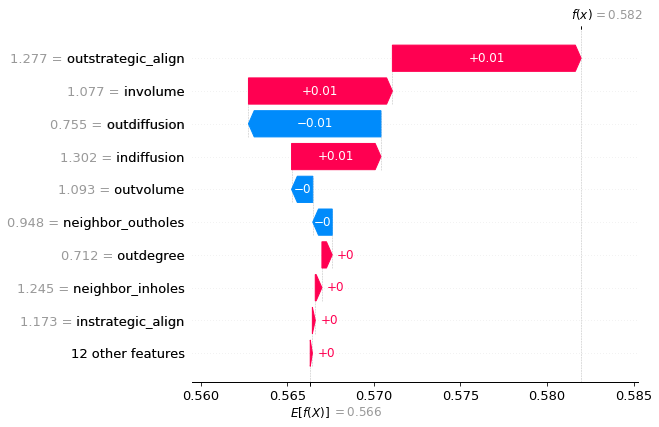

In [62]:
# Display shapley values for a given individual
sample_id=1
clone_shap_explainer.display_local_shap_values(sample_id, max_display=10)



Features'Impact on network_health output (network_health): Mean Absolute Impact


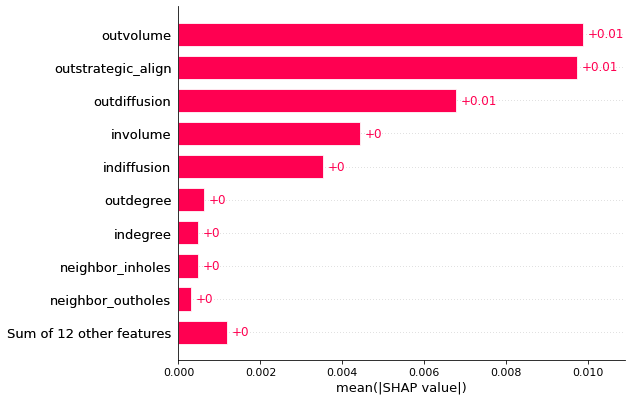

Features'Impact on network_health output (network_health): Level Impact


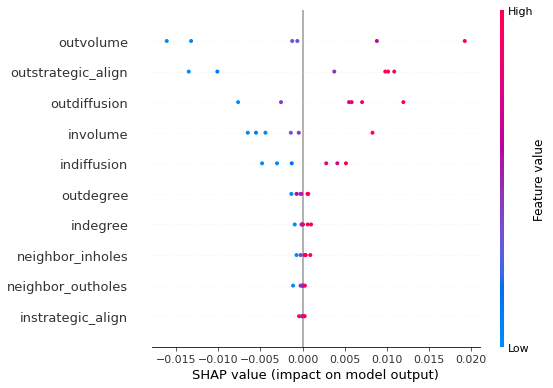

In [63]:
# Display shapley values for the group
clone_shap_explainer.display_global_shap_values(max_display=10)